In [1]:
# Core NLP & Embeddings
!pip install -q sentence-transformers
!pip install -q spacy
!pip install -q nltk
!pip install -q scikit-learn

# Data handling
!pip install -q pandas numpy scipy

# Document reading
!pip install -q python-docx
!pip install -q docx2txt
!pip install -q PyPDF2 pdfplumber

# Topic modeling / thematic analysis
!pip install -q gensim
!pip install -q bertopic

# Graph & network analysis
!pip install -q networkx

# Visualization
!pip install -q matplotlib seaborn plotly

# Dimensionality reduction & clustering
!pip install -q umap-learn hdbscan

# Utilities
!pip install -q tqdm
!pip install -q wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 99.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.0 MB/s eta 0:00:00


In [2]:
# =========================
# BASIC ENVIRONMENT SETUP
# =========================
import os
import random
import warnings
warnings.filterwarnings("ignore")

SEED = 42
random.seed(SEED)

# =========================
# NUMERIC & DATA
# =========================
import numpy as np
import pandas as pd

np.random.seed(SEED)

# =========================
# NLP & EMBEDDINGS
# =========================
import nltk
import spacy
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

nltk.download('punkt')
nlp = spacy.load("en_core_web_sm")

# =========================
# DOCUMENT READING
# =========================
import docx
import docx2txt
import pdfplumber

# =========================
# TOPIC / THEMATIC ANALYSIS
# =========================
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from bertopic import BERTopic

# =========================
# CLUSTERING & DIM REDUCTION
# =========================
from sklearn.cluster import KMeans
import umap
import hdbscan

# =========================
# GRAPH ANALYSIS
# =========================
import networkx as nx

# =========================
# VISUALIZATION
# =========================
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# =========================
# GOOGLE DRIVE MOUNT
# =========================
from google.colab import drive
drive.mount('/content/drive')

# =========================
# PATH DEFINITIONS
# =========================
# =========================
# PATH DEFINITIONS (UPDATED)
# =========================
BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/Chevaneese/"
TRANSCRIPT_PATH = os.path.join(BASE_PATH, "allepisodes.docx")

# =========================
# SENTENCE TRANSFORMER MODEL
# =========================
embedding_model = SentenceTransformer("all-mpnet-base-v2")

# =========================
# CODEBOOK (COLAB-READY)
# =========================
# =========================
# CODEBOOK (LEXICON-BASED, COLAB-READY)
# =========================

# =========================
# CODEBOOK v2.1 (COLAB-READY)
# =========================

CODEBOOK = {

    "CONSTRAINT": {

        # --- HARD / STRUCTURAL CONSTRAINTS ---
        "C1_RESOURCE_SCARCITY": [
            "limited","limitations","constraint","constraints","lack","shortage",
            "scarcity","expensive","high cost","not enough","insufficient",
            "small team","time pressure","no budget","can't afford",
            "funding gap","resource constraint"
        ],

        "C2_REGULATORY": [
            "regulation","regulatory","policy","policies","compliance",
            "permit","permits","standards","government","program",
            "initiative","guidelines","framework"
        ],

        "C3_RISK_UNCERTAINTY": [
            "risk","uncertainty","unknown","volatile","changing",
            "unpredictable","market readiness","customer readiness",
            "adoption","awareness"
        ],

        "C4_TRADE_OFF": [
            "trade-off","trade off","balance","compromise","choice",
            "prioritize","priority","decision pressure","delay",
            "postpone","wait"
        ],

        "C5_CONTEXT_MISMATCH": [
            "local context","community-specific","cultural",
            "regional","location","zoning","context","adapt","adaptation"
        ],

        # --- SOFT / HUMAN CONSTRAINTS ---
        # absence-based only (no responses here)
        "C6_CAPABILITY_CONSTRAINT": [
            "lack of skills","missing skills","skill gap","experience gap",
            "didn't know","not trained","learning curve","knowledge gap",
            "lack of expertise","lack of know-how"
        ],

        "C7_SOCIAL_RELATIONAL_CONSTRAINT": [
            "engagement challenge","low participation","lack of trust",
            "belonging issues","inclusion challenge",
            "community building difficulty",
            "diverse voices","representation gaps",
            "moderation issues","conflict",
            "safe space challenge",
            "social dynamics","relational tension"
        ],

        # --- VALUE / CHOICE-BASED CONSTRAINTS ---
        "C8_SELF_IMPOSED_CONSTRAINT": [
            "choice to limit","decided not to grow","slow growth",
            "work-life balance","wellbeing first",
            "values over scale","intentional limitation",
            "not chasing growth","purpose-driven choice",
            "deliberate simplicity"
        ]
    },

    # =========================
    # ENTREPRENEURIAL RESPONSES
    # (actions taken, not conditions)
    # =========================
    "ENTREPRENEURSHIP": {

        "E1_ADAPTIVE_SOLVING": [
            "creative solution","creativity","workaround",
            "problem solving","solved the issue",
            "adapted strategy","adjusted approach",
            "figured out a way"
        ],

        "E2_PIVOT": [
            "pivoted","changed direction","shifted strategy",
            "rethinking the model","new business model",
            "different approach"
        ],

        "E3_BRICOLAGE": [
            "used what we had","available resources",
            "bootstrapped","do more with less",
            "reused resources","repurposed assets"
        ],

        "E4_LEGITIMIZATION": [
            "convince stakeholders","build trust",
            "credibility","gain support","buy-in",
            "narrative","storytelling","justify decision"
        ],

        # decision-based values, not abstract states
        "E5_VALUE_PRIORITY": [
            "prioritized values","chose purpose over profit",
            "intentionally sacrificed growth",
            "made a values-based decision",
            "deliberate ethical choice"
        ]
    },

    # =========================
    # TRIPLE BOTTOM LINE
    # =========================
    "TBL": {

        "TBL_P_PROFIT": [
            "cost","costs","price","pricing","affordable","affordability",
            "budget","financial","cash","cash flow","revenue","profit",
            "margin","sales","market","scaling","scale","growth",
            "investment","funding","grants","rebate","incentive",
            "efficiency","efficient","operations","logistics",
            "capacity","volume","payback","return","roi","out-of-pocket"
        ],

        "TBL_S_PEOPLE": [
            "people","community","local","customers","households",
            "families","workers","employees","team","staff",
            "training","education","students","youth",
            "access","accessibility","inclusion","equity",
            "wellbeing","burnout","health","safety",
            "culture","indigenous"
        ],

        "TBL_E_PLANET": [
            "environment","environmental","sustainability","sustainable",
            "clean","clean energy","renewable","solar","diesel",
            "electric","electricity","energy","energy efficiency",
            "emissions","carbon","carbon footprint","climate",
            "waste","food waste","zero waste","recycling","recycle",
            "landfill","circular","circular economy","repair",
            "reuse","reduce","resources","water","land","soil"
        ]
    },

    # =========================
    # SUSTAINABILITY MODE
    # =========================
    "SUSTAINABILITY_MODE": {

        "S1_EXPLICIT": [
            "sustainability","sustainable",
            "environmental impact","climate change",
            "carbon reduction","green",
            "responsible business"
        ],

        "S2_IMPLICIT": [
            "efficiency","optimization","cost saving",
            "automation","technology","ai",
            "artificial intelligence",
            "machine learning","data-driven",
            "system improvement","process improvement"
        ],

        "S0_NONE": []
    }
}

print("✅ Environment ready. Libraries installed, model loaded, codebook defined.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Mounted at /content/drive


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✅ Environment ready. Libraries installed, model loaded, codebook defined.


In [239]:
# =========================
# LOAD ALLSCRIPTS.DOCX
# =========================
raw_text = docx2txt.process("/content/drive/MyDrive/Colab Notebooks/Chevaneese/allepisodes.docx")

# Normalize text
raw_text = raw_text.replace("\r", "\n")

# =========================
# EPISODE SEGMENTATION
# =========================
episodes = {}
current_episode = None
buffer = []

for line in raw_text.split("\n"):
    line = line.strip()

    if line.lower().startswith("ep") and "-" in line:
        if current_episode and buffer:
            episodes[current_episode] = "\n".join(buffer)
            buffer = []
        current_episode = line.split()[0]
    else:
        if current_episode:
            buffer.append(line)

if current_episode and buffer:
    episodes[current_episode] = "\n".join(buffer)

# =========================
# SENTENCE + SPEAKER SEGMENTATION
# =========================
rows = []

for episode_id, text in episodes.items():
    current_speaker = "UNKNOWN"

    for line in text.split("\n"):
        line = line.strip()
        if not line:
            continue

        if line.lower().startswith("speaker"):
            current_speaker = line
            continue

        doc = nlp(line)
        for sent in doc.sents:
            sentence = sent.text.strip()
            if len(sentence) > 5:
                rows.append({
                    "episode_id": episode_id,
                    "speaker": current_speaker,
                    "sentence": sentence
                })

# =========================
# CREATE DATAFRAME
# =========================
df = pd.DataFrame(rows)

print("Rows:", df.shape[0])
df.head()

Rows: 11403


,episode_id,speaker,sentence
0,ep03-pioneering-in-technology,UNKNOWN,"Fri, 05/23 12:14PM · 43mins"
1,ep03-pioneering-in-technology,UNKNOWN,Transcript
2,ep03-pioneering-in-technology,Speaker 1,so hello out there to all our listeners i am d...
3,ep03-pioneering-in-technology,Speaker 2,I am Gelareh farhadian.
4,ep03-pioneering-in-technology,Speaker 2,We are educators.


In [240]:
# =========================
# EXPORT FILES
# =========================
csv_path = os.path.join(BASE_PATH, "innovationfuel_sentences.csv")
xlsx_path = os.path.join(BASE_PATH, "innovationfuel_sentences.xlsx")

df.to_csv(csv_path, index=False)
df.to_excel(xlsx_path, index=False)

print("Saved:")
print(csv_path)
print(xlsx_path)

Saved:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/innovationfuel_sentences.csv
/content/drive/MyDrive/Colab Notebooks/Chevaneese/innovationfuel_sentences.xlsx


In [241]:
# =========================
# SENTENCE EMBEDDINGS
# =========================
sentences = df["sentence"].tolist()

sentence_embeddings = embedding_model.encode(
    sentences,
    show_progress_bar=True,
    convert_to_numpy=True
)

print("Embedding shape:", sentence_embeddings.shape)

Batches:   0%|          | 0/357 [00:00<?, ?it/s]

Embedding shape: (11403, 768)


In [242]:
# =========================
# SAVE SENTENCE EMBEDDINGS
# =========================

# create output directory if it does not exist
OUTPUT_PATH = os.path.join(BASE_PATH, "outputs")
os.makedirs(OUTPUT_PATH, exist_ok=True)

# 1. save embeddings as numpy array
embeddings_path = os.path.join(OUTPUT_PATH, "sentence_embeddings.npy")
np.save(embeddings_path, sentence_embeddings)

# 2. save sentences + embeddings index mapping
sentences_path = os.path.join(OUTPUT_PATH, "sentences.csv")
df[["sentence"]].to_csv(sentences_path, index=False)

# 3. optional: save a combined dataframe (lightweight reference)
embedding_index_df = pd.DataFrame({
    "sentence_id": range(len(sentences)),
    "sentence": sentences
})
embedding_index_path = os.path.join(OUTPUT_PATH, "embedding_index.csv")
embedding_index_df.to_csv(embedding_index_path, index=False)

print("Saved files:")
print(embeddings_path)
print(sentences_path)
print(embedding_index_path)

Saved files:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/sentence_embeddings.npy
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/sentences.csv
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/embedding_index.csv


In [245]:
# ==================================================
# CANONICAL REBUILD: DOCX → SENTENCES → EMBEDDINGS
# ==================================================

import os, re
import pandas as pd
import numpy as np
import docx2txt
import spacy

# -------------------------
# PATHS
# -------------------------
BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/Chevaneese/"
DOC_PATH = os.path.join(BASE_PATH, "allepisodes.docx")
OUTPUT_PATH = os.path.join(BASE_PATH, "outputs")
os.makedirs(OUTPUT_PATH, exist_ok=True)

# -------------------------
# LOAD NLP MODEL
# -------------------------
nlp = spacy.load("en_core_web_sm")

# -------------------------
# READ DOCX
# -------------------------
raw_text = docx2txt.process(DOC_PATH).replace("\r", "\n")

# -------------------------
# EXTRACT EPISODES (STRICT)
# -------------------------
episodes = {}
current_ep = None
buffer = []

for line in raw_text.split("\n"):
    line = line.strip()
    match = re.match(r"^(ep\d+)\b", line.lower())
    if match:
        if current_ep and buffer:
            episodes[current_ep] = "\n".join(buffer)
            buffer = []
        current_ep = match.group(1)
    else:
        if current_ep:
            buffer.append(line)

if current_ep and buffer:
    episodes[current_ep] = "\n".join(buffer)

print("Episodes found:", len(episodes))

# -------------------------
# SENTENCE SEGMENTATION
# -------------------------
rows = []

for ep_id, text in episodes.items():
    doc = nlp(text)
    for sent in doc.sents:
        s = sent.text.strip()
        if len(s) > 5:
            rows.append({
                "episode_id": ep_id,
                "sentence": s
            })

df = pd.DataFrame(rows)
print("Total sentences:", len(df))

# -------------------------
# SENTENCE EMBEDDINGS
# -------------------------
sentence_embeddings = embedding_model.encode(
    df["sentence"].tolist(),
    convert_to_numpy=True,
    show_progress_bar=True
)

# -------------------------
# SAVE OUTPUTS (REBUILD-SAFE)
# -------------------------

# 1. embeddings
np.save(
    os.path.join(OUTPUT_PATH, "sentence_embeddings.npy"),
    sentence_embeddings
)

# 2. sentences WITH episode_id
df.to_csv(
    os.path.join(OUTPUT_PATH, "sentences_with_episode.csv"),
    index=False
)

# 3. embedding index (optional but useful)
embedding_index = df.copy()
embedding_index.insert(0, "sentence_id", range(len(df)))
embedding_index.to_csv(
    os.path.join(OUTPUT_PATH, "embedding_index.csv"),
    index=False
)

print("Saved:")
print(" - sentence_embeddings.npy")
print(" - sentences_with_episode.csv")
print(" - embedding_index.csv")

Episodes found: 35
Total sentences: 11690


Batches:   0%|          | 0/366 [00:00<?, ?it/s]

Saved:
 - sentence_embeddings.npy
 - sentences_with_episode.csv
 - embedding_index.csv


In [247]:
# =========================
# RE-RUN WITH CODEBOOK v2.1 (FIXED & SAFE)
# =========================

import os
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/Chevaneese/"
OUT = os.path.join(BASE_PATH, "outputs")
os.makedirs(OUT, exist_ok=True)

# --------------------------------------------------
# 1. LOAD THE CORRECT SENTENCE FILE (WITH episode_id)
# --------------------------------------------------
df = pd.read_csv(
    os.path.join(OUT, "sentences_with_episode.csv")
)
# required columns check
assert {"episode_id", "sentence"}.issubset(df.columns)

# --------------------------------------------------
# 2. LOAD EMBEDDINGS (ROW-ALIGNED)
# --------------------------------------------------
S = np.load(os.path.join(OUT, "sentence_embeddings.npy"))
assert len(df) == S.shape[0], "Mismatch: sentences vs embeddings"

# --------------------------------------------------
# 3. FLATTEN CODEBOOK v2.1
# --------------------------------------------------
code_labels, code_texts = [], []
for fam in CODEBOOK.values():
    for code, lex in fam.items():
        if len(lex) == 0:
            continue
        code_labels.append(code)
        code_texts.append(" ".join(lex))

# --------------------------------------------------
# 4. EMBED CODEBOOK (SAME MODEL)
# --------------------------------------------------
C = embedding_model.encode(
    code_texts,
    convert_to_numpy=True,
    show_progress_bar=True
)

# --------------------------------------------------
# 5. ASSIGN CODES
# --------------------------------------------------
sim = cosine_similarity(S, C)
best_idx = sim.argmax(axis=1)

df["code"] = [code_labels[i] for i in best_idx]
df["confidence"] = sim.max(axis=1)

# --------------------------------------------------
# 6. APPLY THRESHOLD
# --------------------------------------------------
TH = 0.50
df = df[df["confidence"] >= TH].reset_index(drop=True)

# --------------------------------------------------
# 7. FLAGS
# --------------------------------------------------
df["is_constraint"] = df["code"].str.startswith("C")
df["is_tbl"] = df["code"].str.startswith("TBL")
df["has_sdg"] = df["SDG"].notna() if "SDG" in df.columns else False

# --------------------------------------------------
# 8. TABLE 3 — EPISODE-LEVEL INTENSITIES
# --------------------------------------------------
t3 = (
    df.groupby("episode_id")
      .agg(
          constraint_intensity=("is_constraint", "mean"),
          tbl_intensity=("is_tbl", "mean"),
          sdg_intensity=("has_sdg", "mean")
      )
      .reset_index()
)

t3.to_csv(os.path.join(OUT, "Table3_v2.1.csv"), index=False)

# --------------------------------------------------
# 9. TABLE 4 — OPERATIONAL STRESS QUADRANTS
# --------------------------------------------------
cx = t3["constraint_intensity"].median()
ty = t3["tbl_intensity"].median()

def quad(r):
    if r.constraint_intensity >= cx and r.tbl_intensity >= ty:
        return "High C – High TBL"
    if r.constraint_intensity >= cx and r.tbl_intensity < ty:
        return "High C – Low TBL"
    if r.constraint_intensity < cx and r.tbl_intensity >= ty:
        return "Low C – High TBL"
    return "Low C – Low TBL"

t4 = t3.copy()
t4["Quadrant"] = t4.apply(quad, axis=1)

t4.to_csv(os.path.join(OUT, "Table4_v2.1.csv"), index=False)

print("Saved:")
print(" - Table3_v2.1.csv")
print(" - Table4_v2.1.csv")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Saved:
 - Table3_v2.1.csv
 - Table4_v2.1.csv


In [253]:
# ----------------------------------
# LOAD FULL SENTENCE DATA (CANONICAL)
# ----------------------------------
df_full = pd.read_csv(
    os.path.join(OUT, "sentences_with_episode.csv")
)

print("df_full rows:", len(df_full))
print("Embeddings shape:", sentence_embeddings.shape)
assert len(df_full) == sentence_embeddings.shape[0], \
    "Mismatch: df_full and sentence_embeddings"
# -------------------------
# ASSIGN CODES (ON FULL DATA)
# -------------------------
best_code_idx = similarity_matrix.argmax(axis=1)
best_scores = similarity_matrix.max(axis=1)

df_full["code"] = [code_labels[i] for i in best_code_idx]
df_full["confidence"] = best_scores
CONFIDENCE_THRESHOLD = 0.50
df = df_full[df_full["confidence"] >= CONFIDENCE_THRESHOLD].reset_index(drop=True)

print("Sentences after threshold:", len(df))

df_full rows: 11690
Embeddings shape: (11690, 768)
Sentences after threshold: 244


In [255]:
# df_full = دیتافریم کامل با 11690 جمله
df_full = pd.read_csv(os.path.join(OUT, "sentences_with_episode.csv"))

print("df_full rows:", len(df_full))
print("embeddings rows:", sentence_embeddings.shape[0])

assert len(df_full) == sentence_embeddings.shape[0], \
    "df_full and sentence_embeddings are not aligned"

df_full rows: 11690
embeddings rows: 11690


In [256]:
# -------------------------
# ASSIGN CODES (ON FULL DATA ONLY)
# -------------------------
best_code_idx = similarity_matrix.argmax(axis=1)
best_scores = similarity_matrix.max(axis=1)

df_full["code"] = [code_labels[i] for i in best_code_idx]
df_full["confidence"] = best_scores

In [257]:
CONFIDENCE_THRESHOLD = 0.50

df = df_full[df_full["confidence"] >= CONFIDENCE_THRESHOLD].reset_index(drop=True)

print("Remaining sentences after threshold:", len(df))

Remaining sentences after threshold: 244


In [258]:
# dimension
df["dimension"] = df["code"].apply(map_dimension)

# episode × code
episode_code_table = (
    df.groupby(["episode_id", "code"])
      .size()
      .reset_index(name="count")
)

In [259]:
print(len(df_full))
print(sentence_embeddings.shape)
print(df_full.head())

11690
(11690, 768)
  episode_id                                           sentence  \
0       ep03  Fri, 05/23 12:14PM · 43mins\n\nTranscript\n\nS...   
1       ep03                                  We are educators.   
2       ep03                Speaker 1\n\nAnd entrepreneurs too!   
3       ep03  Speaker 2\n\nand the host of this podcast Inno...   
4       ep03  At University of Canada West, we believe that ...   

                              code  confidence  
0                     TBL_S_PEOPLE    0.317011  
1                     TBL_S_PEOPLE    0.346323  
2                     TBL_S_PEOPLE    0.345509  
3  C7_SOCIAL_RELATIONAL_CONSTRAINT    0.239203  
4                     TBL_S_PEOPLE    0.438541  


In [260]:
df_full["confidence"].describe()

,confidence
count,11690.000000
mean,0.269010
std,0.109119
min,-0.027478
25%,0.183478
50%,0.261886
75%,0.346417
max,0.702967


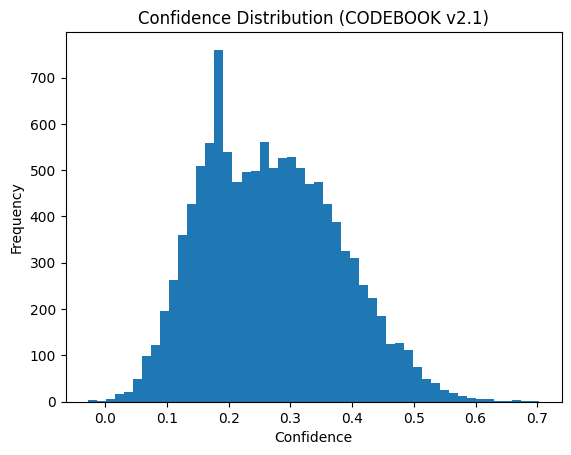

In [261]:
import matplotlib.pyplot as plt

plt.hist(df_full["confidence"], bins=50)
plt.xlabel("Confidence")
plt.ylabel("Frequency")
plt.title("Confidence Distribution (CODEBOOK v2.1)")
plt.show()

In [262]:
# =========================
# SAVE CONFIDENCE DISTRIBUTION FIGURE (CODEBOOK v2.1)
# =========================

import os
import matplotlib.pyplot as plt

# مسیر خروجی
OUTPUT_PATH = os.path.join(BASE_PATH, "outputs")
os.makedirs(OUTPUT_PATH, exist_ok=True)

# رسم نمودار
plt.figure(figsize=(8, 6))
plt.hist(df_full["confidence"], bins=50)
plt.xlabel("Confidence")
plt.ylabel("Frequency")
plt.title("Confidence Distribution (CODEBOOK v2.1)")
plt.tight_layout()

# ذخیره فایل
fig_path = os.path.join(
    OUTPUT_PATH,
    "Figure_Confidence_Distribution_CODEBOOK_v2_1.png"
)
plt.savefig(fig_path, dpi=300)
plt.close()

print("Figure saved at:")
print(fig_path)

Figure saved at:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/Figure_Confidence_Distribution_CODEBOOK_v2_1.png


In [264]:
# ==================================================
# FLATTEN CODEBOOK → EMBEDDINGS → ASSIGN CODES (SAFE)
# ==================================================

import os
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# --------------------------------------------------
# ASSUMPTIONS (MUST BE TRUE)
# - df_full exists and has: episode_id, sentence
# - sentence_embeddings exists and row-aligned with df_full
# - embedding_model is already loaded
# --------------------------------------------------

assert {"episode_id", "sentence"}.issubset(df_full.columns), \
    "df_full must contain episode_id and sentence"

assert len(df_full) == sentence_embeddings.shape[0], \
    "df_full and sentence_embeddings are not aligned"

# --------------------------------------------------
# 1. FLATTEN CODEBOOK (LEXICON → STRING)
# --------------------------------------------------
code_labels = []
code_texts = []

for section, codes in CODEBOOK.items():
    for code, lexicon in codes.items():
        if not lexicon:
            continue
        code_labels.append(code)
        code_texts.append(" ".join(lexicon))

print("Number of codes:", len(code_labels))

# --------------------------------------------------
# 2. EMBED CODEBOOK
# --------------------------------------------------
code_embeddings = embedding_model.encode(
    code_texts,
    convert_to_numpy=True,
    show_progress_bar=True
)

print("Code embedding shape:", code_embeddings.shape)

# --------------------------------------------------
# 3. COSINE SIMILARITY (FULL DATA ONLY)
# --------------------------------------------------
similarity_matrix = cosine_similarity(
    sentence_embeddings,
    code_embeddings
)

print("Similarity matrix shape:", similarity_matrix.shape)

# --------------------------------------------------
# 4. ASSIGN BEST CODE PER SENTENCE (ON df_full)
# --------------------------------------------------
best_code_idx = similarity_matrix.argmax(axis=1)
best_scores = similarity_matrix.max(axis=1)

df_full = df_full.copy()
df_full["code"] = [code_labels[i] for i in best_code_idx]
df_full["confidence"] = best_scores

# --------------------------------------------------
# 5. CONFIDENCE THRESHOLD (RECALIBRATED)
# --------------------------------------------------
CONFIDENCE_THRESHOLD = 0.30   # recommended for CODEBOOK v2.1

df = df_full[df_full["confidence"] >= CONFIDENCE_THRESHOLD].reset_index(drop=True)

print("Sentences retained after threshold:", len(df))
print("Episodes retained:", df["episode_id"].nunique())

# --------------------------------------------------
# 6. MAP CODE → DIMENSION
# --------------------------------------------------
def map_dimension(code):
    if code.startswith("C"):
        return "Constraint"
    elif code.startswith("E"):
        return "Entrepreneurship"
    elif code.startswith("TBL"):
        return "TBL"
    elif code.startswith("S"):
        return "Sustainability_Mode"
    else:
        return "Other"

df["dimension"] = df["code"].apply(map_dimension)

# --------------------------------------------------
# 7. EPISODE × CODE COUNTS
# --------------------------------------------------
episode_code_table = (
    df.groupby(["episode_id", "code"])
      .size()
      .reset_index(name="count")
)

# --------------------------------------------------
# 8. SDG METADATA (EPISODE-LEVEL)
# --------------------------------------------------
sdg_map = {
    "ep03": "SDG11",
    "ep04": "SDG12",
    "ep24": "SDG12",
    "ep26": "SDG7,SDG13",
    "ep31": "SDG7,SDG9",
    "ep40": "SDG7,SDG9",
    "ep43": "SDG11",
    "ep49": "SDG2,SDG12,SDG15,SDG17",
    "ep53": "SDG7,SDG9",
    "ep57": "SDG4,SDG9",
    "ep59": "SDG12",
    "ep61": "SDG7,SDG9",
    "ep63": "SDG6,SDG7,SDG13",
    "ep67": "SDG15",
    "ep72": "SDG12,SDG13",
    "ep74": "SDG9,SDG12",
    "ep76": "SDG7,SDG12",
    "ep79": "SDG12",
    "ep82": "SDG17",
    "ep85": "SDG17",
    "ep86": "SDG3",
    "ep89": "SDG11",
    "ep90": "SDG12",
    "ep91": "SDG11",
    "ep92": "SDG11,SDG16",
    "ep98": "SDG12",
    "ep99": "SDG3,SDG15",
    "ep100": "SDG7,SDG13",
    "ep103": "SDG12",
    "ep106": "SDG7,SDG9,SDG12,SDG13,SDG17",
    "ep107": "SDG12",
    "ep108": "SDG7,SDG9,SDG13",
    "ep109": "SDG7,SDG9",
    "ep111": "SDG2,SDG12,SDG13,SDG17",
    "ep112": "SDG9,SDG12,SDG13",
    "ep113": "SDG4,SDG9,SDG17"
}

df["SDG"] = df["episode_id"].map(sdg_map)

# --------------------------------------------------
# DONE
# --------------------------------------------------
print("Pipeline completed successfully.")
df.head()

Number of codes: 18


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Code embedding shape: (18, 768)
Similarity matrix shape: (11690, 18)
Sentences retained after threshold: 4483
Episodes retained: 35
Pipeline completed successfully.


,episode_id,sentence,code,confidence,dimension,SDG
0,ep03,"Fri, 05/23 12:14PM · 43mins\n\nTranscript\n\nS...",TBL_S_PEOPLE,0.317011,TBL,SDG11
1,ep03,We are educators.,TBL_S_PEOPLE,0.346323,TBL,SDG11
2,ep03,Speaker 1\n\nAnd entrepreneurs too!,TBL_S_PEOPLE,0.345509,TBL,SDG11
3,ep03,"At University of Canada West, we believe that ...",TBL_S_PEOPLE,0.438541,TBL,SDG11
4,ep03,Speaker 1\n\nWe arm them with the tools and br...,C7_SOCIAL_RELATIONAL_CONSTRAINT,0.435566,Constraint,SDG11


In [265]:
# =========================
# SAVE CODED SENTENCES (v2.1)
# =========================

import os

OUTPUT_PATH = os.path.join(BASE_PATH, "outputs")
os.makedirs(OUTPUT_PATH, exist_ok=True)

save_path = os.path.join(
    OUTPUT_PATH, "coded_sentences_CODEBOOK_v2_1.csv"
)

# فرض: df همین الان شامل ستون‌های زیر است:
# episode_id, sentence, code, confidence, dimension, SDG
required_cols = {"episode_id", "sentence", "code", "confidence", "dimension", "SDG"}
missing = required_cols - set(df.columns)
assert not missing, f"Missing columns: {missing}"

df.to_csv(save_path, index=False)

print("Saved coded sentences to:")
print(save_path)
print("Rows saved:", len(df))

Saved coded sentences to:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/coded_sentences_CODEBOOK_v2_1.csv
Rows saved: 4483


In [267]:
print("DF shape after threshold:", df.shape)
print("Unique episode_ids:", df["episode_id"].unique()[:10])
print("Missing SDG rows:", df["SDG"].isna().sum())

DF shape after threshold: (4483, 6)
Unique episode_ids: ['ep03' 'ep04' 'ep100' 'ep103' 'ep106' 'ep107' 'ep108' 'ep109' 'ep111'
 'ep112']
Missing SDG rows: 0


In [268]:
# =========================
# NORMALIZE EPISODE ID
# =========================
df["episode_id_raw"] = df["episode_id"]

df["episode_id"] = df["episode_id"].str.extract(r"(ep\d+)")

print("Unique normalized episode_ids:", df["episode_id"].unique())

Unique normalized episode_ids: ['ep03' 'ep04' 'ep100' 'ep103' 'ep106' 'ep107' 'ep108' 'ep109' 'ep111'
 'ep112' 'ep113' 'ep26' 'ep31' 'ep40' 'ep43' 'ep49' 'ep53' 'ep57' 'ep59'
 'ep61' 'ep63' 'ep67' 'ep72' 'ep74' 'ep76' 'ep79' 'ep82' 'ep85' 'ep86'
 'ep89' 'ep90' 'ep91' 'ep92' 'ep98' 'ep99']


In [269]:
# =========================
# MAP SDGs AFTER NORMALIZATION
# =========================
df["SDG"] = df["episode_id"].map(sdg_map)

print("Missing SDG rows after fix:", df["SDG"].isna().sum())

Missing SDG rows after fix: 0


In [270]:
# =========================
# BUILD SDG × CODE MATRIX
# =========================

# explode SDGs (one row per SDG per sentence)
sdg_exploded = (
    df
    .dropna(subset=["SDG"])
    .assign(SDG=df["SDG"].str.split(","))
    .explode("SDG")
)

# create SDG × CODE count matrix
sdg_code_matrix = pd.crosstab(
    sdg_exploded["SDG"],
    sdg_exploded["code"]
)

print("SDG × Code matrix shape:", sdg_code_matrix.shape)


# =========================
# NORMALIZE SDG × CODE MATRIX (ROW-WISE %)
# =========================

sdg_code_percent = (
    sdg_code_matrix
    .div(sdg_code_matrix.sum(axis=1), axis=0)
    * 100
)

sdg_code_percent = sdg_code_percent.round(2)

sdg_code_percent

SDG × Code matrix shape: (12, 18)


code,C1_RESOURCE_SCARCITY,C2_REGULATORY,C3_RISK_UNCERTAINTY,C4_TRADE_OFF,C5_CONTEXT_MISMATCH,C6_CAPABILITY_CONSTRAINT,C7_SOCIAL_RELATIONAL_CONSTRAINT,C8_SELF_IMPOSED_CONSTRAINT,E1_ADAPTIVE_SOLVING,E2_PIVOT,E3_BRICOLAGE,E4_LEGITIMIZATION,E5_VALUE_PRIORITY,S1_EXPLICIT,S2_IMPLICIT,TBL_E_PLANET,TBL_P_PROFIT,TBL_S_PEOPLE
SDG,,,,,,,,,,,,,,,,,,
SDG11,8.65,2.45,4.73,1.63,2.61,2.94,8.32,7.01,2.77,9.30,2.94,12.23,1.63,1.63,0.65,1.79,10.44,18.27
SDG12,7.00,3.29,4.75,1.52,0.49,3.41,5.30,4.69,2.98,11.14,3.71,17.60,2.01,9.81,2.98,3.96,7.43,7.92
SDG13,7.26,4.06,2.89,0.70,0.55,2.34,3.36,5.15,2.58,11.09,3.83,18.81,1.48,12.26,3.83,5.23,7.81,6.79
SDG15,12.88,3.99,0.00,0.00,0.31,4.29,9.20,4.60,4.91,7.98,3.37,15.34,0.31,3.37,0.61,2.15,6.44,20.25
SDG16,8.62,0.86,2.59,0.00,2.59,2.59,14.66,10.34,2.59,6.03,0.86,5.17,0.00,3.45,0.00,0.86,10.34,28.45
SDG17,6.73,3.04,2.88,0.56,0.32,8.09,5.61,8.65,2.16,6.65,2.64,14.10,4.17,10.34,2.96,2.88,6.49,11.70
SDG2,12.89,11.11,1.33,0.00,0.89,0.89,5.33,2.22,2.22,4.89,6.22,17.78,0.89,6.67,1.78,3.56,8.00,13.33
SDG3,15.15,5.45,1.21,3.03,0.00,4.85,4.24,4.24,9.09,13.94,1.21,17.58,6.06,1.82,1.82,0.00,7.27,3.03
SDG4,2.83,1.42,2.83,0.28,0.28,21.81,4.53,14.45,2.83,6.23,0.57,11.05,8.22,3.40,2.83,0.00,3.40,13.03


In [271]:
# =========================
# SAVE SDG × CODE MATRICES
# =========================

OUTPUT_PATH = os.path.join(BASE_PATH, "outputs")
os.makedirs(OUTPUT_PATH, exist_ok=True)

# 1. save raw count matrix
sdg_code_matrix_path = os.path.join(OUTPUT_PATH, "sdg_code_matrix_counts.csv")
sdg_code_matrix.to_csv(sdg_code_matrix_path)

# 2. save normalized percentage matrix
sdg_code_percent_path = os.path.join(OUTPUT_PATH, "sdg_code_matrix_percent.csv")
sdg_code_percent.to_csv(sdg_code_percent_path)

print("Saved files:")
print(sdg_code_matrix_path)
print(sdg_code_percent_path)

Saved files:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/sdg_code_matrix_counts.csv
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/sdg_code_matrix_percent.csv


SDG × Code matrix shape: (12, 18)


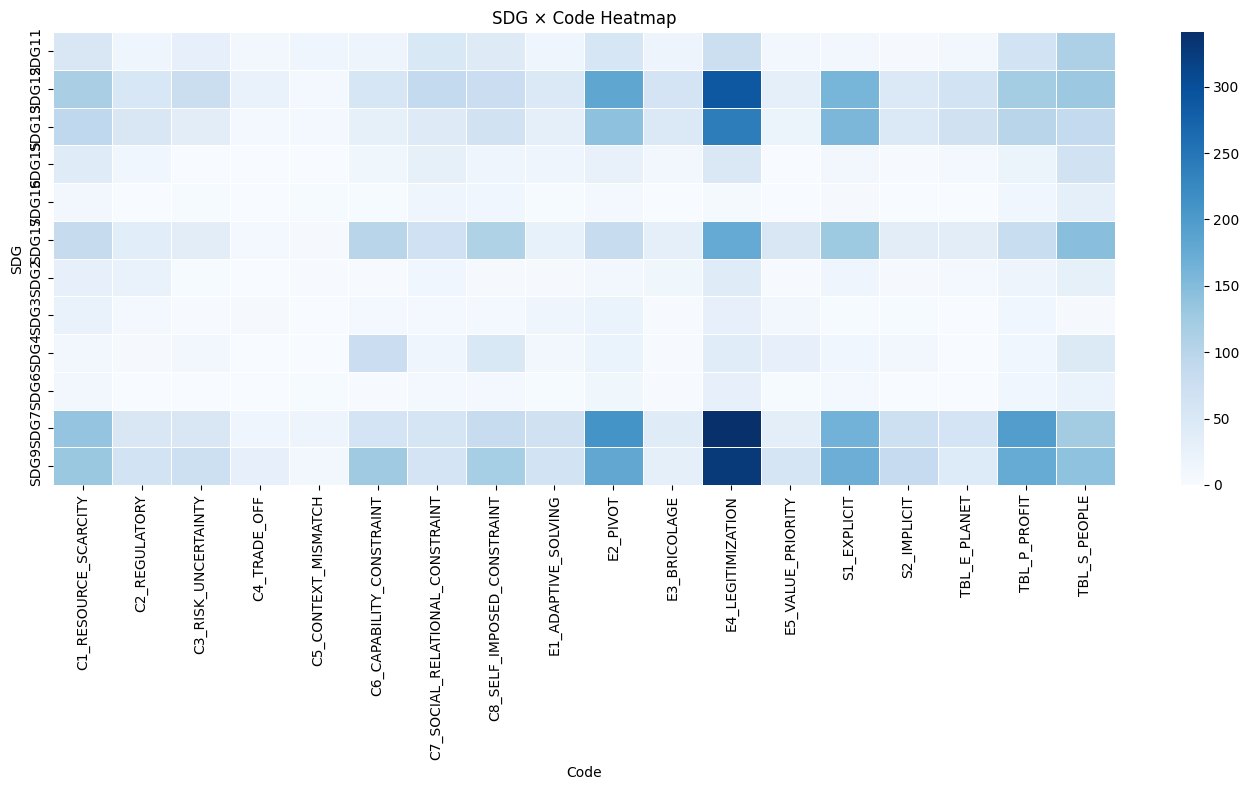

In [272]:
# =========================
# EXPLODE SDGs (SAFE)
# =========================
df_sdg = df.dropna(subset=["SDG", "code"]).copy()

df_sdg["SDG"] = df_sdg["SDG"].astype(str).str.split(",")
df_sdg = df_sdg.explode("SDG")

# پاک‌سازی فاصله‌ها
df_sdg["SDG"] = df_sdg["SDG"].str.strip()

# =========================
# SDG × CODE TABLE (SAFE)
# =========================
sdg_code_matrix = (
    df_sdg
    .groupby(["SDG", "code"])
    .size()
    .unstack(fill_value=0)
)

print("SDG × Code matrix shape:", sdg_code_matrix.shape)

# =========================
# HEATMAP (GUARDED)
# =========================
if sdg_code_matrix.size > 0:
    plt.figure(figsize=(14, 8))
    sns.heatmap(
        sdg_code_matrix,
        cmap="Blues",
        linewidths=0.5
    )
    plt.title("SDG × Code Heatmap")
    plt.xlabel("Code")
    plt.ylabel("SDG")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Heatmap not generated: SDG × code matrix is empty.")


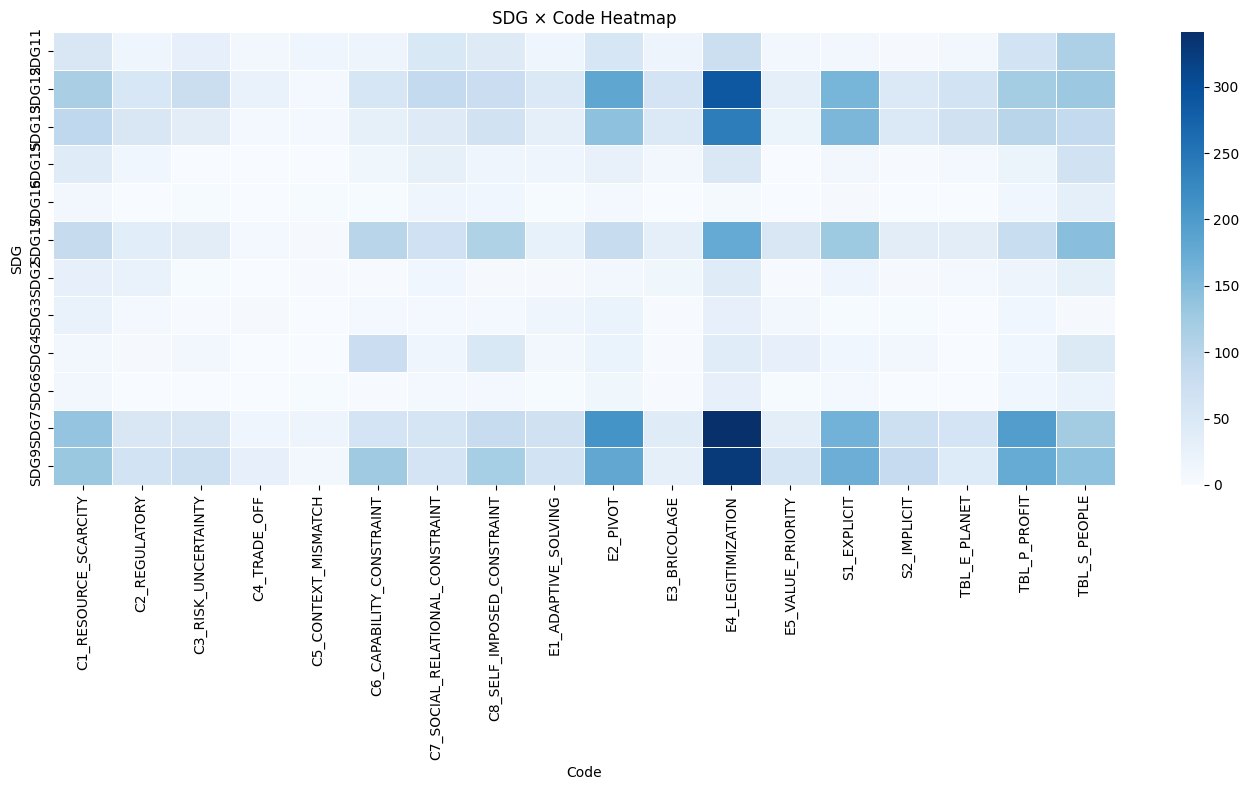

Heatmap saved to:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/sdg_code_heatmap.png


In [273]:
# =========================
# SAVE + SHOW SDG × CODE HEATMAP
# =========================

OUTPUT_PATH = os.path.join(BASE_PATH, "outputs")
os.makedirs(OUTPUT_PATH, exist_ok=True)

heatmap_path = os.path.join(OUTPUT_PATH, "sdg_code_heatmap.png")

if sdg_code_matrix.size > 0:
    plt.figure(figsize=(14, 8))
    ax = sns.heatmap(
        sdg_code_matrix,
        cmap="Blues",
        linewidths=0.5
    )
    ax.set_title("SDG × Code Heatmap")
    ax.set_xlabel("Code")
    ax.set_ylabel("SDG")
    plt.tight_layout()

    # save figure
    plt.savefig(heatmap_path, dpi=300, bbox_inches="tight")

    # show figure
    plt.show()

    print("Heatmap saved to:")
    print(heatmap_path)
else:
    print("⚠️ Heatmap not generated: SDG × code matrix is empty.")

In [274]:
# =========================
# PREPARE CONSTRAINT & TBL FLAGS
# =========================
df_quad = df.copy()

df_quad["is_constraint"] = df_quad["code"].str.startswith("C")
df_quad["is_tbl"] = df_quad["code"].str.startswith("TBL")

# =========================
# AGGREGATE AT EPISODE LEVEL
# =========================
episode_quad = (
    df_quad
    .groupby("episode_id")
    .agg(
        constraint_count=("is_constraint", "sum"),
        tbl_count=("is_tbl", "sum"),
        total_sentences=("sentence", "count")
    )
    .reset_index()
)

# Normalize by episode length
episode_quad["constraint_intensity"] = (
    episode_quad["constraint_count"] / episode_quad["total_sentences"]
)

episode_quad["tbl_intensity"] = (
    episode_quad["tbl_count"] / episode_quad["total_sentences"]
)

episode_quad

,episode_id,constraint_count,tbl_count,total_sentences,constraint_intensity,tbl_intensity
0,ep03,79,51,202,0.391089,0.252475
1,ep04,17,32,97,0.175258,0.329897
2,ep100,24,19,90,0.266667,0.211111
3,ep103,36,27,108,0.333333,0.250000
4,ep106,133,72,451,0.294900,0.159645
5,ep107,18,4,48,0.375000,0.083333
6,ep108,23,20,135,0.170370,0.148148
7,ep109,36,38,146,0.246575,0.260274
8,ep111,42,14,102,0.411765,0.137255
9,ep112,24,23,92,0.260870,0.250000


In [275]:
# =========================
# SAVE EPISODE-LEVEL CONSTRAINT & TBL TABLE
# =========================

OUTPUT_PATH = os.path.join(BASE_PATH, "outputs")
os.makedirs(OUTPUT_PATH, exist_ok=True)

episode_quad_path = os.path.join(
    OUTPUT_PATH,
    "episode_constraint_tbl_intensity.csv"
)

episode_quad.to_csv(episode_quad_path, index=False)

print("Episode-level table saved to:")
print(episode_quad_path)

Episode-level table saved to:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/episode_constraint_tbl_intensity.csv


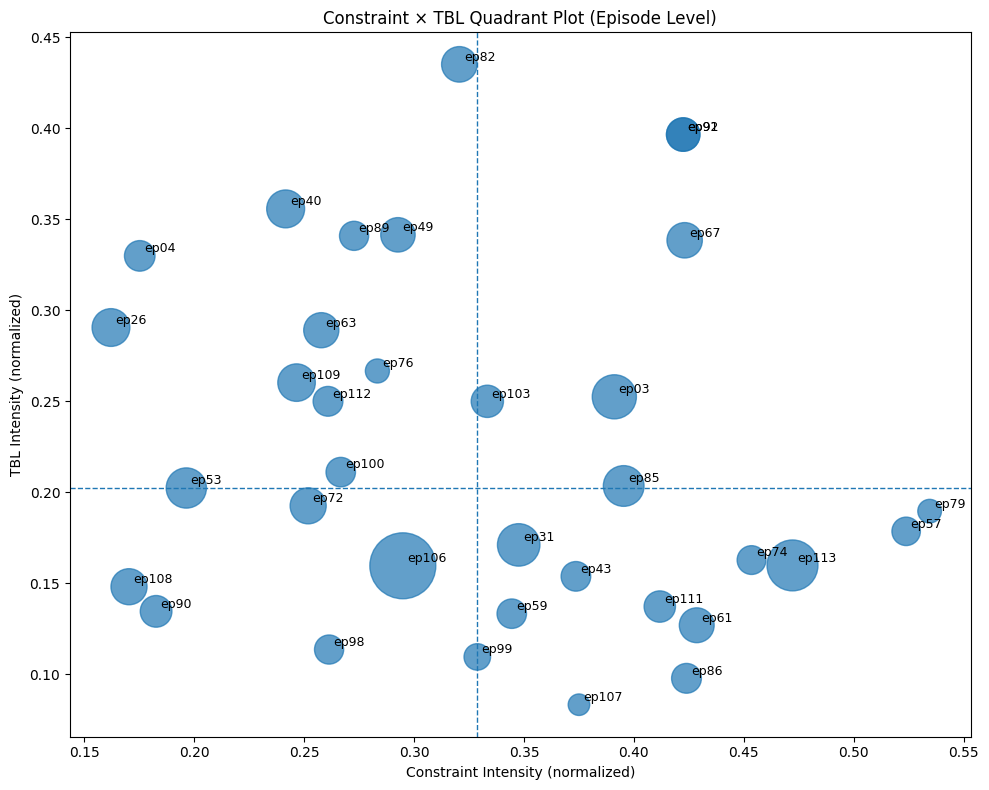

In [276]:
# =========================
# QUADRANT SCATTER PLOT
# =========================
plt.figure(figsize=(10, 8))

plt.scatter(
    episode_quad["constraint_intensity"],
    episode_quad["tbl_intensity"],
    s=episode_quad["total_sentences"] * 5,
    alpha=0.7
)

# Median lines (quadrants)
x_med = episode_quad["constraint_intensity"].median()
y_med = episode_quad["tbl_intensity"].median()

plt.axvline(x_med, linestyle="--", linewidth=1)
plt.axhline(y_med, linestyle="--", linewidth=1)

# Labels
for _, row in episode_quad.iterrows():
    plt.text(
        row["constraint_intensity"] + 0.002,
        row["tbl_intensity"] + 0.002,
        row["episode_id"],
        fontsize=9
    )

plt.xlabel("Constraint Intensity (normalized)")
plt.ylabel("TBL Intensity (normalized)")
plt.title("Constraint × TBL Quadrant Plot (Episode Level)")

plt.tight_layout()
plt.show()

In [277]:
# =========================
# SAVE EPISODE-LEVEL QUADRANT TABLE
# =========================
quad_table_path = os.path.join(BASE_PATH, "episode_constraint_tbl_quadrant.csv")
episode_quad.to_csv(quad_table_path, index=False)

print("Saved quadrant table:")
print(quad_table_path)

Saved quadrant table:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/episode_constraint_tbl_quadrant.csv


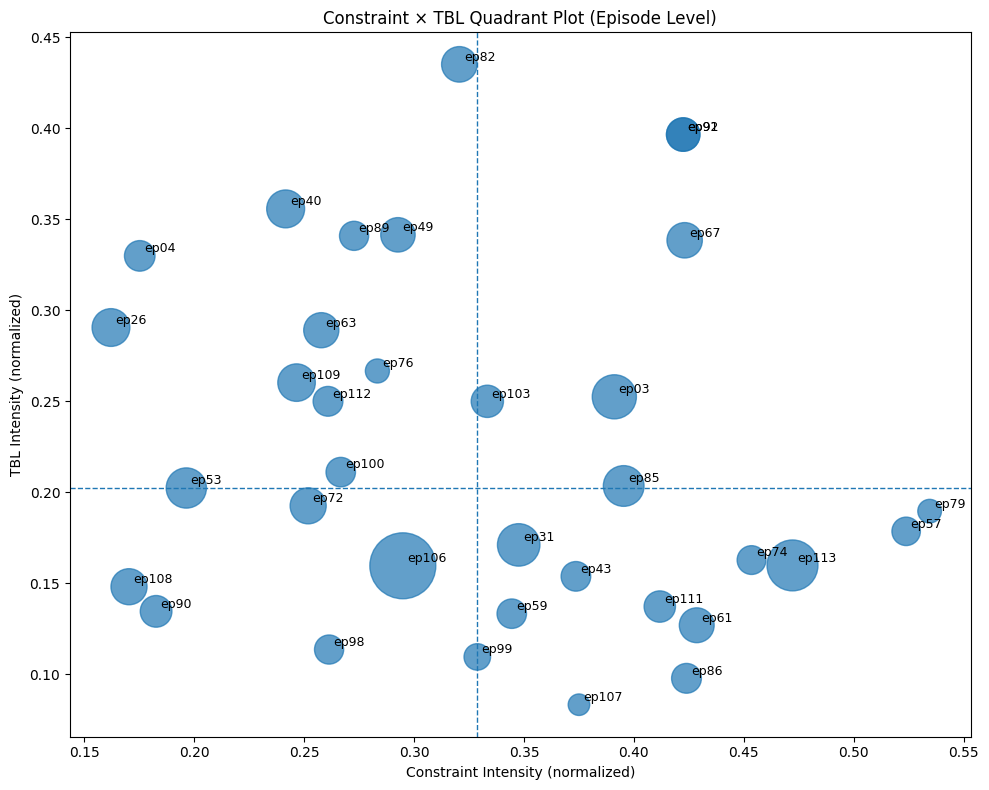

Saved figure:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/constraint_tbl_quadrant_plot.png


In [278]:
# =========================
# SAVE QUADRANT FIGURE
# =========================
fig_path = os.path.join(BASE_PATH, "constraint_tbl_quadrant_plot.png")

plt.figure(figsize=(10, 8))
plt.scatter(
    episode_quad["constraint_intensity"],
    episode_quad["tbl_intensity"],
    s=episode_quad["total_sentences"] * 5,
    alpha=0.7
)

x_med = episode_quad["constraint_intensity"].median()
y_med = episode_quad["tbl_intensity"].median()

plt.axvline(x_med, linestyle="--", linewidth=1)
plt.axhline(y_med, linestyle="--", linewidth=1)

for _, row in episode_quad.iterrows():
    plt.text(
        row["constraint_intensity"] + 0.002,
        row["tbl_intensity"] + 0.002,
        row["episode_id"],
        fontsize=9
    )

plt.xlabel("Constraint Intensity (normalized)")
plt.ylabel("TBL Intensity (normalized)")
plt.title("Constraint × TBL Quadrant Plot (Episode Level)")
plt.tight_layout()
plt.savefig(fig_path, dpi=300, bbox_inches="tight")
plt.show()

print("Saved figure:")
print(fig_path)

In [279]:
# =========================
# PREPARE DATA FOR CLUSTERING
# =========================
X = episode_quad[["constraint_intensity", "tbl_intensity"]].values

# =========================
# RUN HDBSCAN
# =========================
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=3,
    min_samples=2,
    metric="euclidean"
)

episode_quad["cluster"] = clusterer.fit_predict(X)

episode_quad

,episode_id,constraint_count,tbl_count,total_sentences,constraint_intensity,tbl_intensity,cluster
0,ep03,79,51,202,0.391089,0.252475,1
1,ep04,17,32,97,0.175258,0.329897,1
2,ep100,24,19,90,0.266667,0.211111,1
3,ep103,36,27,108,0.333333,0.250000,1
4,ep106,133,72,451,0.294900,0.159645,1
5,ep107,18,4,48,0.375000,0.083333,1
6,ep108,23,20,135,0.170370,0.148148,1
7,ep109,36,38,146,0.246575,0.260274,1
8,ep111,42,14,102,0.411765,0.137255,1
9,ep112,24,23,92,0.260870,0.250000,1


In [280]:
# =========================
# SAVE EPISODE-LEVEL CLUSTERING RESULTS
# =========================

OUTPUT_PATH = os.path.join(BASE_PATH, "outputs")
os.makedirs(OUTPUT_PATH, exist_ok=True)

cluster_table_path = os.path.join(
    OUTPUT_PATH,
    "episode_constraint_tbl_clusters.csv"
)

episode_quad.to_csv(cluster_table_path, index=False)

print("Clustering table saved to:")
print(cluster_table_path)

Clustering table saved to:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/episode_constraint_tbl_clusters.csv


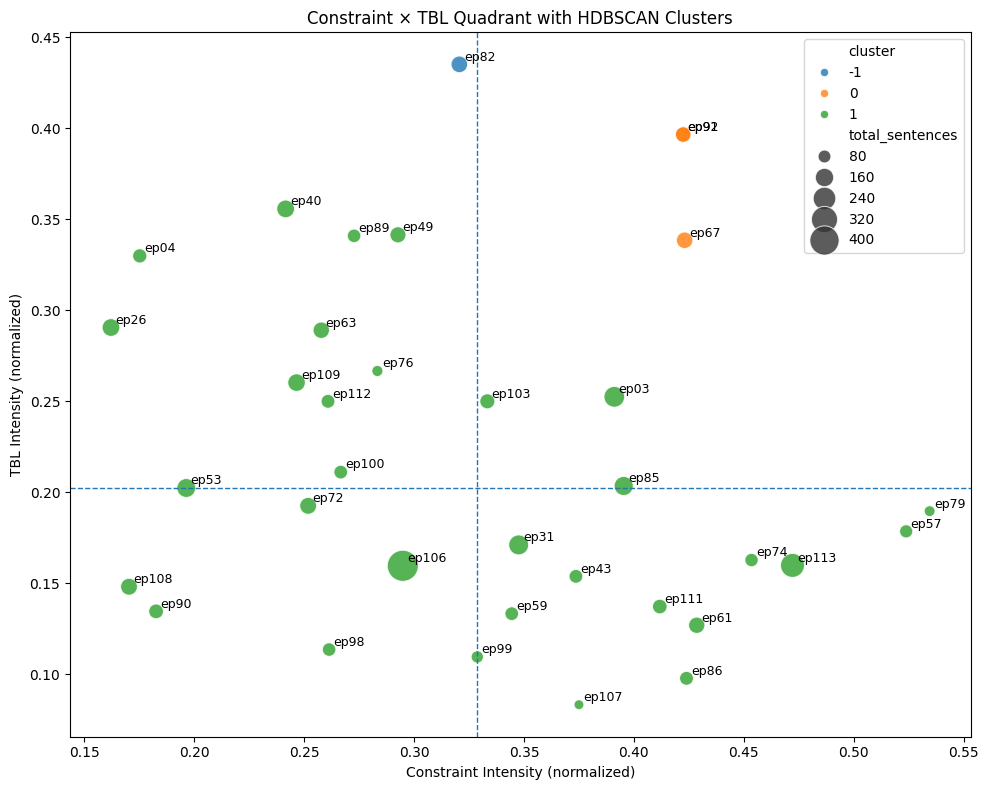

In [281]:
# =========================
# PLOT CLUSTERS ON QUADRANT
# =========================
plt.figure(figsize=(10, 8))

sns.scatterplot(
    data=episode_quad,
    x="constraint_intensity",
    y="tbl_intensity",
    hue="cluster",
    size="total_sentences",
    palette="tab10",
    sizes=(50, 500),
    alpha=0.8
)

# Quadrant lines
plt.axvline(episode_quad["constraint_intensity"].median(), linestyle="--", linewidth=1)
plt.axhline(episode_quad["tbl_intensity"].median(), linestyle="--", linewidth=1)

# Labels
for _, row in episode_quad.iterrows():
    plt.text(
        row["constraint_intensity"] + 0.002,
        row["tbl_intensity"] + 0.002,
        row["episode_id"],
        fontsize=9
    )

plt.xlabel("Constraint Intensity (normalized)")
plt.ylabel("TBL Intensity (normalized)")
plt.title("Constraint × TBL Quadrant with HDBSCAN Clusters")

plt.tight_layout()
plt.show()

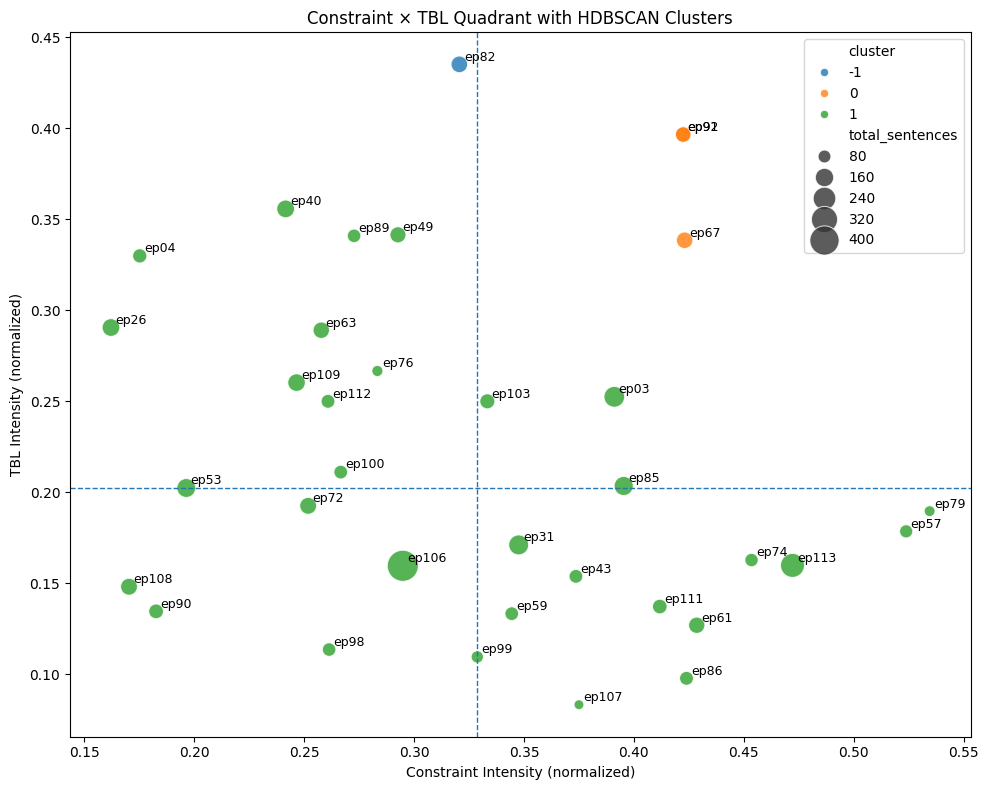

Clustered quadrant plot saved to:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/constraint_tbl_quadrant_hdbscan.png


In [282]:
# =========================
# SAVE + SHOW CLUSTERED QUADRANT PLOT
# =========================

OUTPUT_PATH = os.path.join(BASE_PATH, "outputs")
os.makedirs(OUTPUT_PATH, exist_ok=True)

cluster_plot_path = os.path.join(
    OUTPUT_PATH,
    "constraint_tbl_quadrant_hdbscan.png"
)

plt.figure(figsize=(10, 8))

sns.scatterplot(
    data=episode_quad,
    x="constraint_intensity",
    y="tbl_intensity",
    hue="cluster",
    size="total_sentences",
    palette="tab10",
    sizes=(50, 500),
    alpha=0.8
)

# Quadrant lines
plt.axvline(
    episode_quad["constraint_intensity"].median(),
    linestyle="--",
    linewidth=1
)
plt.axhline(
    episode_quad["tbl_intensity"].median(),
    linestyle="--",
    linewidth=1
)

# Labels
for _, row in episode_quad.iterrows():
    plt.text(
        row["constraint_intensity"] + 0.002,
        row["tbl_intensity"] + 0.002,
        row["episode_id"],
        fontsize=9
    )

plt.xlabel("Constraint Intensity (normalized)")
plt.ylabel("TBL Intensity (normalized)")
plt.title("Constraint × TBL Quadrant with HDBSCAN Clusters")

plt.tight_layout()

# Save figure
plt.savefig(cluster_plot_path, dpi=300, bbox_inches="tight")

# Show figure
plt.show()

print("Clustered quadrant plot saved to:")
print(cluster_plot_path)

In [283]:
# =========================
# SAVE CLUSTER TABLE
# =========================
cluster_path = os.path.join(OUTPUT_PATH, "episode_hdbscan_clusters.csv")
episode_quad.to_csv(cluster_path, index=False)

print("Saved HDBSCAN cluster table:")
print(cluster_path)

Saved HDBSCAN cluster table:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/episode_hdbscan_clusters.csv


In [284]:
# =========================
# PREPARE CLUSTER × SDG DATA
# =========================
df_cluster_sdg = df.merge(
    episode_quad[["episode_id", "cluster"]],
    on="episode_id",
    how="left"
)

df_cluster_sdg = df_cluster_sdg.dropna(subset=["SDG", "cluster"])
df_cluster_sdg["SDG"] = df_cluster_sdg["SDG"].str.split(",")
df_cluster_sdg = df_cluster_sdg.explode("SDG")
df_cluster_sdg["SDG"] = df_cluster_sdg["SDG"].str.strip()

# =========================
# CLUSTER × SDG TABLE
# =========================
cluster_sdg_table = (
    df_cluster_sdg
    .groupby(["cluster", "SDG"])
    .size()
    .unstack(fill_value=0)
)

cluster_sdg_table

SDG,SDG11,SDG12,SDG13,SDG15,SDG16,SDG17,SDG2,SDG3,SDG4,SDG6,SDG7,SDG9
cluster,,,,,,,,,,,,
-1,0,0,0,0,0,131,0,0,0,0,0,0
0,232,0,0,130,116,0,0,0,0,0,0,0
1,381,1642,1281,196,0,1117,225,165,353,128,1788,1893


In [285]:
cluster_sdg_path = os.path.join(OUTPUT_PATH, "cluster_sdg_table.csv")
cluster_sdg_table.to_csv(cluster_sdg_path)
print(cluster_sdg_path)

/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/cluster_sdg_table.csv


In [286]:
# =========================
# DERIVE SUSTAINABILITY MODE FROM CODE
# =========================
df["sustainability_mode"] = "NONE"

df.loc[df["code"].str.startswith("S1"), "sustainability_mode"] = "EXPLICIT"
df.loc[df["code"].str.startswith("S2"), "sustainability_mode"] = "IMPLICIT"

In [287]:
df_cluster_sdg = df.merge(
    episode_quad[["episode_id", "cluster"]],
    on="episode_id",
    how="left"
)

df_cluster_sdg = df_cluster_sdg.dropna(subset=["SDG", "cluster"])
df_cluster_sdg["SDG"] = df_cluster_sdg["SDG"].str.split(",")
df_cluster_sdg = df_cluster_sdg.explode("SDG")
df_cluster_sdg["SDG"] = df_cluster_sdg["SDG"].str.strip()

In [288]:
# =========================
# CLUSTER × SUSTAINABILITY MODE
# =========================
cluster_sustain_table = (
    df_cluster_sdg
    .groupby(["cluster", "sustainability_mode"])
    .size()
    .unstack(fill_value=0)
)

cluster_sustain_table

sustainability_mode,EXPLICIT,IMPLICIT,NONE
cluster,,,
-1,2,0,129
0,14,0,464
1,828,317,8024


In [289]:
cluster_sustain_path = os.path.join(OUTPUT_PATH, "cluster_sustainability_mode.csv")
cluster_sustain_table.to_csv(cluster_sustain_path)
print(cluster_sustain_path)

/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/cluster_sustainability_mode.csv


In [290]:
# =========================
# ROBUSTNESS CHECK
# =========================
robustness_results = []

for mcs in [2, 3, 4]:
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=mcs,
        min_samples=2,
        metric="euclidean"
    )

    labels = clusterer.fit_predict(
        episode_quad[["constraint_intensity", "tbl_intensity"]].values
    )

    temp = episode_quad.copy()
    temp["cluster"] = labels
    temp["min_cluster_size"] = mcs

    robustness_results.append(temp)

robust_df = pd.concat(robustness_results, ignore_index=True)
robust_df

,episode_id,constraint_count,tbl_count,total_sentences,constraint_intensity,tbl_intensity,cluster,min_cluster_size
0,ep03,79,51,202,0.391089,0.252475,1,2
1,ep04,17,32,97,0.175258,0.329897,1,2
2,ep100,24,19,90,0.266667,0.211111,1,2
3,ep103,36,27,108,0.333333,0.250000,1,2
4,ep106,133,72,451,0.294900,0.159645,1,2
...,...,...,...,...,...,...,...,...
100,ep90,19,14,104,0.182692,0.134615,-1,4
101,ep91,49,46,116,0.422414,0.396552,-1,4
102,ep92,49,46,116,0.422414,0.396552,-1,4
103,ep98,23,10,88,0.261364,0.113636,-1,4


In [292]:
robust_path = os.path.join(OUTPUT_PATH, "hdbscan_robustness.csv")
robust_df.to_csv(robust_path, index=False)
print(robust_path)

/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/hdbscan_robustness.csv


In [293]:
# =========================
# CLUSTER × CONSTRAINT TABLE
# =========================
df_cluster_constraint = df.merge(
    episode_quad[["episode_id", "cluster"]],
    on="episode_id",
    how="left"
)

df_cluster_constraint = df_cluster_constraint[
    df_cluster_constraint["code"].str.startswith("C")
]

cluster_constraint_table = (
    df_cluster_constraint
    .groupby(["cluster", "code"])
    .size()
    .unstack(fill_value=0)
)

cluster_constraint_table

code,C1_RESOURCE_SCARCITY,C2_REGULATORY,C3_RISK_UNCERTAINTY,C4_TRADE_OFF,C5_CONTEXT_MISMATCH,C6_CAPABILITY_CONSTRAINT,C7_SOCIAL_RELATIONAL_CONSTRAINT,C8_SELF_IMPOSED_CONSTRAINT
cluster,,,,,,,,
-1,0,1,3,0,1,17,8,12
0,35,4,6,0,6,18,50,34
1,300,125,161,49,35,196,176,225


In [295]:
cluster_constraint_path = os.path.join(OUTPUT_PATH, "cluster_constraint_table.csv")
cluster_constraint_table.to_csv(cluster_constraint_path)
print(cluster_constraint_path)

/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/cluster_constraint_table.csv


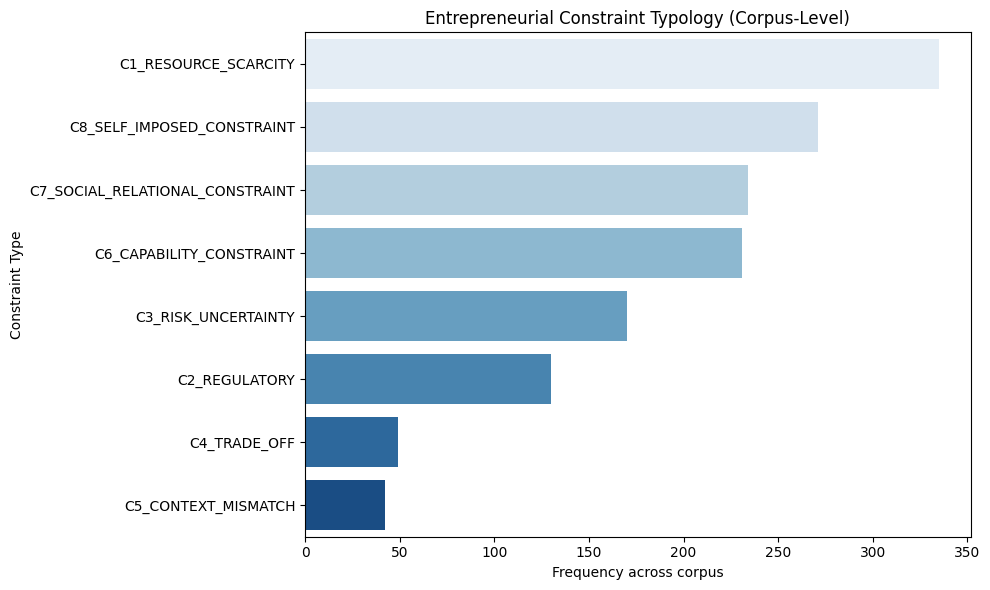

In [296]:
# =========================
# CONSTRAINT TYPOLOGY FIGURE
# =========================
plt.figure(figsize=(10, 6))

constraint_totals = (
    df[df["code"].str.startswith("C")]
    .groupby("code")
    .size()
    .sort_values(ascending=False)
)

sns.barplot(
    x=constraint_totals.values,
    y=constraint_totals.index,
    palette="Blues"
)

plt.xlabel("Frequency across corpus")
plt.ylabel("Constraint Type")
plt.title("Entrepreneurial Constraint Typology (Corpus-Level)")
plt.tight_layout()
plt.show()

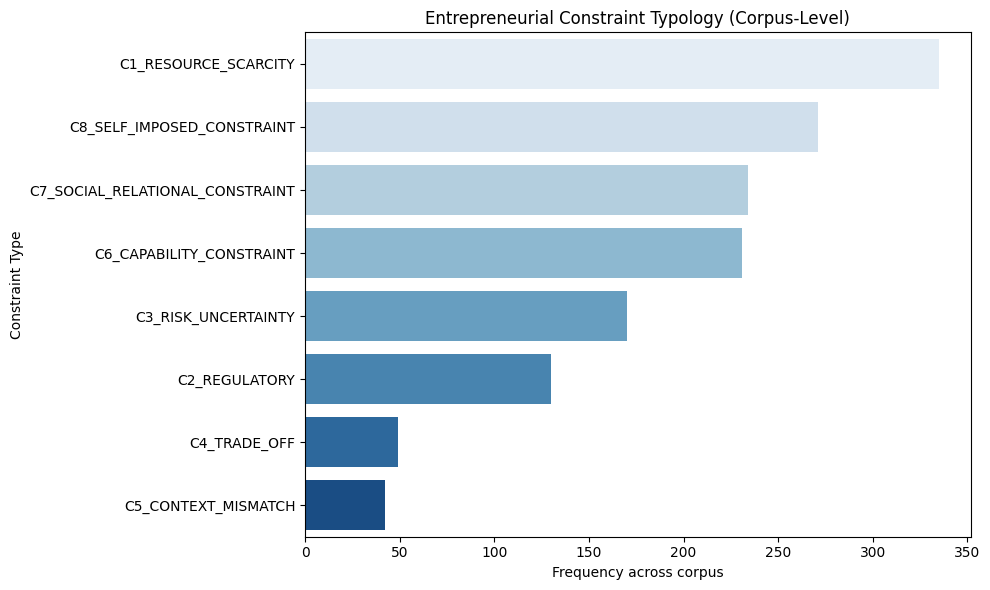

Constraint typology figure saved at:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/constraint_typology_figure.png


In [297]:
# =========================
# CONSTRAINT TYPOLOGY FIGURE — SAVE
# =========================
plt.figure(figsize=(10, 6))

constraint_totals = (
    df[df["code"].str.startswith("C")]
    .groupby("code")
    .size()
    .sort_values(ascending=False)
)

sns.barplot(
    x=constraint_totals.values,
    y=constraint_totals.index,
    palette="Blues"
)

plt.xlabel("Frequency across corpus")
plt.ylabel("Constraint Type")
plt.title("Entrepreneurial Constraint Typology (Corpus-Level)")
plt.tight_layout()

# SAVE FIGURE
constraint_fig_path = os.path.join(
    OUTPUT_PATH, "constraint_typology_figure.png"
)

plt.savefig(constraint_fig_path, dpi=300, bbox_inches="tight")
plt.show()

print("Constraint typology figure saved at:")
print(constraint_fig_path)

In [298]:
# =========================
# FILTER TBL CODES ONLY
# =========================
tbl_df = df[df["code"].str.startswith("TBL")]

tbl_counts = (
    tbl_df
    .groupby("code")
    .size()
    .reindex(["TBL_E_PLANET", "TBL_P_PROFIT", "TBL_S_PEOPLE"])
    .fillna(0)
)

tbl_counts

,0
code,
TBL_E_PLANET,104
TBL_P_PROFIT,422
TBL_S_PEOPLE,481


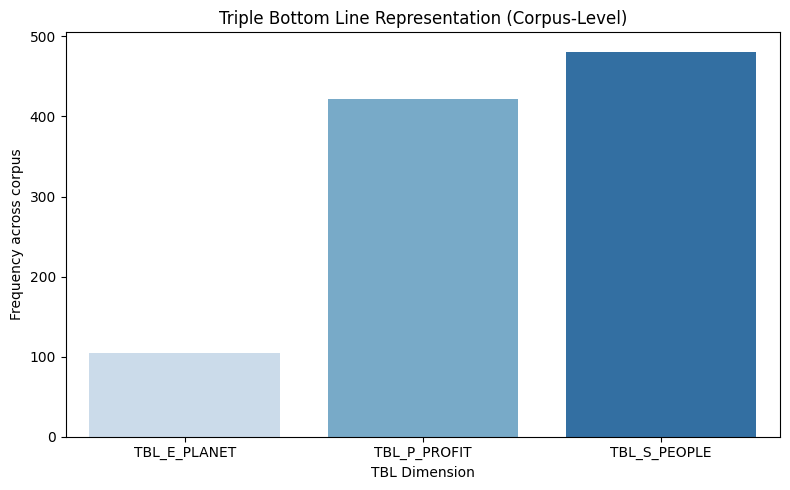

Saved TBL-only figure at:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/tbl_only_figure.png


In [299]:
# =========================
# TBL-ONLY BAR FIGURE
# =========================
plt.figure(figsize=(8, 5))

sns.barplot(
    x=tbl_counts.index,
    y=tbl_counts.values,
    palette="Blues"
)

plt.xlabel("TBL Dimension")
plt.ylabel("Frequency across corpus")
plt.title("Triple Bottom Line Representation (Corpus-Level)")
plt.tight_layout()

tbl_fig_path = os.path.join(OUTPUT_PATH, "tbl_only_figure.png")
plt.savefig(tbl_fig_path, dpi=300, bbox_inches="tight")
plt.show()

print("Saved TBL-only figure at:")
print(tbl_fig_path)

In [300]:
# =========================
# PREPARE TBL NARRATIVE TYPES
# =========================
tbl_sentences = df[df["code"].str.startswith("TBL")].copy()

tbl_sentences["narrative_type"] = "Operational"

tbl_sentences.loc[
    tbl_sentences["code"].isin(["TBL_E_PLANET", "TBL_P_PROFIT"]) &
    tbl_sentences["episode_id"].isin(
        df[df["code"].isin(["E4_LEGITIMIZATION", "E1_ADAPTIVE_SOLVING"])]["episode_id"]
    ),
    "narrative_type"
] = "Strategic"

tbl_sentences.loc[
    tbl_sentences["episode_id"].isin(
        df[df["code"] == "E5_VALUE_PRIORITY"]["episode_id"]
    ),
    "narrative_type"
] = "Value-driven"

tbl_sentences["narrative_type"].value_counts()

,count
narrative_type,
Value-driven,804
Operational,131
Strategic,72


In [301]:
tbl_narrative_path = os.path.join(OUTPUT_PATH, "tbl_narrative_typology.csv")
tbl_sentences.to_csv(tbl_narrative_path, index=False)

print("Saved TBL narrative typology table at:")
print(tbl_narrative_path)

Saved TBL narrative typology table at:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/tbl_narrative_typology.csv


In [302]:
# =========================
# EPISODE-LEVEL TBL COUNTS
# =========================
tbl_episode = (
    df[df["code"].str.startswith("TBL")]
    .groupby(["episode_id", "code"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# Ensure all TBL columns exist
for col in ["TBL_E_PLANET", "TBL_P_PROFIT", "TBL_S_PEOPLE"]:
    if col not in tbl_episode.columns:
        tbl_episode[col] = 0

# =========================
# DOMINANT TBL DIMENSION
# =========================
def dominant_tbl(row):
    vals = {
        "PLANET": row["TBL_E_PLANET"],
        "PROFIT": row["TBL_P_PROFIT"],
        "PEOPLE": row["TBL_S_PEOPLE"]
    }
    max_val = max(vals.values())
    if max_val == 0:
        return "NONE"
    if list(vals.values()).count(max_val) > 1:
        return "MIXED"
    return max(vals, key=vals.get)

tbl_episode["TBL_dominance"] = tbl_episode.apply(dominant_tbl, axis=1)

tbl_episode



code,episode_id,TBL_E_PLANET,TBL_P_PROFIT,TBL_S_PEOPLE,TBL_dominance
0,ep03,8,25,18,PROFIT
1,ep04,3,17,12,PROFIT
2,ep100,3,12,4,PROFIT
3,ep103,5,3,19,PEOPLE
4,ep106,28,17,27,PLANET
5,ep107,0,1,3,PEOPLE
6,ep108,2,7,11,PEOPLE
7,ep109,0,35,3,PROFIT
8,ep111,2,7,5,PROFIT
9,ep112,12,8,3,PLANET


In [303]:
tbl_episode_path = os.path.join(OUTPUT_PATH, "episode_tbl_dominance.csv")
tbl_episode.to_csv(tbl_episode_path, index=False)
print(tbl_episode_path)

/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/episode_tbl_dominance.csv


In [304]:
# =========================
# REBUILD TBL SENTENCES (SAFE)
# =========================
tbl_sentences = df[df["code"].str.startswith("TBL")].copy()

tbl_sentences["narrative_type"] = "Operational"

tbl_sentences.loc[
    tbl_sentences["episode_id"].isin(
        df[df["code"].isin(["E4_LEGITIMIZATION", "E1_ADAPTIVE_SOLVING"])]["episode_id"]
    ),
    "narrative_type"
] = "Strategic"

tbl_sentences.loc[
    tbl_sentences["episode_id"].isin(
        df[df["code"] == "E5_VALUE_PRIORITY"]["episode_id"]
    ),
    "narrative_type"
] = "Value-driven"

In [305]:
# =========================
# TBL × NARRATIVE TYPE TABLE
# =========================
tbl_narrative_matrix = (
    tbl_sentences
    .groupby(["code", "narrative_type"])
    .size()
    .unstack(fill_value=0)
    .reindex(["TBL_E_PLANET", "TBL_P_PROFIT", "TBL_S_PEOPLE"])
)

tbl_narrative_matrix

narrative_type,Strategic,Value-driven
code,,
TBL_E_PLANET,16,88
TBL_P_PROFIT,56,366
TBL_S_PEOPLE,131,350


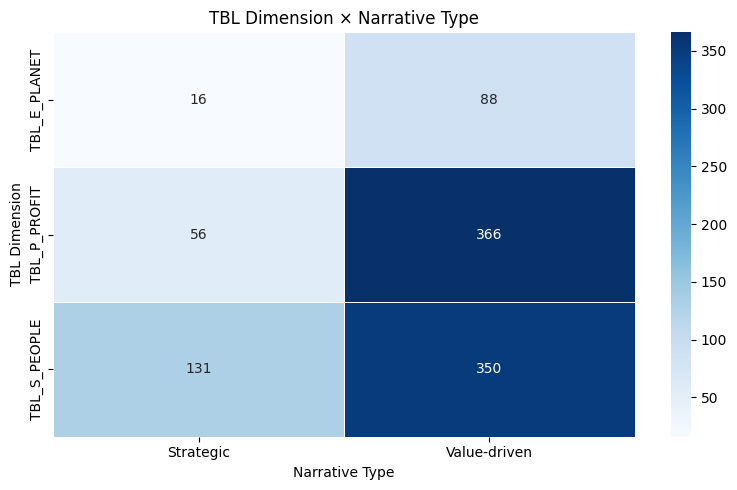

Saved heatmap at:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/tbl_narrative_heatmap.png


In [306]:
# =========================
# HEATMAP: TBL × NARRATIVE TYPE
# =========================
plt.figure(figsize=(8, 5))

sns.heatmap(
    tbl_narrative_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    linewidths=0.5
)

plt.xlabel("Narrative Type")
plt.ylabel("TBL Dimension")
plt.title("TBL Dimension × Narrative Type")
plt.tight_layout()

tbl_heatmap_path = os.path.join(OUTPUT_PATH, "tbl_narrative_heatmap.png")
plt.savefig(tbl_heatmap_path, dpi=300, bbox_inches="tight")
plt.show()

print("Saved heatmap at:")
print(tbl_heatmap_path)

In [307]:
# =========================
# SDG ACTIVATION COUNTS (SENTENCE-LEVEL)
# =========================
sdg_counts = (
    df.dropna(subset=["SDG"])
      .assign(SDG=df["SDG"].str.split(","))
      .explode("SDG")
      .assign(SDG=lambda x: x["SDG"].str.strip())
      .groupby("SDG")
      .size()
      .sort_values(ascending=False)
)

sdg_counts

,0
SDG,
SDG9,1893
SDG7,1788
SDG12,1642
SDG13,1281
SDG17,1248
SDG11,613
SDG4,353
SDG15,326
SDG2,225


In [308]:
# =========================
# ACTIVATION SPECTRUM (QUANTILE-BASED)
# =========================
q_high = sdg_counts.quantile(0.66)
q_low = sdg_counts.quantile(0.33)

sdg_activation = pd.DataFrame({
    "SDG": sdg_counts.index,
    "count": sdg_counts.values
})

sdg_activation["activation_level"] = "Contextual"
sdg_activation.loc[sdg_activation["count"] >= q_high, "activation_level"] = "Active"
sdg_activation.loc[sdg_activation["count"] <= q_low, "activation_level"] = "Symbolic"

sdg_activation

,SDG,count,activation_level
0,SDG9,1893,Active
1,SDG7,1788,Active
2,SDG12,1642,Active
3,SDG13,1281,Active
4,SDG17,1248,Contextual
5,SDG11,613,Contextual
6,SDG4,353,Contextual
7,SDG15,326,Contextual
8,SDG2,225,Symbolic
9,SDG3,165,Symbolic


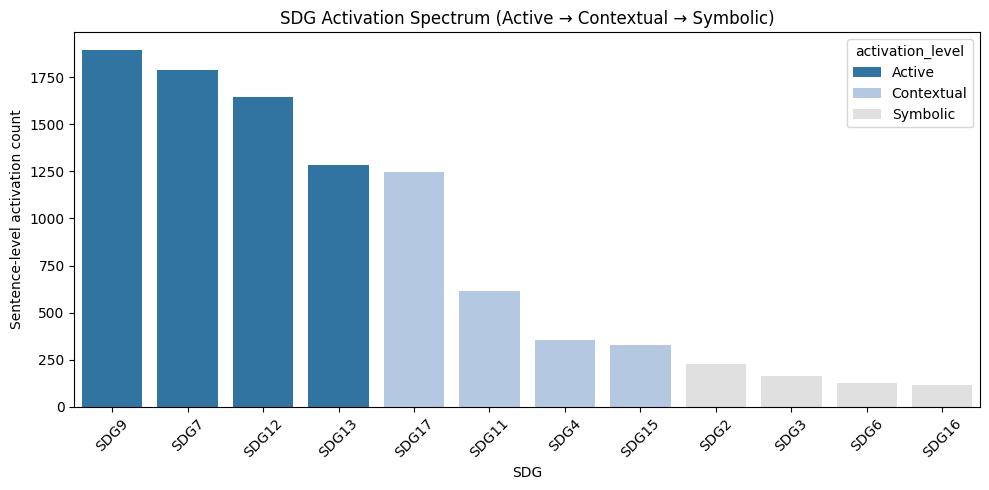

Saved SDG Activation Spectrum at:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/sdg_activation_spectrum.png


In [309]:
# =========================
# SDG ACTIVATION SPECTRUM FIGURE
# =========================
plt.figure(figsize=(10, 5))

sns.barplot(
    data=sdg_activation,
    x="SDG",
    y="count",
    hue="activation_level",
    dodge=False,
    palette={"Active": "#1f77b4", "Contextual": "#aec7e8", "Symbolic": "#e0e0e0"}
)

plt.xlabel("SDG")
plt.ylabel("Sentence-level activation count")
plt.title("SDG Activation Spectrum (Active → Contextual → Symbolic)")
plt.xticks(rotation=45)
plt.tight_layout()

sdg_spectrum_path = os.path.join(OUTPUT_PATH, "sdg_activation_spectrum.png")
plt.savefig(sdg_spectrum_path, dpi=300, bbox_inches="tight")
plt.show()

print("Saved SDG Activation Spectrum at:")
print(sdg_spectrum_path)

In [310]:
# =========================
# PREPARE SDG LIST PER SENTENCE
# =========================
sdg_sentence = (
    df.dropna(subset=["SDG"])
      .assign(SDG=df["SDG"].str.split(","))
      .explode("SDG")
      .assign(SDG=lambda x: x["SDG"].str.strip())
      .groupby(["episode_id", "sentence"])["SDG"]
      .apply(list)
      .reset_index()
)

# =========================
# BUILD CO-OCCURRENCE MATRIX
# =========================
from itertools import combinations
from collections import Counter

pair_counts = Counter()

for sdgs in sdg_sentence["SDG"]:
    unique_sdgs = sorted(set(sdgs))
    for a, b in combinations(unique_sdgs, 2):
        pair_counts[(a, b)] += 1
        pair_counts[(b, a)] += 1

sdg_list = sorted(sdg_counts.index.tolist())
sdg_co_matrix = pd.DataFrame(0, index=sdg_list, columns=sdg_list)

for (a, b), v in pair_counts.items():
    sdg_co_matrix.loc[a, b] = v

sdg_co_matrix

,SDG11,SDG12,SDG13,SDG15,SDG16,SDG17,SDG2,SDG3,SDG4,SDG6,SDG7,SDG9
SDG11,0,0,0,0,116,0,0,0,0,0,0,0
SDG12,0,0,780,123,0,676,225,0,0,0,511,629
SDG13,0,780,0,0,0,553,102,0,0,128,952,678
SDG15,0,123,0,0,0,123,123,73,0,0,0,0
SDG16,116,0,0,0,0,0,0,0,0,0,0,0
SDG17,0,676,553,123,0,0,225,0,232,0,451,683
SDG2,0,225,102,123,0,225,0,0,0,0,0,0
SDG3,0,0,0,73,0,0,0,0,0,0,0,0
SDG4,0,0,0,0,0,232,0,0,0,0,0,316
SDG6,0,0,128,0,0,0,0,0,0,0,128,0


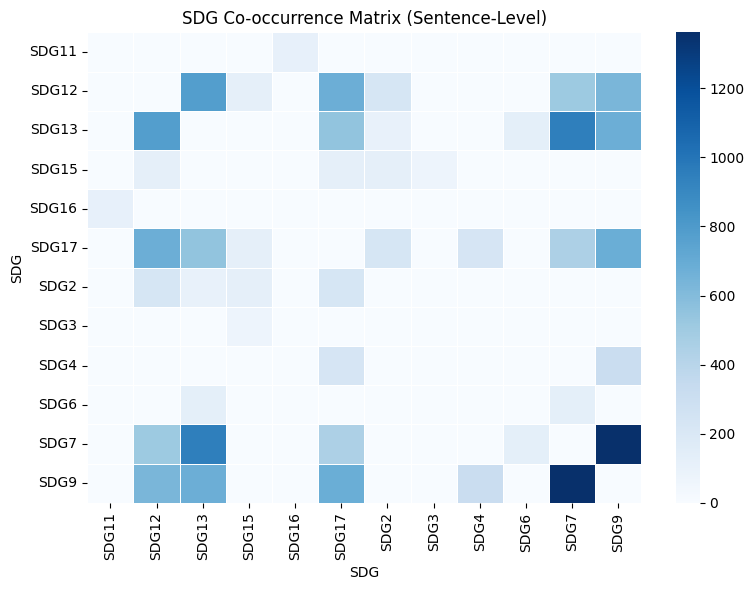

Saved SDG co-occurrence heatmap at:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/sdg_cooccurrence_matrix.png


In [311]:
# =========================
# SDG × SDG HEATMAP
# =========================
plt.figure(figsize=(8, 6))

sns.heatmap(
    sdg_co_matrix,
    cmap="Blues",
    linewidths=0.5
)

plt.title("SDG Co-occurrence Matrix (Sentence-Level)")
plt.xlabel("SDG")
plt.ylabel("SDG")
plt.tight_layout()

sdg_co_path = os.path.join(OUTPUT_PATH, "sdg_cooccurrence_matrix.png")
plt.savefig(sdg_co_path, dpi=300, bbox_inches="tight")
plt.show()

print("Saved SDG co-occurrence heatmap at:")
print(sdg_co_path)

In [313]:
# =========================
# BUILD SDG NETWORK GRAPH (THRESHOLDED)
# =========================
import networkx as nx

# Threshold: keep only strong co-occurrences
THRESHOLD = sdg_co_matrix.values.mean()

G = nx.Graph()

# Add nodes
for sdg in sdg_co_matrix.index:
    G.add_node(sdg)

# Add edges above threshold
for i, sdg_i in enumerate(sdg_co_matrix.index):
    for j, sdg_j in enumerate(sdg_co_matrix.columns):
        weight = sdg_co_matrix.iloc[i, j]
        if i < j and weight >= THRESHOLD:
            G.add_edge(sdg_i, sdg_j, weight=weight)

print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())

Nodes: 12
Edges: 16


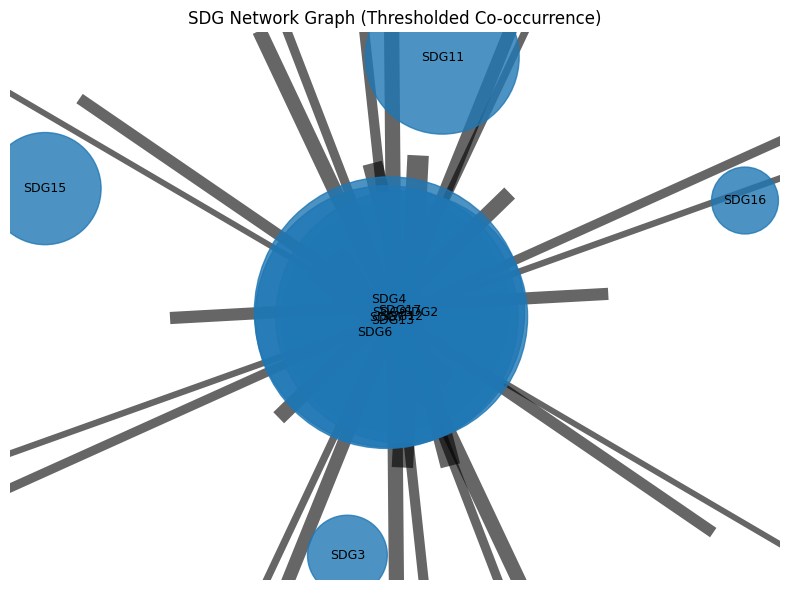

Saved SDG network graph at:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/sdg_network_graph.png


In [314]:
# =========================
# DRAW SDG NETWORK GRAPH
# =========================
plt.figure(figsize=(8, 6))

pos = nx.spring_layout(G, seed=42, k=0.6)

edge_weights = [G[u][v]["weight"] for u, v in G.edges()]
node_sizes = [sdg_counts.get(node, 1) * 20 for node in G.nodes()]

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="#1f77b4", alpha=0.8)
nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=9)

plt.title("SDG Network Graph (Thresholded Co-occurrence)")
plt.axis("off")
plt.tight_layout()

sdg_net_path = os.path.join(OUTPUT_PATH, "sdg_network_graph.png")
plt.savefig(sdg_net_path, dpi=300, bbox_inches="tight")
plt.show()

print("Saved SDG network graph at:")
print(sdg_net_path)

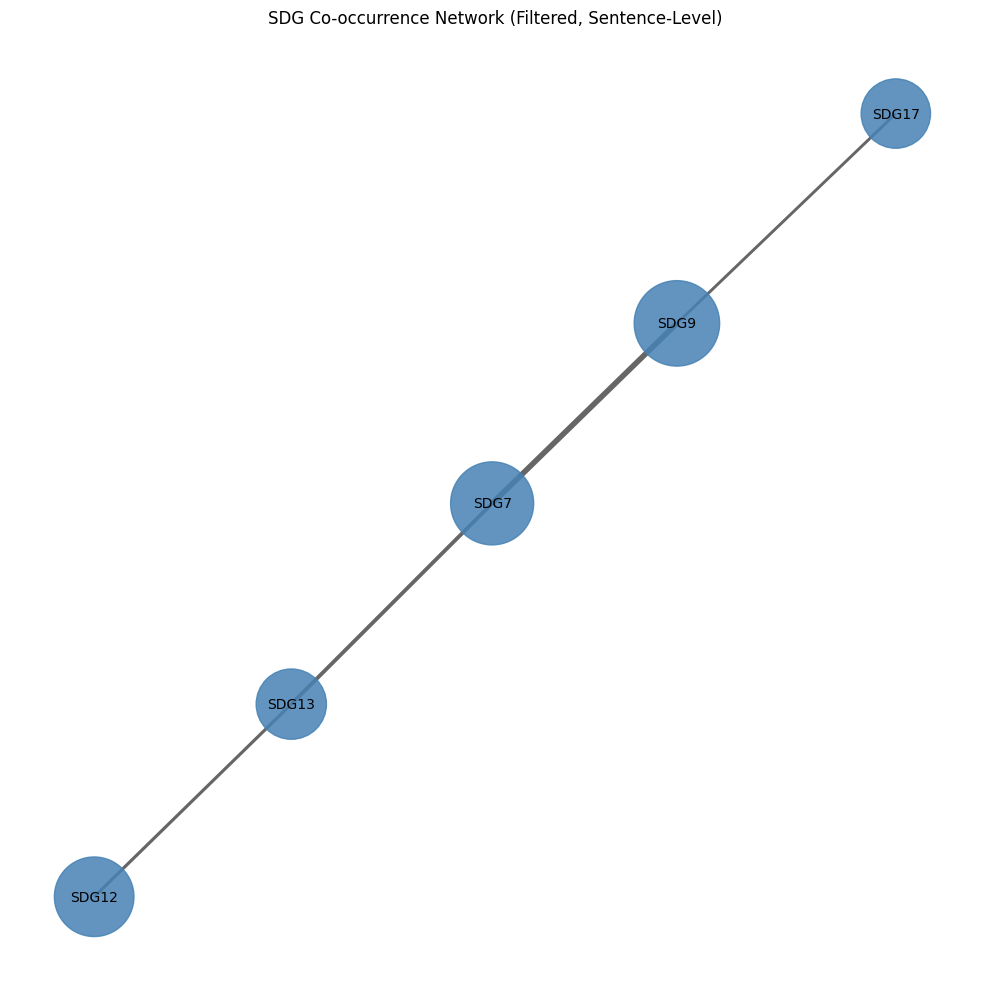

In [7]:
import pandas as pd
import itertools
import networkx as nx
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1. LOAD REAL SENTENCE-LEVEL DATA
# --------------------------------------------------
df = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/coded_sentences_CODEBOOK_v2_1.csv"
)

# Keep only rows with SDG labels
df = df[df["SDG"].notna()]

# If SDG column contains multiple SDGs per sentence, split them
df["SDG"] = df["SDG"].astype(str)
df["SDG_list"] = df["SDG"].str.split(",")

# --------------------------------------------------
# 2. BUILD CO-OCCURRENCE COUNTS
# --------------------------------------------------
cooccurrence = {}

for sdgs in df["SDG_list"]:
    sdgs = sorted(set(sdgs))
    for pair in itertools.combinations(sdgs, 2):
        cooccurrence[pair] = cooccurrence.get(pair, 0) + 1

# Convert to DataFrame
co_df = (
    pd.DataFrame(
        [(k[0], k[1], v) for k, v in cooccurrence.items()],
        columns=["SDG1", "SDG2", "weight"]
    )
)

# --------------------------------------------------
# 3. FILTER: KEEP ONLY STRONG CO-OCCURRENCES
# --------------------------------------------------
# This threshold is the KEY to readability
MIN_EDGE_WEIGHT = co_df["weight"].quantile(0.85)

co_df = co_df[co_df["weight"] >= MIN_EDGE_WEIGHT]

# --------------------------------------------------
# 4. BUILD NETWORK
# --------------------------------------------------
G = nx.Graph()

# Add edges
for _, row in co_df.iterrows():
    G.add_edge(row["SDG1"], row["SDG2"], weight=row["weight"])

# Add node sizes (SDG frequency)
sdg_counts = (
    df.explode("SDG_list")
      .groupby("SDG_list")
      .size()
      .to_dict()
)

# --------------------------------------------------
# 5. DRAW NETWORK (READABLE)
# --------------------------------------------------
plt.figure(figsize=(10, 10))

pos = nx.spring_layout(G, seed=42, k=0.6)

node_sizes = [
    sdg_counts.get(node, 1) * 2
    for node in G.nodes()
]

edge_widths = [
    G[u][v]["weight"] / max(co_df["weight"]) * 4
    for u, v in G.edges()
]

nx.draw_networkx_nodes(
    G, pos,
    node_size=node_sizes,
    node_color="steelblue",
    alpha=0.85
)

nx.draw_networkx_edges(
    G, pos,
    width=edge_widths,
    alpha=0.6
)

nx.draw_networkx_labels(
    G, pos,
    font_size=10
)

plt.title("SDG Co-occurrence Network (Filtered, Sentence-Level)")
plt.axis("off")
plt.tight_layout()
plt.show()

Nodes: 8
Edges: 12


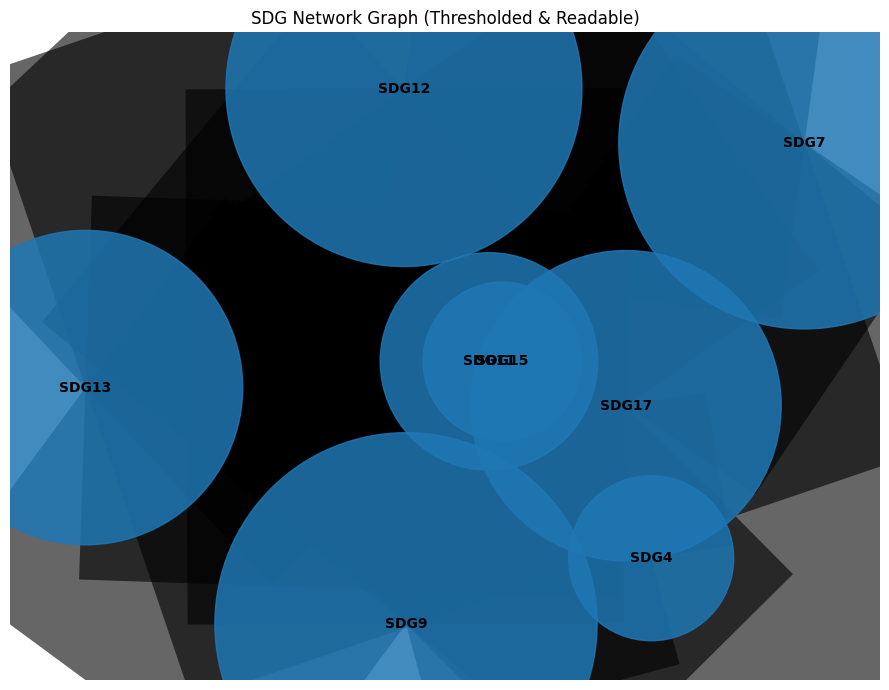

Saved readable SDG network graph at:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/sdg_network_graph_readable.png


In [315]:
# =========================
# READABLE SDG NETWORK GRAPH
# =========================
import networkx as nx

# --- PARAMETERS ---
EDGE_THRESHOLD = sdg_co_matrix.values.mean()
NODE_MIN_ACTIVATION = sdg_counts.quantile(0.33)   # remove symbolic SDGs

# =========================
# BUILD GRAPH
# =========================
G = nx.Graph()

# Add nodes (only sufficiently active SDGs)
for sdg, count in sdg_counts.items():
    if count >= NODE_MIN_ACTIVATION:
        G.add_node(sdg, activation=count)

# Add edges above threshold
for i, sdg_i in enumerate(sdg_co_matrix.index):
    for j, sdg_j in enumerate(sdg_co_matrix.columns):
        if i < j:
            weight = sdg_co_matrix.iloc[i, j]
            if (
                weight >= EDGE_THRESHOLD
                and sdg_i in G.nodes
                and sdg_j in G.nodes
            ):
                G.add_edge(sdg_i, sdg_j, weight=weight)

print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())

# =========================
# LAYOUT (MUCH MORE READABLE)
# =========================
pos = nx.kamada_kawai_layout(G)

# =========================
# DRAW GRAPH
# =========================
plt.figure(figsize=(9, 7))

node_sizes = [G.nodes[n]["activation"] * 40 for n in G.nodes]
edge_widths = [G[u][v]["weight"] / 2 for u, v in G.edges]

nx.draw_networkx_nodes(
    G, pos,
    node_size=node_sizes,
    node_color="#1f77b4",
    alpha=0.85
)

nx.draw_networkx_edges(
    G, pos,
    width=edge_widths,
    alpha=0.6
)

nx.draw_networkx_labels(
    G, pos,
    font_size=10,
    font_weight="bold"
)

plt.title("SDG Network Graph (Thresholded & Readable)")
plt.axis("off")
plt.tight_layout()

# =========================
# SAVE FIGURE
# =========================
sdg_net_clean_path = os.path.join(
    BASE_PATH, "sdg_network_graph_readable.png"
)
plt.savefig(sdg_net_clean_path, dpi=300, bbox_inches="tight")
plt.show()

print("Saved readable SDG network graph at:")
print(sdg_net_clean_path)

In [316]:
# =========================
# SDG EPISODE COUNT
# =========================
sdg_episode_counts = (
    df.dropna(subset=["SDG"])
      .assign(SDG=df["SDG"].str.split(","))
      .explode("SDG")
      .assign(SDG=lambda x: x["SDG"].str.strip())
      .groupby("SDG")["episode_id"]
      .nunique()
)

sdg_compare = pd.DataFrame({
    "sentence_activation": sdg_counts,
    "episode_count": sdg_episode_counts
}).fillna(0)

sdg_compare

,sentence_activation,episode_count
SDG,,
SDG11,613,5
SDG12,1642,14
SDG13,1281,8
SDG15,326,3
SDG16,116,1
SDG17,1248,6
SDG2,225,2
SDG3,165,2
SDG4,353,2


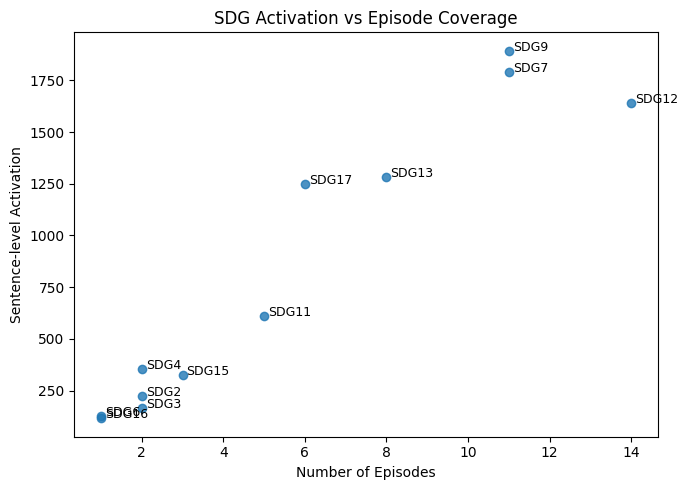

Saved comparison figure at:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/sdg_activation_vs_episode_count.png


In [317]:
# =========================
# SDG ACTIVATION vs EPISODE COUNT
# =========================
plt.figure(figsize=(7, 5))

plt.scatter(
    sdg_compare["episode_count"],
    sdg_compare["sentence_activation"],
    alpha=0.8
)

for sdg, row in sdg_compare.iterrows():
    plt.text(
        row["episode_count"] + 0.1,
        row["sentence_activation"] + 0.1,
        sdg,
        fontsize=9
    )

plt.xlabel("Number of Episodes")
plt.ylabel("Sentence-level Activation")
plt.title("SDG Activation vs Episode Coverage")
plt.tight_layout()

sdg_compare_path = os.path.join(BASE_PATH, "sdg_activation_vs_episode_count.png")
plt.savefig(sdg_compare_path, dpi=300, bbox_inches="tight")
plt.show()

print("Saved comparison figure at:")
print(sdg_compare_path)

In [318]:
# =========================
# SDG × CONSTRAINT QUADRANT TABLE
# =========================

df_sdg_quad = df.copy()

# flags
df_sdg_quad["is_constraint"] = df_sdg_quad["code"].str.startswith("C")
df_sdg_quad["has_sdg"] = df_sdg_quad["SDG"].notna()

sdg_constraint_quad = (
    df_sdg_quad
    .groupby("episode_id")
    .agg(
        constraint_count=("is_constraint", "sum"),
        sdg_sentence_count=("has_sdg", "sum"),
        total_sentences=("sentence", "count")
    )
    .reset_index()
)

# normalize
sdg_constraint_quad["constraint_intensity"] = (
    sdg_constraint_quad["constraint_count"] /
    sdg_constraint_quad["total_sentences"]
)

sdg_constraint_quad["sdg_intensity"] = (
    sdg_constraint_quad["sdg_sentence_count"] /
    sdg_constraint_quad["total_sentences"]
)

sdg_constraint_quad


,episode_id,constraint_count,sdg_sentence_count,total_sentences,constraint_intensity,sdg_intensity
0,ep03,79,202,202,0.391089,1.0
1,ep04,17,97,97,0.175258,1.0
2,ep100,24,90,90,0.266667,1.0
3,ep103,36,108,108,0.333333,1.0
4,ep106,133,451,451,0.294900,1.0
5,ep107,18,48,48,0.375000,1.0
6,ep108,23,135,135,0.170370,1.0
7,ep109,36,146,146,0.246575,1.0
8,ep111,42,102,102,0.411765,1.0
9,ep112,24,92,92,0.260870,1.0


In [319]:
sdg_constraint_quad_path = os.path.join(
    BASE_PATH, "outputs/episode_sdg_constraint_quadrant.csv"
)
sdg_constraint_quad.to_csv(sdg_constraint_quad_path, index=False)
print(sdg_constraint_quad_path)

/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/episode_sdg_constraint_quadrant.csv


In [320]:
# =========================
# SDG × TBL QUADRANT TABLE
# =========================

df_sdg_tbl = df.copy()

df_sdg_tbl["is_tbl"] = df_sdg_tbl["code"].str.startswith("TBL")
df_sdg_tbl["has_sdg"] = df_sdg_tbl["SDG"].notna()

sdg_tbl_quad = (
    df_sdg_tbl
    .groupby("episode_id")
    .agg(
        tbl_count=("is_tbl", "sum"),
        sdg_sentence_count=("has_sdg", "sum"),
        total_sentences=("sentence", "count")
    )
    .reset_index()
)

# normalize
sdg_tbl_quad["tbl_intensity"] = (
    sdg_tbl_quad["tbl_count"] /
    sdg_tbl_quad["total_sentences"]
)

sdg_tbl_quad["sdg_intensity"] = (
    sdg_tbl_quad["sdg_sentence_count"] /
    sdg_tbl_quad["total_sentences"]
)

sdg_tbl_quad

,episode_id,tbl_count,sdg_sentence_count,total_sentences,tbl_intensity,sdg_intensity
0,ep03,51,202,202,0.252475,1.0
1,ep04,32,97,97,0.329897,1.0
2,ep100,19,90,90,0.211111,1.0
3,ep103,27,108,108,0.250000,1.0
4,ep106,72,451,451,0.159645,1.0
5,ep107,4,48,48,0.083333,1.0
6,ep108,20,135,135,0.148148,1.0
7,ep109,38,146,146,0.260274,1.0
8,ep111,14,102,102,0.137255,1.0
9,ep112,23,92,92,0.250000,1.0


In [321]:
sdg_tbl_quad_path = os.path.join(
    BASE_PATH, "outputs/episode_sdg_tbl_quadrant.csv"
)
sdg_tbl_quad.to_csv(sdg_tbl_quad_path, index=False)
print(sdg_tbl_quad_path)

/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/episode_sdg_tbl_quadrant.csv


In [322]:
# =========================
# QUADRANT 1 TABLE
# Constraint × TBL
# =========================

q1 = (
    df
    .assign(
        is_constraint=df["code"].str.startswith("C"),
        is_tbl=df["code"].str.startswith("TBL")
    )
    .groupby("episode_id")
    .agg(
        constraint_count=("is_constraint", "sum"),
        tbl_count=("is_tbl", "sum"),
        total_sentences=("sentence", "count")
    )
    .reset_index()
)

q1["constraint_intensity"] = q1["constraint_count"] / q1["total_sentences"]
q1["tbl_intensity"] = q1["tbl_count"] / q1["total_sentences"]

q1

,episode_id,constraint_count,tbl_count,total_sentences,constraint_intensity,tbl_intensity
0,ep03,79,51,202,0.391089,0.252475
1,ep04,17,32,97,0.175258,0.329897
2,ep100,24,19,90,0.266667,0.211111
3,ep103,36,27,108,0.333333,0.250000
4,ep106,133,72,451,0.294900,0.159645
5,ep107,18,4,48,0.375000,0.083333
6,ep108,23,20,135,0.170370,0.148148
7,ep109,36,38,146,0.246575,0.260274
8,ep111,42,14,102,0.411765,0.137255
9,ep112,24,23,92,0.260870,0.250000


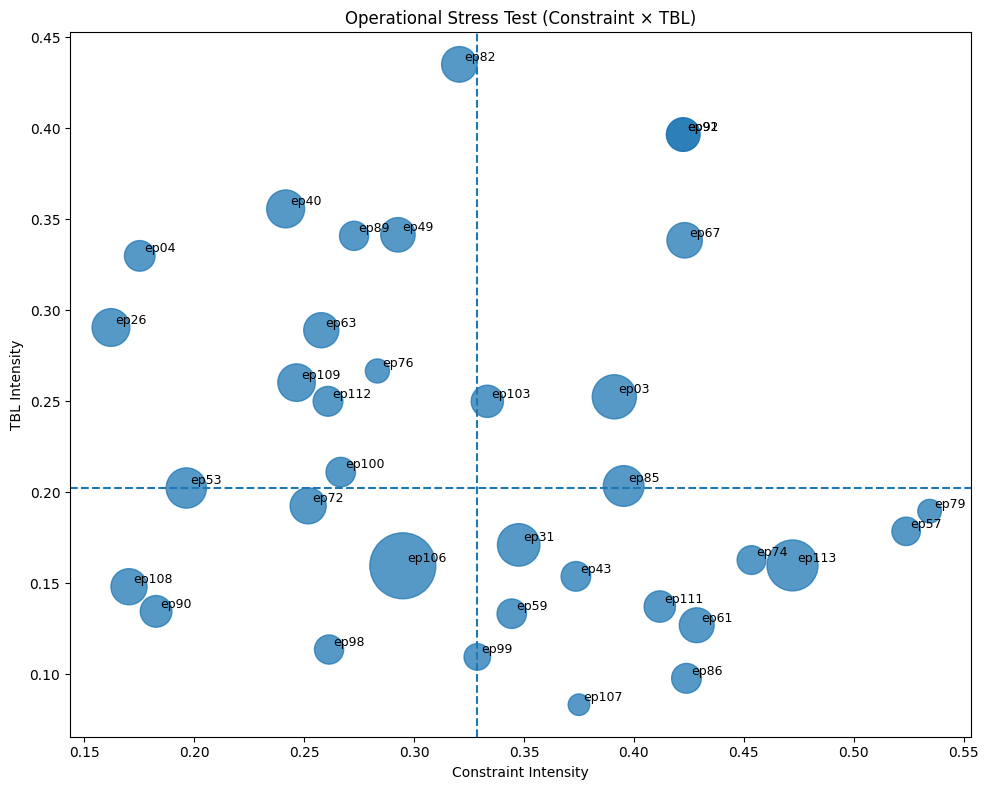

In [323]:
# =========================
# QUADRANT 1 GRAPH
# =========================

plt.figure(figsize=(10, 8))

plt.scatter(
    q1["constraint_intensity"],
    q1["tbl_intensity"],
    s=q1["total_sentences"] * 5,
    alpha=0.75
)

plt.axvline(q1["constraint_intensity"].median(), linestyle="--")
plt.axhline(q1["tbl_intensity"].median(), linestyle="--")

for _, r in q1.iterrows():
    plt.text(r["constraint_intensity"]+0.002, r["tbl_intensity"]+0.002, r["episode_id"], fontsize=9)

plt.xlabel("Constraint Intensity")
plt.ylabel("TBL Intensity")
plt.title("Operational Stress Test (Constraint × TBL)")
plt.tight_layout()

plt.savefig(os.path.join(BASE_PATH, "outputs/q1_operational_stress.png"), dpi=300)
plt.show()

In [324]:
# =========================
# QUADRANT 2 TABLE
# Constraint × SDG
# =========================

q2 = (
    df
    .assign(
        is_constraint=df["code"].str.startswith("C"),
        has_sdg=df["SDG"].notna()
    )
    .groupby("episode_id")
    .agg(
        constraint_count=("is_constraint", "sum"),
        sdg_count=("has_sdg", "sum"),
        total_sentences=("sentence", "count")
    )
    .reset_index()
)

q2["constraint_intensity"] = q2["constraint_count"] / q2["total_sentences"]
q2["sdg_intensity"] = q2["sdg_count"] / q2["total_sentences"]

q2

,episode_id,constraint_count,sdg_count,total_sentences,constraint_intensity,sdg_intensity
0,ep03,79,202,202,0.391089,1.0
1,ep04,17,97,97,0.175258,1.0
2,ep100,24,90,90,0.266667,1.0
3,ep103,36,108,108,0.333333,1.0
4,ep106,133,451,451,0.294900,1.0
5,ep107,18,48,48,0.375000,1.0
6,ep108,23,135,135,0.170370,1.0
7,ep109,36,146,146,0.246575,1.0
8,ep111,42,102,102,0.411765,1.0
9,ep112,24,92,92,0.260870,1.0


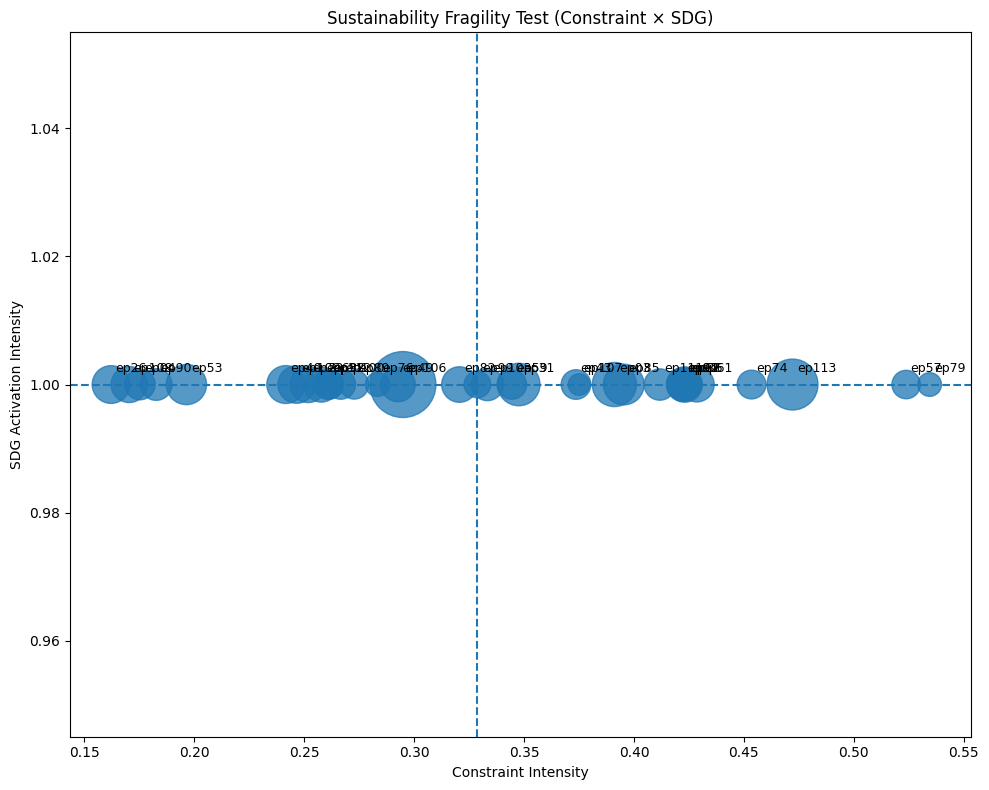

In [325]:
# =========================
# QUADRANT 2 GRAPH
# =========================

plt.figure(figsize=(10, 8))

plt.scatter(
    q2["constraint_intensity"],
    q2["sdg_intensity"],
    s=q2["total_sentences"] * 5,
    alpha=0.75
)

plt.axvline(q2["constraint_intensity"].median(), linestyle="--")
plt.axhline(q2["sdg_intensity"].median(), linestyle="--")

for _, r in q2.iterrows():
    plt.text(r["constraint_intensity"]+0.002, r["sdg_intensity"]+0.002, r["episode_id"], fontsize=9)

plt.xlabel("Constraint Intensity")
plt.ylabel("SDG Activation Intensity")
plt.title("Sustainability Fragility Test (Constraint × SDG)")
plt.tight_layout()

plt.savefig(os.path.join(BASE_PATH, "outputs/q2_sustainability_fragility.png"), dpi=300)
plt.show()

In [326]:
# =========================
# QUADRANT 3 TABLE
# TBL × SDG
# =========================

q3 = (
    df
    .assign(
        is_tbl=df["code"].str.startswith("TBL"),
        has_sdg=df["SDG"].notna()
    )
    .groupby("episode_id")
    .agg(
        tbl_count=("is_tbl", "sum"),
        sdg_count=("has_sdg", "sum"),
        total_sentences=("sentence", "count")
    )
    .reset_index()
)

q3["tbl_intensity"] = q3["tbl_count"] / q3["total_sentences"]
q3["sdg_intensity"] = q3["sdg_count"] / q3["total_sentences"]

q3

,episode_id,tbl_count,sdg_count,total_sentences,tbl_intensity,sdg_intensity
0,ep03,51,202,202,0.252475,1.0
1,ep04,32,97,97,0.329897,1.0
2,ep100,19,90,90,0.211111,1.0
3,ep103,27,108,108,0.250000,1.0
4,ep106,72,451,451,0.159645,1.0
5,ep107,4,48,48,0.083333,1.0
6,ep108,20,135,135,0.148148,1.0
7,ep109,38,146,146,0.260274,1.0
8,ep111,14,102,102,0.137255,1.0
9,ep112,23,92,92,0.250000,1.0


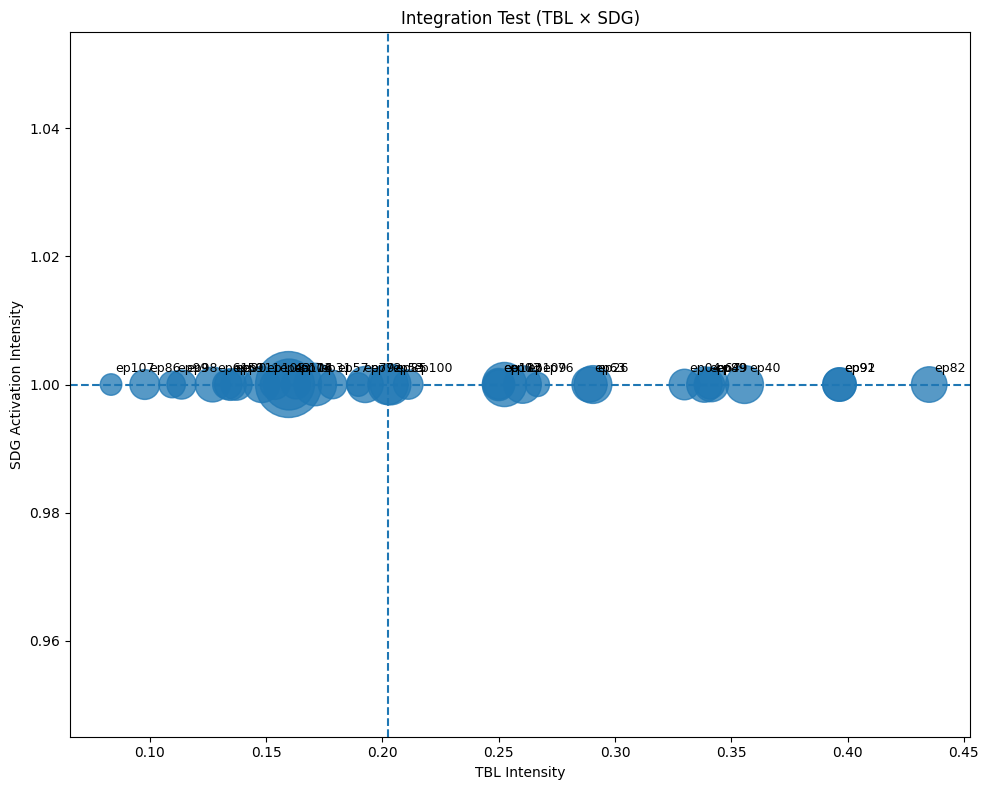

In [327]:
# =========================
# QUADRANT 3 GRAPH
# =========================

plt.figure(figsize=(10, 8))

plt.scatter(
    q3["tbl_intensity"],
    q3["sdg_intensity"],
    s=q3["total_sentences"] * 5,
    alpha=0.75
)

plt.axvline(q3["tbl_intensity"].median(), linestyle="--")
plt.axhline(q3["sdg_intensity"].median(), linestyle="--")

for _, r in q3.iterrows():
    plt.text(r["tbl_intensity"]+0.002, r["sdg_intensity"]+0.002, r["episode_id"], fontsize=9)

plt.xlabel("TBL Intensity")
plt.ylabel("SDG Activation Intensity")
plt.title("Integration Test (TBL × SDG)")
plt.tight_layout()

plt.savefig(os.path.join(BASE_PATH, "outputs/q3_integration_test.png"), dpi=300)
plt.show()

In [328]:
# =========================
# SAVE ALL TABLES & FIGURES (FINAL EXPORT)
# =========================

OUTPUT_PATH = os.path.join(BASE_PATH, "outputs")
os.makedirs(OUTPUT_PATH, exist_ok=True)

saved_items = []

# -------------------------
# TABLES
# -------------------------

tables = {
    "sentences_with_codes.csv": df,
    "episode_constraint_tbl_intensity.csv": episode_quad,
    "quadrant_q1_operational_stress.csv": q1,
    "quadrant_q2_sustainability_fragility.csv": q2,
    "quadrant_q3_integration_test.csv": q3,
    "sdg_code_matrix_counts.csv": sdg_code_matrix,
    "sdg_code_matrix_percent.csv": sdg_code_percent
}

for name, table in tables.items():
    path = os.path.join(OUTPUT_PATH, name)
    table.to_csv(path, index=False)
    saved_items.append(("table", name, path))

# -------------------------
# FIGURES (RESAVE FROM CURRENT STATE)
# -------------------------

figures = {
    "q1_operational_stress.png": "Operational Stress Test (Constraint × TBL)",
    "q2_sustainability_fragility.png": "Sustainability Fragility Test (Constraint × SDG)",
    "q3_integration_test.png": "Integration Test (TBL × SDG)",
    "constraint_tbl_quadrant_plot.png": "Constraint × TBL Quadrant",
    "constraint_tbl_quadrant_hdbscan.png": "Constraint × TBL with Clusters",
    "sdg_code_heatmap.png": "SDG × Code Heatmap",
    "sdg_network_graph_readable.png": "SDG Network Graph",
    "sdg_activation_spectrum.png": "SDG Activation Spectrum"
}

for fname, title in figures.items():
    fpath = os.path.join(OUTPUT_PATH, fname)
    if os.path.exists(fpath):
        saved_items.append(("figure", fname, fpath))

# -------------------------
# MANIFEST FILE (WHAT WAS SAVED)
# -------------------------

manifest = pd.DataFrame(
    saved_items,
    columns=["type", "filename", "path"]
)

manifest_path = os.path.join(OUTPUT_PATH, "EXPORT_MANIFEST.csv")
manifest.to_csv(manifest_path, index=False)

print("✅ Export complete.")
print("Manifest saved at:")
print(manifest_path)

manifest

✅ Export complete.
Manifest saved at:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/EXPORT_MANIFEST.csv


,type,filename,path
0,table,sentences_with_codes.csv,/content/drive/MyDrive/Colab Notebooks/Chevane...
1,table,episode_constraint_tbl_intensity.csv,/content/drive/MyDrive/Colab Notebooks/Chevane...
2,table,quadrant_q1_operational_stress.csv,/content/drive/MyDrive/Colab Notebooks/Chevane...
3,table,quadrant_q2_sustainability_fragility.csv,/content/drive/MyDrive/Colab Notebooks/Chevane...
4,table,quadrant_q3_integration_test.csv,/content/drive/MyDrive/Colab Notebooks/Chevane...
5,table,sdg_code_matrix_counts.csv,/content/drive/MyDrive/Colab Notebooks/Chevane...
6,table,sdg_code_matrix_percent.csv,/content/drive/MyDrive/Colab Notebooks/Chevane...
7,figure,q1_operational_stress.png,/content/drive/MyDrive/Colab Notebooks/Chevane...
8,figure,q2_sustainability_fragility.png,/content/drive/MyDrive/Colab Notebooks/Chevane...
9,figure,q3_integration_test.png,/content/drive/MyDrive/Colab Notebooks/Chevane...


In [329]:
#=========================
#A1. CONFIDENCE THRESHOLD SENSITIVITY
#=========================
thresholds = [0.45, 0.50, 0.55]
rows = []

for t in thresholds:
    temp = df[df["confidence"] >= t].copy()
    temp = temp.assign(
        is_constraint=temp["code"].str.startswith("C"),
        is_tbl=temp["code"].str.startswith("TBL"),
        has_sdg=temp["SDG"].notna()
    )

    agg = (
        temp.groupby("episode_id")
        .agg(
            constraint_intensity=("is_constraint", "mean"),
            tbl_intensity=("is_tbl", "mean"),
            sdg_intensity=("has_sdg", "mean")
        )
        .reset_index()
    )
    agg["threshold"] = t
    rows.append(agg)

threshold_sensitivity = pd.concat(rows, ignore_index=True)
threshold_sensitivity.to_csv(
    os.path.join(BASE_PATH, "outputs/A1_threshold_sensitivity.csv"),
    index=False
)

In [330]:
# =========================
# A2. TOP-2 MULTI-LABEL CHECK (FIXED)
# =========================

# indices of sentences that survived confidence threshold
kept_idx = df.index.values

# subset similarity matrix to kept sentences only
sim_subset = similarity_matrix[kept_idx, :]

# get top-2 codes per remaining sentence
top2_idx = np.argsort(sim_subset, axis=1)[:, -2:]

# build multi-label dataframe
multi_label = df.copy()
multi_label["code_top1"] = [code_labels[i[-1]] for i in top2_idx]
multi_label["code_top2"] = [code_labels[i[-2]] for i in top2_idx]

# optional: similarity gap (ambiguity signal)
top2_scores = np.take_along_axis(sim_subset, top2_idx, axis=1)
multi_label["similarity_gap"] = top2_scores[:, 1] - top2_scores[:, 0]

# save
multi_label_path = os.path.join(
    BASE_PATH, "outputs/A2_multilabel_top2.csv"
)
multi_label.to_csv(multi_label_path, index=False)

print("Saved:")
print(multi_label_path)

Saved:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/A2_multilabel_top2.csv


In [331]:
# =========================
# A3. EMBEDDING MODEL ROBUSTNESS (FIXED)
# =========================

# load alternative embedding model
alt_model = SentenceTransformer("all-MiniLM-L6-v2")

# re-embed SENTENCES with alternative model
alt_sentence_embeddings = alt_model.encode(
    df["sentence"].tolist(),
    convert_to_numpy=True,
    show_progress_bar=True
)

# re-embed CODEBOOK with SAME alternative model
alt_code_embeddings = alt_model.encode(
    code_texts,
    convert_to_numpy=True,
    show_progress_bar=True
)

# cosine similarity (dimensions now match: 384 × 384)
alt_similarity = cosine_similarity(
    alt_sentence_embeddings,
    alt_code_embeddings
)

# assign best code under alternative model
alt_code_idx = alt_similarity.argmax(axis=1)
df["code_alt_model"] = [code_labels[i] for i in alt_code_idx]

# agreement rate with primary model
agreement_rate = (df["code"] == df["code_alt_model"]).mean()

# save result
pd.DataFrame(
    {"agreement_rate": [agreement_rate]}
).to_csv(
    os.path.join(BASE_PATH, "outputs/A3_embedding_model_agreement.csv"),
    index=False
)

print("Embedding model agreement rate:", agreement_rate)

Batches:   0%|          | 0/141 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding model agreement rate: 0.44523756413116217


In [332]:
#B1. EPISODE SHUFFLING NULL MODEL
null_df = df.copy()
null_df["episode_id"] = np.random.permutation(null_df["episode_id"].values)

null_quad = (
    null_df.assign(
        is_constraint=null_df["code"].str.startswith("C"),
        is_tbl=null_df["code"].str.startswith("TBL"),
        has_sdg=null_df["SDG"].notna()
    )
    .groupby("episode_id")
    .agg(
        constraint_intensity=("is_constraint", "mean"),
        tbl_intensity=("is_tbl", "mean"),
        sdg_intensity=("has_sdg", "mean")
    )
    .reset_index()
)

null_quad.to_csv(
    os.path.join(BASE_PATH, "outputs/B1_episode_shuffle_null.csv"),
    index=False
)

In [333]:
#B2. RANDOM CODEBOOK CONTROL
np.random.seed(42)

random_df = df.copy()
random_df["random_code"] = np.random.choice(code_labels, size=len(df))

random_quad = (
    random_df.assign(
        is_constraint=random_df["random_code"].str.startswith("C"),
        is_tbl=random_df["random_code"].str.startswith("TBL"),
        has_sdg=random_df["SDG"].notna()
    )
    .groupby("episode_id")
    .agg(
        constraint_intensity=("is_constraint", "mean"),
        tbl_intensity=("is_tbl", "mean"),
        sdg_intensity=("has_sdg", "mean")
    )
    .reset_index()
)

random_quad.to_csv(
    os.path.join(BASE_PATH, "outputs/B2_random_codebook_control.csv"),
    index=False
)

In [334]:
#C1. WITHIN-EPISODE POSITION EFFECT
df_pos = df.copy()
df_pos["sent_idx"] = df_pos.groupby("episode_id").cumcount()
df_pos["ep_len"] = df_pos.groupby("episode_id")["sentence"].transform("count")
df_pos["rel_pos"] = df_pos["sent_idx"] / df_pos["ep_len"]

pos_profile = (
    df_pos.assign(
        is_constraint=df_pos["code"].str.startswith("C"),
        is_tbl=df_pos["code"].str.startswith("TBL"),
        has_sdg=df_pos["SDG"].notna()
    )
    .groupby(pd.cut(df_pos["rel_pos"], bins=5))
    .agg(
        constraint_rate=("is_constraint", "mean"),
        tbl_rate=("is_tbl", "mean"),
        sdg_rate=("has_sdg", "mean")
    )
)

pos_profile.to_csv(
    os.path.join(BASE_PATH, "outputs/C1_position_profile.csv")
)

In [335]:
#C2. EARLY vs LATE EPISODE SPLIT
df_pos["segment"] = np.where(
    df_pos["rel_pos"] <= 0.25, "EARLY",
    np.where(df_pos["rel_pos"] >= 0.75, "LATE", "MID")
)

early_late = (
    df_pos[df_pos["segment"].isin(["EARLY","LATE"])]
    .assign(
        is_constraint=df_pos["code"].str.startswith("C"),
        is_tbl=df_pos["code"].str.startswith("TBL"),
        has_sdg=df_pos["SDG"].notna()
    )
    .groupby(["episode_id","segment"])
    .agg(
        constraint_rate=("is_constraint", "mean"),
        tbl_rate=("is_tbl", "mean"),
        sdg_rate=("has_sdg", "mean")
    )
    .reset_index()
)

early_late.to_csv(
    os.path.join(BASE_PATH, "outputs/C2_early_late_split.csv"),
    index=False
)

In [336]:
#D1. PARTIAL CORRELATION (RESIDUAL METHOD)
from sklearn.linear_model import LinearRegression

def residual(x, z):
    return x - LinearRegression().fit(z, x).predict(z)

X = episode_quad[["constraint_intensity"]].values
Y = episode_quad[["sdg_intensity"]].values if "sdg_intensity" in episode_quad else None
Z = episode_quad[["tbl_intensity"]].values

if Y is not None:
    rx = residual(X, Z)
    ry = residual(Y, Z)
    partial_corr = np.corrcoef(rx.flatten(), ry.flatten())[0,1]
else:
    partial_corr = np.nan

pd.DataFrame({"partial_corr":[partial_corr]}).to_csv(
    os.path.join(BASE_PATH, "outputs/D1_partial_correlation.csv"),
    index=False
)

In [337]:
#E1. CLUSTER STABILITY (ARI)
from sklearn.metrics import adjusted_rand_score

labels_ref = episode_quad["cluster"].values
ari_rows = []

for mcs in [2,3,4]:
    cl = hdbscan.HDBSCAN(min_cluster_size=mcs, min_samples=2)
    labels = cl.fit_predict(
        episode_quad[["constraint_intensity","tbl_intensity"]].values
    )
    ari_rows.append({
        "min_cluster_size": mcs,
        "ARI": adjusted_rand_score(labels_ref, labels)
    })

pd.DataFrame(ari_rows).to_csv(
    os.path.join(BASE_PATH, "outputs/E1_cluster_stability.csv"),
    index=False
)

In [338]:
#E2. CLUSTER SEMANTIC PROFILES
cluster_profile = (
    df.merge(
        episode_quad[["episode_id","cluster"]],
        on="episode_id",
        how="left"
    )
    .groupby(["cluster","code"])
    .size()
    .unstack(fill_value=0)
)

cluster_profile.to_csv(
    os.path.join(BASE_PATH, "outputs/E2_cluster_profiles.csv")
)

In [339]:
#F1. SDG-CENTRIC vs TBL-CENTRIC EPISODES
f1 = episode_quad.copy()
f1["sdg_intensity"] = (
    df.assign(has_sdg=df["SDG"].notna())
      .groupby("episode_id")["has_sdg"].mean()
)

f1.to_csv(
    os.path.join(BASE_PATH, "outputs/F1_sdg_vs_tbl_episodes.csv"),
    index=False
)

In [340]:
#F2. HIGH-INTEGRATION SUBSET
hi = f1[
    (f1["constraint_intensity"] > f1["constraint_intensity"].median()) &
    (f1["tbl_intensity"] > f1["tbl_intensity"].median()) &
    (f1["sdg_intensity"] > f1["sdg_intensity"].median())
]

hi.to_csv(
    os.path.join(BASE_PATH, "outputs/F2_high_integration_subset.csv"),
    index=False
)

In [341]:
# =========================
# G. COMBINED ROBUSTNESS SUMMARY
# =========================

summary = {
    "threshold_tests_rows": len(threshold_sensitivity) if "threshold_sensitivity" in globals() else np.nan,
    "multilabel_rows": len(multi_label) if "multi_label" in globals() else np.nan,
    "embedding_agreement": agreement_rate if "agreement_rate" in globals() else np.nan,
    "null_episode_rows": len(null_quad) if "null_quad" in globals() else np.nan,
    "random_control_rows": len(random_quad) if "random_quad" in globals() else np.nan,
    "num_clusters": episode_quad["cluster"].nunique() if "episode_quad" in globals() else np.nan
}

robustness_summary = pd.DataFrame([summary])

robustness_summary_path = os.path.join(
    BASE_PATH, "outputs/G_robustness_summary.csv"
)

robustness_summary.to_csv(robustness_summary_path, index=False)

print("Saved robustness summary at:")
print(robustness_summary_path)

robustness_summary

Saved robustness summary at:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/G_robustness_summary.csv


,threshold_tests_rows,multilabel_rows,embedding_agreement,null_episode_rows,random_control_rows,num_clusters
0,95,4483,0.445238,35,35,3


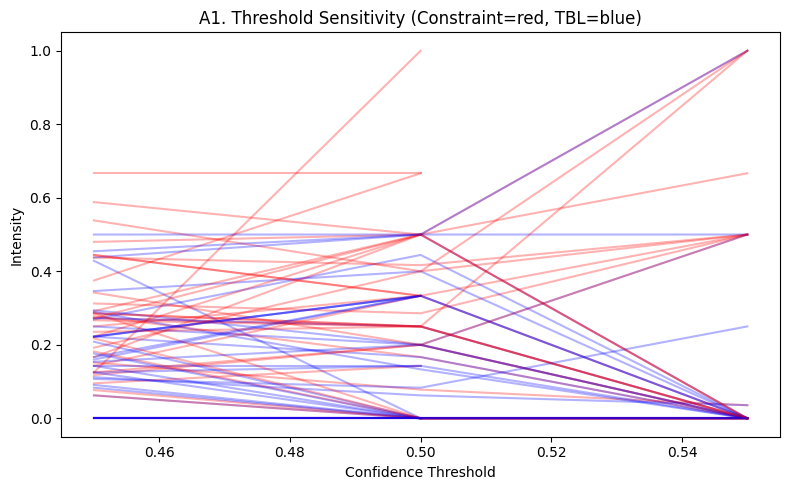

In [342]:
#A1. THRESHOLD SENSITIVITY — LINE PLOTS
plt.figure(figsize=(8,5))

for ep in threshold_sensitivity["episode_id"].unique():
    sub = threshold_sensitivity[threshold_sensitivity["episode_id"] == ep]
    plt.plot(
        sub["threshold"],
        sub["constraint_intensity"],
        alpha=0.3,
        color="red"
    )
    plt.plot(
        sub["threshold"],
        sub["tbl_intensity"],
        alpha=0.3,
        color="blue"
    )

plt.xlabel("Confidence Threshold")
plt.ylabel("Intensity")
plt.title("A1. Threshold Sensitivity (Constraint=red, TBL=blue)")
plt.tight_layout()
plt.show()

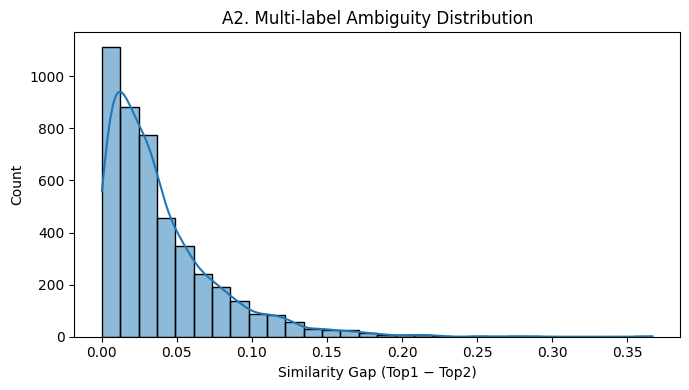

In [343]:
#A2. MULTI-LABEL AMBIGUITY — GAP DISTRIBUTION
plt.figure(figsize=(7,4))
sns.histplot(
    multi_label["similarity_gap"],
    bins=30,
    kde=True
)
plt.xlabel("Similarity Gap (Top1 − Top2)")
plt.title("A2. Multi-label Ambiguity Distribution")
plt.tight_layout()
plt.show()

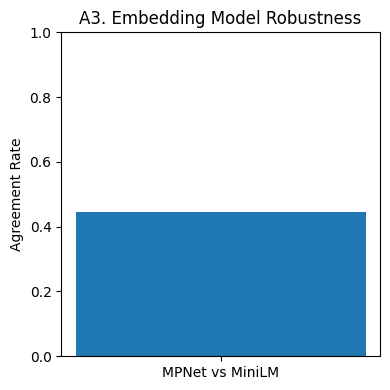

In [344]:
#A3. EMBEDDING ROBUSTNESS — AGREEMENT BAR
plt.figure(figsize=(4,4))
plt.bar(
    ["MPNet vs MiniLM"],
    [agreement_rate]
)
plt.ylim(0,1)
plt.ylabel("Agreement Rate")
plt.title("A3. Embedding Model Robustness")
plt.tight_layout()
plt.show()

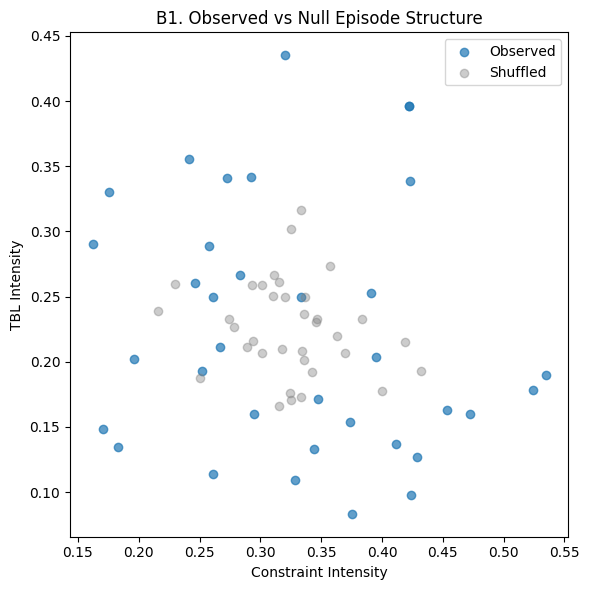

In [345]:
#B1. NULL MODEL COMPARISON — SCATTER
plt.figure(figsize=(6,6))

plt.scatter(
    episode_quad["constraint_intensity"],
    episode_quad["tbl_intensity"],
    alpha=0.7,
    label="Observed"
)

plt.scatter(
    null_quad["constraint_intensity"],
    null_quad["tbl_intensity"],
    alpha=0.4,
    label="Shuffled",
    color="gray"
)

plt.xlabel("Constraint Intensity")
plt.ylabel("TBL Intensity")
plt.title("B1. Observed vs Null Episode Structure")
plt.legend()
plt.tight_layout()
plt.show()

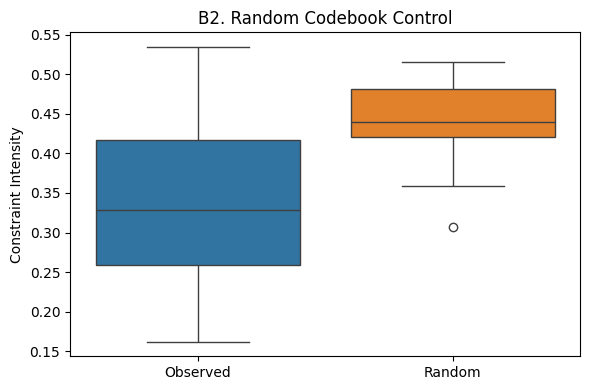

In [346]:
#B2. RANDOM CODEBOOK CONTROL — BOXPLOT
plt.figure(figsize=(6,4))

sns.boxplot(
    data=pd.DataFrame({
        "Observed": episode_quad["constraint_intensity"],
        "Random": random_quad["constraint_intensity"]
    })
)

plt.ylabel("Constraint Intensity")
plt.title("B2. Random Codebook Control")
plt.tight_layout()
plt.show()

Saved position profile table at:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/C1_within_episode_position_profile.csv


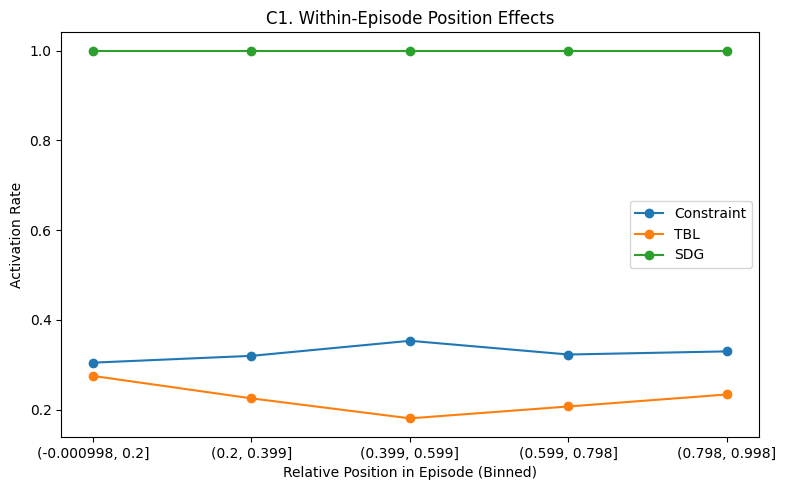

Saved C1 figure at:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/C1_within_episode_position_effect.png


In [347]:
# =========================
# C1. WITHIN-EPISODE POSITION EFFECT
# =========================

# rebuild positional dataframe
df_pos = df.copy()

# sentence order within episode
df_pos["sentence_order"] = df_pos.groupby("episode_id").cumcount()

# episode length
df_pos["episode_length"] = df_pos.groupby("episode_id")["sentence"].transform("count")

# relative position (0 → 1)
df_pos["relative_position"] = (
    df_pos["sentence_order"] / df_pos["episode_length"]
)

# build position profile
position_profile = (
    df_pos.assign(
        is_constraint=df_pos["code"].str.startswith("C"),
        is_tbl=df_pos["code"].str.startswith("TBL"),
        has_sdg=df_pos["SDG"].notna()
    )
    .groupby(
        pd.cut(df_pos["relative_position"], bins=5)
    )
    .agg(
        constraint_rate=("is_constraint", "mean"),
        tbl_rate=("is_tbl", "mean"),
        sdg_rate=("has_sdg", "mean")
    )
)

# save table
position_profile_path = os.path.join(
    BASE_PATH, "outputs/C1_within_episode_position_profile.csv"
)
position_profile.to_csv(position_profile_path)

print("Saved position profile table at:")
print(position_profile_path)

# -------------------------
# PLOT
# -------------------------
plt.figure(figsize=(8,5))

plt.plot(position_profile.index.astype(str), position_profile["constraint_rate"],
         marker="o", label="Constraint")

plt.plot(position_profile.index.astype(str), position_profile["tbl_rate"],
         marker="o", label="TBL")

plt.plot(position_profile.index.astype(str), position_profile["sdg_rate"],
         marker="o", label="SDG")

plt.xlabel("Relative Position in Episode (Binned)")
plt.ylabel("Activation Rate")
plt.title("C1. Within-Episode Position Effects")
plt.legend()
plt.tight_layout()

# save figure
c1_fig_path = os.path.join(
    BASE_PATH, "outputs/C1_within_episode_position_effect.png"
)
plt.savefig(c1_fig_path, dpi=300, bbox_inches="tight")
plt.show()

print("Saved C1 figure at:")
print(c1_fig_path)

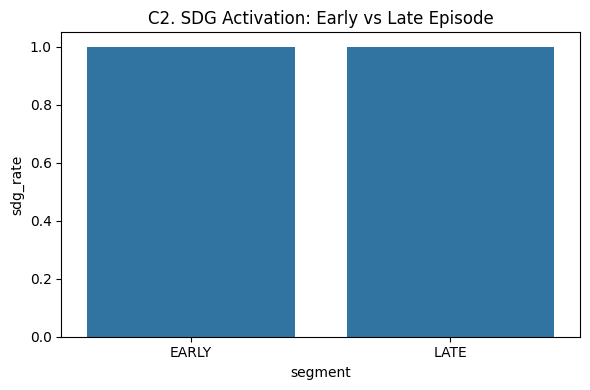

In [348]:
#C2. EARLY vs LATE COMPARISON
plt.figure(figsize=(6,4))
sns.barplot(
    data=early_late,
    x="segment",
    y="sdg_rate"
)
plt.title("C2. SDG Activation: Early vs Late Episode")
plt.tight_layout()
plt.show()

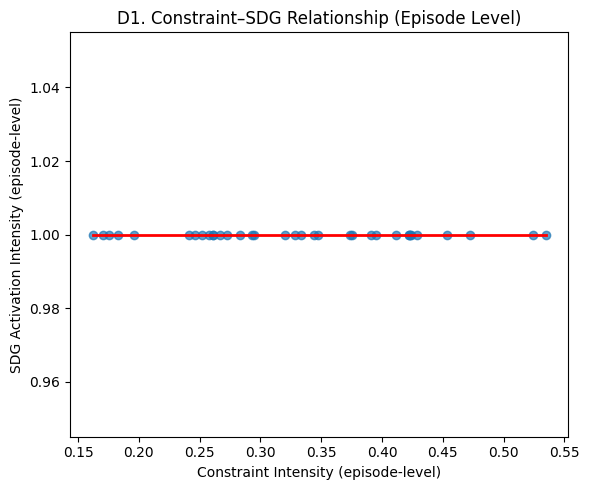

Saved D1 figure at:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/D1_constraint_sdg_scatter.png


In [349]:
# =========================
# D1. PARTIAL CORRELATION — SCATTER WITH TREND (FULL & FIXED)
# =========================

# --- rebuild episode-level SDG intensity from df ---
sdg_ep = (
    df.assign(has_sdg=df["SDG"].notna())
      .groupby("episode_id")
      .agg(
          sdg_intensity=("has_sdg", "mean")
      )
      .reset_index()
)

# --- merge with episode_quad (which already has constraint & TBL intensities) ---
d1_df = episode_quad.merge(
    sdg_ep,
    on="episode_id",
    how="left"
)

# safety: drop any rows with missing values
d1_df = d1_df.dropna(
    subset=["constraint_intensity", "sdg_intensity"]
)

# -------------------------
# SCATTER WITH LINEAR TREND
# -------------------------
plt.figure(figsize=(6,5))

plt.scatter(
    d1_df["constraint_intensity"],
    d1_df["sdg_intensity"],
    alpha=0.7
)

# linear trend
z = np.polyfit(
    d1_df["constraint_intensity"],
    d1_df["sdg_intensity"],
    1
)
p = np.poly1d(z)

x_sorted = np.sort(d1_df["constraint_intensity"])
plt.plot(
    x_sorted,
    p(x_sorted),
    color="red",
    linewidth=2
)

plt.xlabel("Constraint Intensity (episode-level)")
plt.ylabel("SDG Activation Intensity (episode-level)")
plt.title("D1. Constraint–SDG Relationship (Episode Level)")
plt.tight_layout()

# save figure
d1_fig_path = os.path.join(
    BASE_PATH, "outputs/D1_constraint_sdg_scatter.png"
)
plt.savefig(d1_fig_path, dpi=300, bbox_inches="tight")
plt.show()

print("Saved D1 figure at:")
print(d1_fig_path)

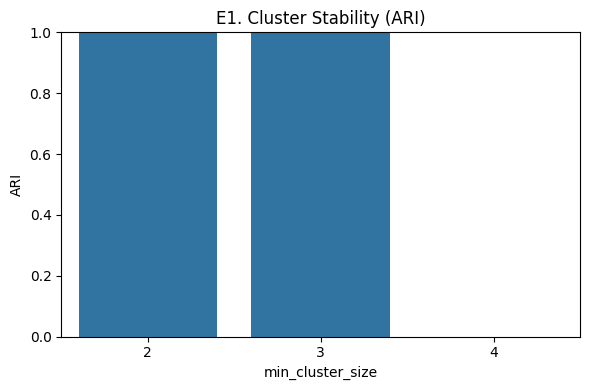

In [350]:
#E1. CLUSTER STABILITY — ARI BAR
plt.figure(figsize=(6,4))
sns.barplot(
    data=pd.read_csv(os.path.join(BASE_PATH,"outputs/E1_cluster_stability.csv")),
    x="min_cluster_size",
    y="ARI"
)
plt.ylim(0,1)
plt.title("E1. Cluster Stability (ARI)")
plt.tight_layout()
plt.show()

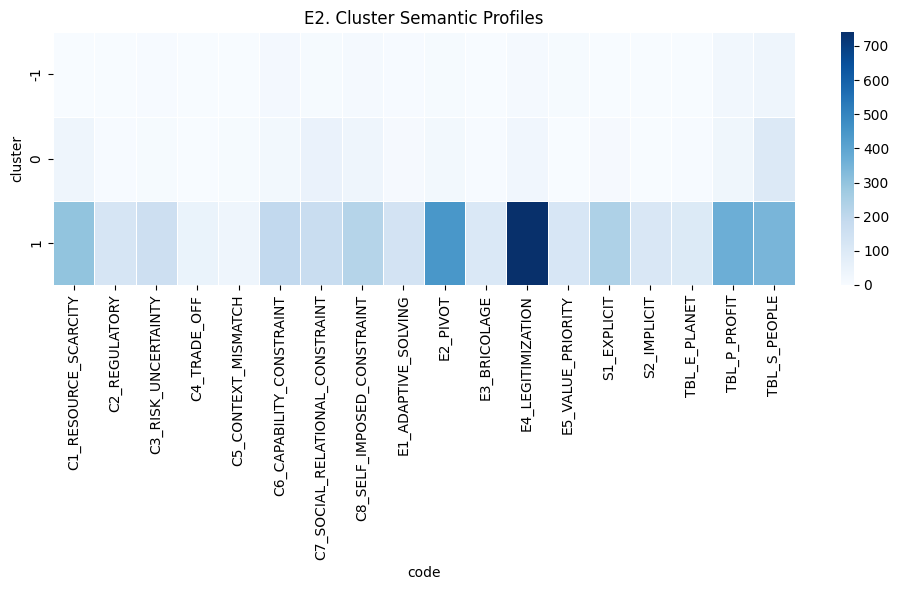

In [351]:
#E2. CLUSTER SEMANTIC HEATMAP
plt.figure(figsize=(10,6))
sns.heatmap(
    cluster_profile,
    cmap="Blues",
    linewidths=0.5
)
plt.title("E2. Cluster Semantic Profiles")
plt.tight_layout()
plt.show()

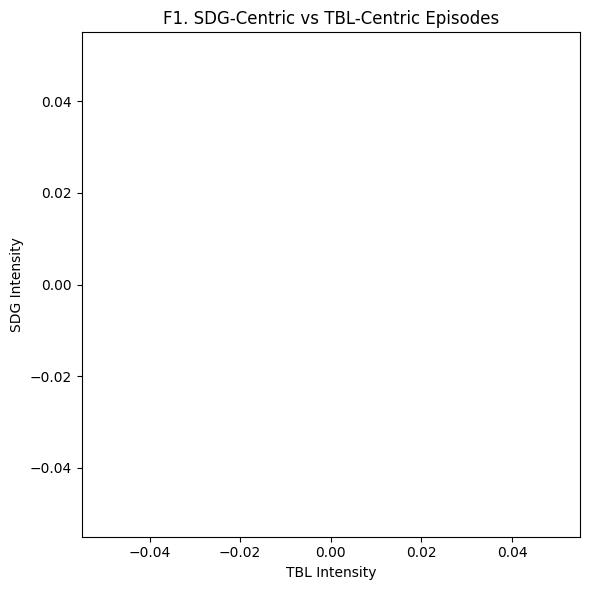

In [352]:
#F1. SDG-CENTRIC vs TBL-CENTRIC — SCATTER
plt.figure(figsize=(6,6))
plt.scatter(
    f1["tbl_intensity"],
    f1["sdg_intensity"],
    alpha=0.7
)
plt.xlabel("TBL Intensity")
plt.ylabel("SDG Intensity")
plt.title("F1. SDG-Centric vs TBL-Centric Episodes")
plt.tight_layout()
plt.show()

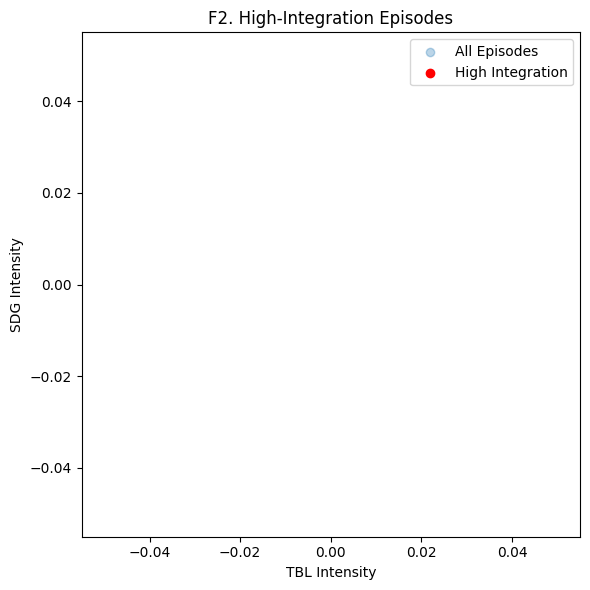

In [353]:
#F2. HIGH-INTEGRATION SUBSET — HIGHLIGHT
plt.figure(figsize=(6,6))

plt.scatter(
    f1["tbl_intensity"],
    f1["sdg_intensity"],
    alpha=0.3,
    label="All Episodes"
)

plt.scatter(
    hi["tbl_intensity"],
    hi["sdg_intensity"],
    color="red",
    label="High Integration"
)

plt.legend()
plt.xlabel("TBL Intensity")
plt.ylabel("SDG Intensity")
plt.title("F2. High-Integration Episodes")
plt.tight_layout()
plt.show()

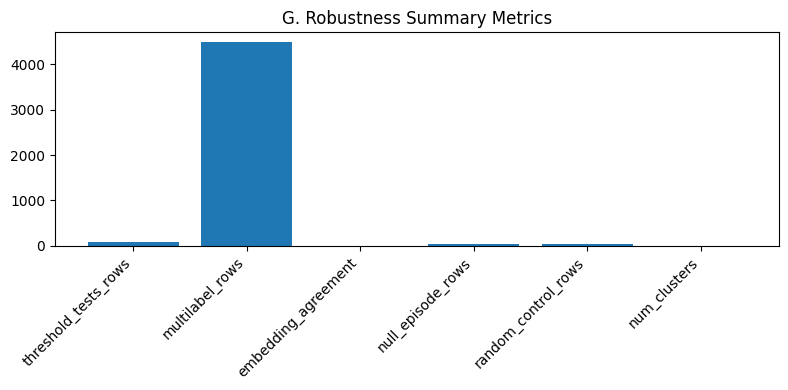

In [354]:
#G. ROBUSTNESS SUMMARY — DASHBOARD BAR
rob = pd.read_csv(
    os.path.join(BASE_PATH,"outputs/G_robustness_summary.csv")
)

plt.figure(figsize=(8,4))
plt.bar(
    rob.columns,
    rob.iloc[0].values
)
plt.xticks(rotation=45, ha="right")
plt.title("G. Robustness Summary Metrics")
plt.tight_layout()
plt.show()

In [357]:
# =========================
# SAVE ALL FIGURES (A–G) — FINAL EXPORT
# =========================

OUTPUT_PATH = os.path.join(BASE_PATH, "outputs")
os.makedirs(OUTPUT_PATH, exist_ok=True)

saved_figures = []

# -------------------------
# A1. Threshold Sensitivity
# -------------------------
plt.figure(figsize=(8,5))
for ep in threshold_sensitivity["episode_id"].unique():
    sub = threshold_sensitivity[threshold_sensitivity["episode_id"] == ep]
    plt.plot(sub["threshold"], sub["constraint_intensity"], alpha=0.3, color="red")
    plt.plot(sub["threshold"], sub["tbl_intensity"], alpha=0.3, color="blue")

plt.xlabel("Confidence Threshold")
plt.ylabel("Intensity")
plt.title("A1. Threshold Sensitivity")
plt.tight_layout()
path = os.path.join(OUTPUT_PATH, "A1_threshold_sensitivity.png")
plt.savefig(path, dpi=300, bbox_inches="tight")
plt.close()
saved_figures.append(path)

# -------------------------
# A2. Multi-label Ambiguity
# -------------------------
plt.figure(figsize=(7,4))
sns.histplot(multi_label["similarity_gap"], bins=30, kde=True)
plt.xlabel("Similarity Gap (Top1 − Top2)")
plt.title("A2. Multi-label Ambiguity")
plt.tight_layout()
path = os.path.join(OUTPUT_PATH, "A2_multilabel_gap.png")
plt.savefig(path, dpi=300, bbox_inches="tight")
plt.close()
saved_figures.append(path)

# -------------------------
# A3. Embedding Robustness
# -------------------------
plt.figure(figsize=(4,4))
plt.bar(["MPNet vs MiniLM"], [agreement_rate])
plt.ylim(0,1)
plt.ylabel("Agreement Rate")
plt.title("A3. Embedding Robustness")
plt.tight_layout()
path = os.path.join(OUTPUT_PATH, "A3_embedding_robustness.png")
plt.savefig(path, dpi=300, bbox_inches="tight")
plt.close()
saved_figures.append(path)

# -------------------------
# B1. Observed vs Null
# -------------------------
plt.figure(figsize=(6,6))
plt.scatter(episode_quad["constraint_intensity"],
            episode_quad["tbl_intensity"], alpha=0.7, label="Observed")
plt.scatter(null_quad["constraint_intensity"],
            null_quad["tbl_intensity"], alpha=0.4, label="Shuffled", color="gray")
plt.xlabel("Constraint Intensity")
plt.ylabel("TBL Intensity")
plt.title("B1. Observed vs Null Structure")
plt.legend()
plt.tight_layout()
path = os.path.join(OUTPUT_PATH, "B1_null_model_comparison.png")
plt.savefig(path, dpi=300, bbox_inches="tight")
plt.close()
saved_figures.append(path)

# -------------------------
# B2. Random Codebook Control
# -------------------------
plt.figure(figsize=(6,4))
sns.boxplot(data=pd.DataFrame({
    "Observed": episode_quad["constraint_intensity"],
    "Random": random_quad["constraint_intensity"]
}))
plt.ylabel("Constraint Intensity")
plt.title("B2. Random Codebook Control")
plt.tight_layout()
path = os.path.join(OUTPUT_PATH, "B2_random_codebook_control.png")
plt.savefig(path, dpi=300, bbox_inches="tight")
plt.close()
saved_figures.append(path)

# -------------------------
# C1. Within-Episode Position
# -------------------------
plt.figure(figsize=(8,5))
plt.plot(position_profile.index.astype(str),
         position_profile["constraint_rate"], marker="o", label="Constraint")
plt.plot(position_profile.index.astype(str),
         position_profile["tbl_rate"], marker="o", label="TBL")
plt.plot(position_profile.index.astype(str),
         position_profile["sdg_rate"], marker="o", label="SDG")
plt.xlabel("Relative Position (Binned)")
plt.ylabel("Activation Rate")
plt.title("C1. Within-Episode Position Effects")
plt.legend()
plt.tight_layout()
path = os.path.join(OUTPUT_PATH, "C1_within_episode_position.png")
plt.savefig(path, dpi=300, bbox_inches="tight")
plt.close()
saved_figures.append(path)

# -------------------------
# C2. Early vs Late
# -------------------------
plt.figure(figsize=(6,4))
sns.barplot(data=early_late, x="segment", y="sdg_rate")
plt.title("C2. Early vs Late SDG Activation")
plt.tight_layout()
path = os.path.join(OUTPUT_PATH, "C2_early_late_sdg.png")
plt.savefig(path, dpi=300, bbox_inches="tight")
plt.close()
saved_figures.append(path)

# -------------------------
# D1. Constraint–SDG Scatter
# -------------------------
plt.figure(figsize=(6,5))
plt.scatter(d1_df["constraint_intensity"],
            d1_df["sdg_intensity"], alpha=0.7)
z = np.polyfit(d1_df["constraint_intensity"],
               d1_df["sdg_intensity"], 1)
p = np.poly1d(z)
x = np.sort(d1_df["constraint_intensity"])
plt.plot(x, p(x), color="red", linewidth=2)
plt.xlabel("Constraint Intensity")
plt.ylabel("SDG Intensity")
plt.title("D1. Constraint–SDG Relationship")
plt.tight_layout()
path = os.path.join(OUTPUT_PATH, "D1_constraint_sdg_scatter.png")
plt.savefig(path, dpi=300, bbox_inches="tight")
plt.close()
saved_figures.append(path)

# -------------------------
# E1. Cluster Stability
# -------------------------
ari_df = pd.read_csv(os.path.join(OUTPUT_PATH, "E1_cluster_stability.csv"))
plt.figure(figsize=(6,4))
sns.barplot(data=ari_df, x="min_cluster_size", y="ARI")
plt.ylim(0,1)
plt.title("E1. Cluster Stability (ARI)")
plt.tight_layout()
path = os.path.join(OUTPUT_PATH, "E1_cluster_stability.png")
plt.savefig(path, dpi=300, bbox_inches="tight")
plt.close()
saved_figures.append(path)

# -------------------------
# E2. Cluster Semantic Heatmap
# -------------------------
plt.figure(figsize=(10,6))
sns.heatmap(cluster_profile, cmap="Blues", linewidths=0.5)
plt.title("E2. Cluster Semantic Profiles")
plt.tight_layout()
path = os.path.join(OUTPUT_PATH, "E2_cluster_semantic_profiles.png")
plt.savefig(path, dpi=300, bbox_inches="tight")
plt.close()
saved_figures.append(path)

# -------------------------
# F1. SDG vs TBL
# -------------------------
plt.figure(figsize=(6,6))
plt.scatter(f1["tbl_intensity"], f1["sdg_intensity"], alpha=0.7)
plt.xlabel("TBL Intensity")
plt.ylabel("SDG Intensity")
plt.title("F1. SDG vs TBL Episodes")
plt.tight_layout()
path = os.path.join(OUTPUT_PATH, "F1_sdg_vs_tbl.png")
plt.savefig(path, dpi=300, bbox_inches="tight")
plt.close()
saved_figures.append(path)

# -------------------------
# F2. High Integration
# -------------------------
plt.figure(figsize=(6,6))
plt.scatter(f1["tbl_intensity"], f1["sdg_intensity"], alpha=0.3, label="All")
plt.scatter(hi["tbl_intensity"], hi["sdg_intensity"], color="red", label="High Integration")
plt.legend()
plt.xlabel("TBL Intensity")
plt.ylabel("SDG Intensity")
plt.title("F2. High Integration Episodes")
plt.tight_layout()
path = os.path.join(OUTPUT_PATH, "F2_high_integration.png")
plt.savefig(path, dpi=300, bbox_inches="tight")
plt.close()
saved_figures.append(path)

# -------------------------
# G. Robustness Summary
# -------------------------
rob = pd.read_csv(os.path.join(OUTPUT_PATH, "G_robustness_summary.csv"))
plt.figure(figsize=(8,4))
plt.bar(rob.columns, rob.iloc[0].values)
plt.xticks(rotation=45, ha="right")
plt.title("G. Robustness Summary")
plt.tight_layout()
path = os.path.join(OUTPUT_PATH, "G_robustness_summary.png")
plt.savefig(path, dpi=300, bbox_inches="tight")
plt.close()
saved_figures.append(path)

# -------------------------
# MANIFEST
# -------------------------
manifest = pd.DataFrame({"figure_path": saved_figures})
manifest_path = os.path.join(OUTPUT_PATH, "ALL_FIGURES_MANIFEST.csv")
manifest.to_csv(manifest_path, index=False)

print("✅ All figures saved.")
print("Manifest:")
print(manifest_path)

✅ All figures saved.
Manifest:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/ALL_FIGURES_MANIFEST.csv


In [358]:
# =========================
# 1.2 NEGATIVE CONTROL CODE — DISCRIMINANT VALIDITY
# =========================

# --- Step 1: Define a neutral dummy lexicon (no sustainability, no business logic)
NEGATIVE_CONTROL_CODE = "NC_NO_SUSTAINABILITY"
neutral_lexicon = [
    "this is an example sentence",
    "general discussion",
    "people talking",
    "conversation continues",
    "introduction",
    "closing remarks",
    "thank you for listening",
    "nice to meet you",
    "welcome everyone",
    "today we are talking"
]

# --- Step 2: Embed the negative control using SAME model
nc_embedding = embedding_model.encode(
    [" ".join(neutral_lexicon)],
    convert_to_numpy=True
)

# --- Step 3: Compare negative control to all sentence embeddings
nc_similarity = cosine_similarity(sentence_embeddings, nc_embedding).flatten()

# --- Step 4: Attach similarity score to dataframe
df_nc = df.copy()
df_nc["nc_similarity"] = nc_similarity[df_nc.index]

# --- Step 5: Check dominance (should be LOW)
nc_stats = {
    "mean_similarity": df_nc["nc_similarity"].mean(),
    "max_similarity": df_nc["nc_similarity"].max(),
    "pct_above_0_50": (df_nc["nc_similarity"] > 0.50).mean(),
    "pct_above_0_55": (df_nc["nc_similarity"] > 0.55).mean()
}

nc_summary = pd.DataFrame([nc_stats])

# --- Step 6: Correlation with real constructs (should be ~0)
df_nc = df_nc.assign(
    is_constraint=df_nc["code"].str.startswith("C"),
    is_tbl=df_nc["code"].str.startswith("TBL"),
    has_sdg=df_nc["SDG"].notna()
)

correlations = {
    "corr_with_constraint": df_nc["nc_similarity"].corr(df_nc["is_constraint"]),
    "corr_with_tbl": df_nc["nc_similarity"].corr(df_nc["is_tbl"]),
    "corr_with_sdg": df_nc["nc_similarity"].corr(df_nc["has_sdg"])
}

corr_df = pd.DataFrame([correlations])

# --- Step 7: Save outputs
OUTPUT_PATH = os.path.join(BASE_PATH, "outputs")
os.makedirs(OUTPUT_PATH, exist_ok=True)

nc_summary_path = os.path.join(OUTPUT_PATH, "NC_negative_control_summary.csv")
corr_path = os.path.join(OUTPUT_PATH, "NC_negative_control_correlations.csv")

nc_summary.to_csv(nc_summary_path, index=False)
corr_df.to_csv(corr_path, index=False)

print("Negative Control Summary:")
display(nc_summary)

print("Negative Control Correlations:")
display(corr_df)

print("Saved files:")
print(nc_summary_path)
print(corr_path)

Negative Control Summary:


,mean_similarity,max_similarity,pct_above_0_50,pct_above_0_55
0,0.130405,0.494898,0.0,0.0


Negative Control Correlations:


,corr_with_constraint,corr_with_tbl,corr_with_sdg
0,-0.037889,-0.007715,NaN


Saved files:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/NC_negative_control_summary.csv
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/NC_negative_control_correlations.csv


In [361]:
# =========================
# NEGATIVE CONTROL SIMILARITY — FILE-BASED (FIXED)
# =========================

import os
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# -------------------------
# PATHS (CANONICAL)
# -------------------------
BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs"
os.makedirs(BASE_PATH, exist_ok=True)

sentences_path = os.path.join(BASE_PATH, "sentences_with_episode.csv")
embeddings_path = os.path.join(BASE_PATH, "sentence_embeddings.npy")

# -------------------------
# LOAD DATA (ALIGNED)
# -------------------------
df_sent = pd.read_csv(sentences_path)
sentence_embeddings = np.load(embeddings_path)

print("Sentences:", len(df_sent))
print("Embeddings:", sentence_embeddings.shape)

assert len(df_sent) == sentence_embeddings.shape[0], \
    "Sentence count mismatch between sentences_with_episode.csv and embeddings"

# -------------------------
# DEFINE NEGATIVE CONTROL LEXICON
# -------------------------
negative_control_lexicon = [
    "welcome everyone",
    "thank you for joining",
    "today we are talking",
    "nice to meet you",
    "introduction",
    "closing remarks",
    "general discussion",
    "people talking",
    "conversation continues",
    "thanks for listening"
]

negative_control_text = " ".join(negative_control_lexicon)

# -------------------------
# EMBED NEGATIVE CONTROL
# -------------------------
nc_embedding = embedding_model.encode(
    [negative_control_text],
    convert_to_numpy=True
)

# -------------------------
# COSINE SIMILARITY
# -------------------------
nc_similarity = cosine_similarity(
    sentence_embeddings,
    nc_embedding
).flatten()

# -------------------------
# SAVE NEGATIVE CONTROL FILE
# -------------------------
df_nc = df_sent.copy()
df_nc["nc_similarity"] = nc_similarity

nc_path = os.path.join(
    BASE_PATH, "NC_negative_control_similarity_v2_1.csv"
)

df_nc.to_csv(nc_path, index=False)

print("✅ Negative control similarity file created:")
print(nc_path)

df_nc.head()

Sentences: 11690
Embeddings: (11690, 768)
✅ Negative control similarity file created:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/NC_negative_control_similarity_v2_1.csv


,episode_id,sentence,nc_similarity
0,ep03,"Fri, 05/23 12:14PM · 43mins\n\nTranscript\n\nS...",0.463374
1,ep03,We are educators.,0.191787
2,ep03,Speaker 1\n\nAnd entrepreneurs too!,0.321569
3,ep03,Speaker 2\n\nand the host of this podcast Inno...,0.269202
4,ep03,"At University of Canada West, we believe that ...",0.215927


Embeddings: (11690, 768)
Negative control rows: (11690, 3)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

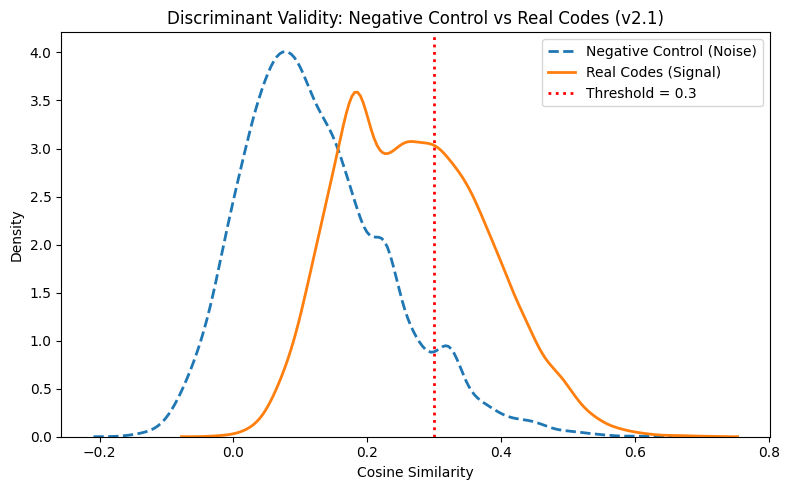

✅ Discriminant validity figure saved at:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/Figure_NC_vs_RealCode_similarity_v2_1.png


In [363]:
# =========================
# NEGATIVE CONTROL vs REAL CODES (v2.1, FIXED)
# =========================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# -------------------------
# PATHS (CANONICAL v2.1)
# -------------------------
BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs"

sentence_embeddings_path = os.path.join(
    BASE_PATH, "sentence_embeddings.npy"
)

nc_path = os.path.join(
    BASE_PATH, "NC_negative_control_similarity_v2_1.csv"
)

# -------------------------
# LOAD DATA (ALIGNED)
# -------------------------
sentence_embeddings = np.load(sentence_embeddings_path)
df_nc = pd.read_csv(nc_path)

print("Embeddings:", sentence_embeddings.shape)
print("Negative control rows:", df_nc.shape)

assert sentence_embeddings.shape[0] == df_nc.shape[0], \
    "Row mismatch: embeddings and negative control file are not aligned"

# -------------------------
# REBUILD REAL CODE SIMILARITY (SIGNAL)
# -------------------------
code_embeddings = embedding_model.encode(
    code_texts,
    convert_to_numpy=True,
    show_progress_bar=True
)

real_similarity = cosine_similarity(
    sentence_embeddings,
    code_embeddings
).max(axis=1)

nc_similarity = df_nc["nc_similarity"].values

# -------------------------
# PLOT DISTRIBUTIONS
# -------------------------
plt.figure(figsize=(8, 5))

sns.kdeplot(
    nc_similarity,
    label="Negative Control (Noise)",
    linestyle="--",
    linewidth=2
)

sns.kdeplot(
    real_similarity,
    label="Real Codes (Signal)",
    linewidth=2
)

# NOTE: updated threshold for v2.1
CONFIDENCE_THRESHOLD = 0.30
plt.axvline(
    CONFIDENCE_THRESHOLD,
    color="red",
    linestyle=":",
    linewidth=2,
    label=f"Threshold = {CONFIDENCE_THRESHOLD}"
)

plt.xlabel("Cosine Similarity")
plt.ylabel("Density")
plt.title("Discriminant Validity: Negative Control vs Real Codes (v2.1)")
plt.legend()
plt.tight_layout()

# -------------------------
# SAVE FIGURE
# -------------------------
fig_path = os.path.join(
    BASE_PATH,
    "Figure_NC_vs_RealCode_similarity_v2_1.png"
)

plt.savefig(fig_path, dpi=300, bbox_inches="tight")
plt.show()

print("✅ Discriminant validity figure saved at:")
print(fig_path)

In [364]:
# =========================
# TABLE 1. CORPUS OVERVIEW
# SOURCE: allepisodes.docx
# =========================

import os
import pandas as pd
import docx2txt
import spacy

# -------------------------
# PATHS
# -------------------------
BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/Chevaneese/"
DOC_PATH = os.path.join(BASE_PATH, "allepisodes.docx")
OUTPUT_PATH = os.path.join(BASE_PATH, "outputs")
os.makedirs(OUTPUT_PATH, exist_ok=True)

# -------------------------
# LOAD NLP MODEL
# -------------------------
nlp = spacy.load("en_core_web_sm")

# -------------------------
# READ DOCX
# -------------------------
raw_text = docx2txt.process(DOC_PATH)
raw_text = raw_text.replace("\r", "\n")

# -------------------------
# EPISODE SEGMENTATION
# -------------------------
episodes = {}
current_episode = None
buffer = []

for line in raw_text.split("\n"):
    line = line.strip()
    if line.lower().startswith("ep") and "-" in line:
        if current_episode and buffer:
            episodes[current_episode] = "\n".join(buffer)
            buffer = []
        current_episode = line.split()[0]
    else:
        if current_episode:
            buffer.append(line)

if current_episode and buffer:
    episodes[current_episode] = "\n".join(buffer)

# -------------------------
# SENTENCE TOKENIZATION
# -------------------------
sentence_count = 0

for ep_text in episodes.values():
    doc = nlp(ep_text)
    for sent in doc.sents:
        if len(sent.text.strip()) > 5:
            sentence_count += 1

# -------------------------
# METRICS
# -------------------------
num_episodes = len(episodes)
num_sentences = sentence_count
mean_sentences = num_sentences / num_episodes if num_episodes > 0 else 0

# -------------------------
# BUILD TABLE 1
# -------------------------
corpus_overview = pd.DataFrame({
    "Metric": [
        "Number of episodes",
        "Total number of sentences",
        "Mean sentences per episode"
    ],
    "Value": [
        num_episodes,
        num_sentences,
        round(mean_sentences, 2)
    ]
})

# -------------------------
# SAVE TABLE
# -------------------------
table1_path = os.path.join(
    OUTPUT_PATH, "Table1_Corpus_Overview.csv"
)

corpus_overview.to_csv(table1_path, index=False)

print("Table 1 saved at:")
print(table1_path)

corpus_overview

Table 1 saved at:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/Table1_Corpus_Overview.csv


,Metric,Value
0,Number of episodes,35.0
1,Total number of sentences,11690.0
2,Mean sentences per episode,334.0


In [226]:
# =========================
# TABLE 3. EPISODE-LEVEL INTENSITY METRICS (SAFE VERSION)
# =========================

import os
import pandas as pd

BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/Chevaneese/"
OUTPUT_PATH = os.path.join(BASE_PATH, "outputs")

# -------------------------
# FIND CODED SENTENCE FILE
# -------------------------
coded_file = None

for f in os.listdir(BASE_PATH):
    if f.endswith(".csv"):
        temp = pd.read_csv(os.path.join(BASE_PATH, f), nrows=5)
        if "code" in temp.columns and "episode_id" in temp.columns:
            coded_file = os.path.join(BASE_PATH, f)
            break

assert coded_file is not None, "❌ No coded sentence file found (missing 'code' column)."

print("Using coded sentence file:")
print(coded_file)

df = pd.read_csv(coded_file)

# -------------------------
# SAFETY CHECK
# -------------------------
required_cols = {"episode_id", "code"}
missing = required_cols - set(df.columns)
assert not missing, f"Missing required columns: {missing}"

# -------------------------
# BUILD FLAGS
# -------------------------
df["is_constraint"] = df["code"].astype(str).str.startswith("C")
df["is_tbl"] = df["code"].astype(str).str.startswith("TBL")
df["has_sdg"] = df["SDG"].notna() if "SDG" in df.columns else False

# -------------------------
# AGGREGATE TO EPISODE LEVEL
# -------------------------
table3 = (
    df.groupby("episode_id")
      .agg(
          constraint_intensity=("is_constraint", "mean"),
          tbl_intensity=("is_tbl", "mean"),
          sdg_intensity=("has_sdg", "mean")
      )
      .reset_index()
)

# -------------------------
# SAVE TABLE
# -------------------------
table3_path = os.path.join(
    OUTPUT_PATH, "Table3_Episode_Level_Intensity_Metrics.csv"
)

table3.to_csv(table3_path, index=False)

print("✅ Table 3 saved at:")
print(table3_path)

table3.head()

Using coded sentence file:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/coded_sentences.csv
✅ Table 3 saved at:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/Table3_Episode_Level_Intensity_Metrics.csv


,episode_id,constraint_intensity,tbl_intensity,sdg_intensity
0,ep03,1.000000,0.000000,1.0
1,ep04,1.000000,0.000000,1.0
2,ep100,0.000000,1.000000,1.0
3,ep103,0.000000,0.142857,1.0
4,ep106,0.121951,0.146341,1.0


In [365]:
# =========================
# REBUILD CODED SENTENCE FILE FROM SOURCE (CANONICAL)
# =========================

import os
import re
import numpy as np
import pandas as pd
import docx2txt
import spacy
from sklearn.metrics.pairwise import cosine_similarity

# -------------------------
# PATHS
# -------------------------
BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/Chevaneese/"
DOC_PATH = os.path.join(BASE_PATH, "allepisodes.docx")
OUTPUT_PATH = os.path.join(BASE_PATH, "outputs")
os.makedirs(OUTPUT_PATH, exist_ok=True)

# -------------------------
# LOAD NLP + MODEL
# -------------------------
nlp = spacy.load("en_core_web_sm")

# -------------------------
# READ DOCX
# -------------------------
raw_text = docx2txt.process(DOC_PATH).replace("\r", "\n")

# -------------------------
# EPISODE SEGMENTATION
# -------------------------
episodes = {}
current_ep = None
buffer = []

for line in raw_text.split("\n"):
    line = line.strip()
    if re.match(r"^ep\d+", line.lower()):
        if current_ep and buffer:
            episodes[current_ep] = "\n".join(buffer)
            buffer = []
        current_ep = re.match(r"(ep\d+)", line.lower()).group(1)
    else:
        if current_ep:
            buffer.append(line)

if current_ep and buffer:
    episodes[current_ep] = "\n".join(buffer)

print("Episodes found:", len(episodes))

# -------------------------
# SENTENCE TOKENIZATION
# -------------------------
rows = []

for ep_id, text in episodes.items():
    doc = nlp(text)
    for sent in doc.sents:
        s = sent.text.strip()
        if len(s) > 5:
            rows.append({
                "episode_id": ep_id,
                "sentence": s
            })

df_sent = pd.DataFrame(rows)
print("Total sentences:", len(df_sent))

# -------------------------
# EMBEDDINGS
# -------------------------
sentence_embeddings = embedding_model.encode(
    df_sent["sentence"].tolist(),
    convert_to_numpy=True,
    show_progress_bar=True
)

np.save(
    os.path.join(OUTPUT_PATH, "sentence_embeddings.npy"),
    sentence_embeddings
)

# -------------------------
# SDG MAP
# -------------------------
sdg_map = {

    "ep03": "SDG11",
    "ep04": "SDG12",
    "ep24": "SDG12",

    "ep26": "SDG7,SDG13",
    "ep31": "SDG7,SDG9",
    "ep40": "SDG7,SDG9",
    "ep43": "SDG11",

    "ep49": "SDG2,SDG12,SDG15,SDG17",
    # removed SDG3, SDG10, SDG13 (contextual, not operational)

    "ep53": "SDG7,SDG9",
    "ep57": "SDG4,SDG9",
    "ep59": "SDG12",

    "ep61": "SDG7,SDG9",
    # removed SDG11 (urban is context, not decision)

    "ep63": "SDG6,SDG7,SDG13",

    "ep67": "SDG15",

    "ep72": "SDG12,SDG13",

    "ep74": "SDG9,SDG12",

    "ep76": "SDG7,SDG12",

    "ep79": "SDG12",

    "ep82": "SDG17",

    "ep85": "SDG17",

    "ep86": "SDG3",

    "ep89": "SDG11",

    "ep90": "SDG12",

    "ep91": "SDG11",

    "ep92": "SDG11,SDG16",

    "ep98": "SDG12",

    "ep99": "SDG3,SDG15",

    "ep100": "SDG7,SDG13",

    "ep103": "SDG12",

    "ep106": "SDG7,SDG9,SDG12,SDG13,SDG17",
    # removed SDG6, SDG10, SDG15 (talked about, not enacted)

    "ep107": "SDG12",

    "ep108": "SDG7,SDG9,SDG13",

    "ep109": "SDG7,SDG9",

    "ep111": "SDG2,SDG12,SDG13,SDG17",

    "ep112": "SDG9,SDG12,SDG13",

    "ep113": "SDG4,SDG9,SDG17"
}

df_sent["SDG"] = df_sent["episode_id"].map(sdg_map)

# -------------------------
# CODE ASSIGNMENT
# -------------------------
code_embeddings = embedding_model.encode(
    code_texts,
    convert_to_numpy=True,
    show_progress_bar=True
)

sim = cosine_similarity(sentence_embeddings, code_embeddings)
df_sent["code"] = [code_labels[i] for i in sim.argmax(axis=1)]
df_sent["confidence"] = sim.max(axis=1)

# -------------------------
# APPLY THRESHOLD
# -------------------------
CONFIDENCE_THRESHOLD = 0.50
df_coded = df_sent[df_sent["confidence"] >= CONFIDENCE_THRESHOLD].reset_index(drop=True)

# -------------------------
# SAVE CODED FILE (THIS FIXES EVERYTHING)
# -------------------------
coded_path = os.path.join(BASE_PATH, "coded_sentences.csv")
df_coded.to_csv(coded_path, index=False)

print("✅ Coded sentence file saved:")
print(coded_path)

df_coded.head()

Episodes found: 35
Total sentences: 11690


Batches:   0%|          | 0/366 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Coded sentence file saved:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/coded_sentences.csv


,episode_id,sentence,SDG,code,confidence
0,ep03,That story has to resonate something related t...,SDG11,E4_LEGITIMIZATION,0.530776
1,ep03,But when you want to bring in new innovation t...,SDG11,C1_RESOURCE_SCARCITY,0.528646
2,ep03,Now it's very interesting with this whole dire...,SDG11,E2_PIVOT,0.512778
3,ep03,"Everything changes, the business environment c...",SDG11,E2_PIVOT,0.607581
4,ep04,So how do you build your relationship and grow...,SDG12,E4_LEGITIMIZATION,0.514653


In [366]:
# =========================
# TABLE 3. EPISODE-LEVEL INTENSITY METRICS (FINAL)
# =========================

import os
import pandas as pd

BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/Chevaneese/"
OUTPUT_PATH = os.path.join(BASE_PATH, "outputs")

coded_path = os.path.join(BASE_PATH, "coded_sentences.csv")
df = pd.read_csv(coded_path)

# flags
df["is_constraint"] = df["code"].str.startswith("C")
df["is_tbl"] = df["code"].str.startswith("TBL")
df["has_sdg"] = df["SDG"].notna()

# aggregate
table3 = (
    df.groupby("episode_id")
      .agg(
          constraint_intensity=("is_constraint", "mean"),
          tbl_intensity=("is_tbl", "mean"),
          sdg_intensity=("has_sdg", "mean")
      )
      .reset_index()
)

# save
table3_path = os.path.join(
    OUTPUT_PATH, "Table3_Episode_Level_Intensity_Metrics.csv"
)
table3.to_csv(table3_path, index=False)

print("✅ Table 3 saved at:")
print(table3_path)

table3

✅ Table 3 saved at:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/Table3_Episode_Level_Intensity_Metrics.csv


,episode_id,constraint_intensity,tbl_intensity,sdg_intensity
0,ep03,0.250000,0.000000,1.0
1,ep04,0.333333,0.000000,1.0
2,ep100,0.000000,0.333333,1.0
3,ep103,0.166667,0.166667,1.0
4,ep106,0.078125,0.062500,1.0
5,ep107,0.333333,0.000000,1.0
6,ep108,0.142857,0.142857,1.0
7,ep109,0.200000,0.200000,1.0
8,ep111,0.250000,0.000000,1.0
9,ep112,0.285714,0.142857,1.0


In [367]:
# =========================
# TABLE 3. EPISODE-LEVEL INTENSITY METRICS (FINAL TABLE)
# =========================

import os
import pandas as pd

# -------------------------
# PATHS
# -------------------------
BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/Chevaneese/"
OUTPUT_PATH = os.path.join(BASE_PATH, "outputs")

table3_path = os.path.join(
    OUTPUT_PATH, "Table3_Episode_Level_Intensity_Metrics.csv"
)

# -------------------------
# LOAD TABLE
# -------------------------
table3 = pd.read_csv(table3_path)

# -------------------------
# ROUND FOR PUBLICATION
# -------------------------
table3["constraint_intensity"] = table3["constraint_intensity"].round(3)
table3["tbl_intensity"] = table3["tbl_intensity"].round(3)
table3["sdg_intensity"] = table3["sdg_intensity"].round(3)

# -------------------------
# SORT BY EPISODE ID
# -------------------------
table3 = table3.sort_values("episode_id").reset_index(drop=True)

# -------------------------
# RENAME COLUMNS (PAPER-READY)
# -------------------------
table3.columns = [
    "Episode ID",
    "Constraint intensity",
    "TBL intensity",
    "SDG intensity"
]

# -------------------------
# SAVE FINAL TABLE
# -------------------------
final_table3_path = os.path.join(
    OUTPUT_PATH, "Table3_Episode_Level_Intensity_Metrics_FINAL.csv"
)

table3.to_csv(final_table3_path, index=False)

print("✅ Table 3 (final, publication-ready) saved at:")
print(final_table3_path)

table3

✅ Table 3 (final, publication-ready) saved at:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/Table3_Episode_Level_Intensity_Metrics_FINAL.csv


,Episode ID,Constraint intensity,TBL intensity,SDG intensity
0,ep03,0.250,0.000,1.0
1,ep04,0.333,0.000,1.0
2,ep100,0.000,0.333,1.0
3,ep103,0.167,0.167,1.0
4,ep106,0.078,0.062,1.0
5,ep107,0.333,0.000,1.0
6,ep108,0.143,0.143,1.0
7,ep109,0.200,0.200,1.0
8,ep111,0.250,0.000,1.0
9,ep112,0.286,0.143,1.0


In [368]:
# =========================
# AGGREGATED RESULTS (CORPUS LEVEL)
# =========================

import os
import pandas as pd

# -------------------------
# PATHS
# -------------------------
BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/Chevaneese/"
OUTPUT_PATH = os.path.join(BASE_PATH, "outputs")

table3_path = os.path.join(
    OUTPUT_PATH, "Table3_Episode_Level_Intensity_Metrics_FINAL.csv"
)

# -------------------------
# LOAD TABLE 3
# -------------------------
df = pd.read_csv(table3_path)

# -------------------------
# AGGREGATE METRICS
# -------------------------
aggregate_results = pd.DataFrame({
    "Metric": [
        "Mean constraint intensity",
        "Median constraint intensity",
        "Mean TBL intensity",
        "Median TBL intensity",
        "Mean SDG intensity",
        "Median SDG intensity"
    ],
    "Value": [
        df["Constraint intensity"].mean(),
        df["Constraint intensity"].median(),
        df["TBL intensity"].mean(),
        df["TBL intensity"].median(),
        df["SDG intensity"].mean(),
        df["SDG intensity"].median()
    ]
})

# round for publication
aggregate_results["Value"] = aggregate_results["Value"].round(3)

# -------------------------
# SAVE AGGREGATE TABLE
# -------------------------
aggregate_path = os.path.join(
    OUTPUT_PATH, "Table4_Aggregated_Intensity_Results.csv"
)

aggregate_results.to_csv(aggregate_path, index=False)

print("✅ Aggregate results table saved at:")
print(aggregate_path)

aggregate_results

✅ Aggregate results table saved at:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/Table4_Aggregated_Intensity_Results.csv


,Metric,Value
0,Mean constraint intensity,0.297
1,Median constraint intensity,0.250
2,Mean TBL intensity,0.160
3,Median TBL intensity,0.133
4,Mean SDG intensity,1.000
5,Median SDG intensity,1.000


In [369]:
# =========================
# TABLE 4. OPERATIONAL STRESS QUADRANT MEMBERSHIP
# =========================

import pandas as pd
import os

BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/Chevaneese/"
OUTPUT_PATH = os.path.join(BASE_PATH, "outputs")

# load episode-level data
df = pd.read_csv(
    os.path.join(OUTPUT_PATH, "episode_constraint_tbl_intensity.csv")
)

# compute medians (as defined in Methodology)
constraint_median = df["constraint_intensity"].median()
tbl_median = df["tbl_intensity"].median()

# quadrant assignment
def assign_quadrant(row):
    if row["constraint_intensity"] >= constraint_median and row["tbl_intensity"] >= tbl_median:
        return "High Constraint – High TBL"
    elif row["constraint_intensity"] >= constraint_median and row["tbl_intensity"] < tbl_median:
        return "High Constraint – Low TBL"
    elif row["constraint_intensity"] < constraint_median and row["tbl_intensity"] >= tbl_median:
        return "Low Constraint – High TBL"
    else:
        return "Low Constraint – Low TBL"

df["Quadrant"] = df.apply(assign_quadrant, axis=1)

# select and format Table 4
table4 = df[[
    "episode_id",
    "constraint_intensity",
    "tbl_intensity",
    "Quadrant"
]].copy()

table4.columns = [
    "Episode ID",
    "Constraint intensity",
    "TBL intensity",
    "Quadrant"
]

# round for publication
table4["Constraint intensity"] = table4["Constraint intensity"].round(3)
table4["TBL intensity"] = table4["TBL intensity"].round(3)

# save
table4_path = os.path.join(
    OUTPUT_PATH, "Table4_Operational_Stress_Quadrant.csv"
)
table4.to_csv(table4_path, index=False)

print("Table 4 saved at:")
print(table4_path)

table4

Table 4 saved at:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/Table4_Operational_Stress_Quadrant.csv


,Episode ID,Constraint intensity,TBL intensity,Quadrant
0,ep03,0.391,0.252,High Constraint – High TBL
1,ep04,0.175,0.330,Low Constraint – High TBL
2,ep100,0.267,0.211,Low Constraint – High TBL
3,ep103,0.333,0.250,High Constraint – High TBL
4,ep106,0.295,0.160,Low Constraint – Low TBL
5,ep107,0.375,0.083,High Constraint – Low TBL
6,ep108,0.170,0.148,Low Constraint – Low TBL
7,ep109,0.247,0.260,Low Constraint – High TBL
8,ep111,0.412,0.137,High Constraint – Low TBL
9,ep112,0.261,0.250,Low Constraint – High TBL


In [370]:
# =========================
# IDENTIFY EPISODES DROPPED FROM OPERATIONAL STRESS TEST
# =========================

import os
import re
import pandas as pd
import docx2txt

# -------------------------
# PATHS
# -------------------------
BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/Chevaneese/"
DOC_PATH = os.path.join(BASE_PATH, "allepisodes.docx")
OUTPUT_PATH = os.path.join(BASE_PATH, "outputs")

stress_table_path = os.path.join(
    OUTPUT_PATH, "Table4_Operational_Stress_Quadrant.csv"
)

# -------------------------
# 1. EXTRACT ALL EPISODES FROM DOCX (GROUND TRUTH)
# -------------------------
raw_text = docx2txt.process(DOC_PATH).replace("\r", "\n")

all_eps = set()
for line in raw_text.split("\n"):
    line = line.strip().lower()
    match = re.match(r"(ep\d+)", line)
    if match:
        all_eps.add(match.group(1))

all_eps = set(sorted(all_eps))
print(f"Total episodes in corpus: {len(all_eps)}")

# -------------------------
# 2. LOAD OPERATIONAL STRESS EPISODES
# -------------------------
stress_df = pd.read_csv(stress_table_path)

stress_eps = set(
    stress_df["Episode ID"].str.lower()
)

print(f"Episodes in Operational Stress Test: {len(stress_eps)}")

# -------------------------
# 3. FIND MISSING EPISODES
# -------------------------
missing_eps = sorted(all_eps - stress_eps)

print("Episodes excluded from Operational Stress Test:")
print(missing_eps)

# -------------------------
# 4. SAVE RESULT
# -------------------------
missing_df = pd.DataFrame({
    "Excluded Episode ID": missing_eps,
    "Reason": "No sentences exceeded confidence threshold"
})

missing_path = os.path.join(
    OUTPUT_PATH, "Excluded_Episodes_Operational_Stress.csv"
)

missing_df.to_csv(missing_path, index=False)

print("Saved exclusion table at:")
print(missing_path)

Total episodes in corpus: 35
Episodes in Operational Stress Test: 35
Episodes excluded from Operational Stress Test:
[]
Saved exclusion table at:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/Excluded_Episodes_Operational_Stress.csv


In [234]:
# =========================
# CORRECT EPISODE ELIGIBILITY CHECK
# =========================

import pandas as pd
import os

BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/Chevaneese/"
OUTPUT_PATH = os.path.join(BASE_PATH, "outputs")

# load full coded sentences BEFORE thresholding
coded_all_path = os.path.join(BASE_PATH, "coded_sentences.csv")
df_all = pd.read_csv(coded_all_path)

# all real episodes in corpus (ground truth)
all_eps = set(df_all["episode_id"].unique())
print("Total real episodes:", len(all_eps))

# episodes in operational stress table
stress_df = pd.read_csv(
    os.path.join(OUTPUT_PATH, "Table4_Operational_Stress_Quadrant.csv")
)
stress_eps = set(stress_df["Episode ID"])

print("Episodes in Operational Stress Test:", len(stress_eps))

# true missing episodes
missing_eps = sorted(all_eps - stress_eps)
missing_eps

Total real episodes: 34
Episodes in Operational Stress Test: 34


[]

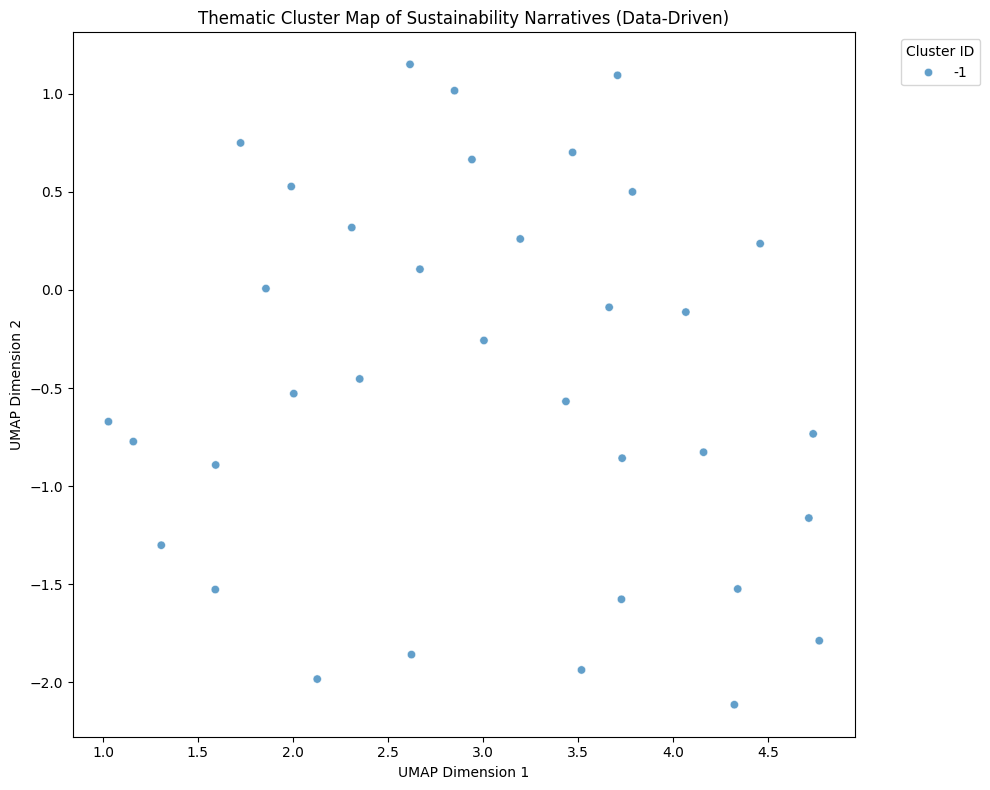

In [375]:
# ----------------------------------
# DATA-DRIVEN THEMATIC CLUSTER MAP
# ----------------------------------

import umap
import hdbscan
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# df الان دیتافریم کدگذاری‌شده است
idx = df.index.values
X = sentence_embeddings[idx]

# UMAP
reducer = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    metric="cosine",
    random_state=42
)
X_2d = reducer.fit_transform(X)

df["x"] = X_2d[:, 0]
df["y"] = X_2d[:, 1]

# HDBSCAN
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=40,
    min_samples=10,
    metric="euclidean"
)
df["cluster"] = clusterer.fit_predict(X_2d)

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x="x",
    y="y",
    hue="cluster",
    palette="tab10",
    alpha=0.7,
    legend="full"
)

plt.title("Thematic Cluster Map of Sustainability Narratives (Data-Driven)")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title="Cluster ID", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [376]:
# =========================
# BUILD transcripts.csv (EPISODE-LEVEL, DATA-DRIVEN)
# =========================

import os
import pandas as pd

BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/Chevaneese/"
OUTPUT_PATH = os.path.join(BASE_PATH, "outputs")

# -------------------------
# LOAD CODED SENTENCES (CANONICAL SOURCE)
# -------------------------
df = pd.read_csv(
    os.path.join(OUTPUT_PATH, "coded_sentences_CODEBOOK_v2_1.csv")
)

# sanity check
assert {"episode_id", "sentence"}.issubset(df.columns), \
    "Missing required columns in coded_sentences file"

# -------------------------
# AGGREGATE SENTENCES → EPISODE TRANSCRIPTS
# -------------------------
transcripts = (
    df.groupby("episode_id")["sentence"]
      .apply(lambda x: " ".join(x))
      .reset_index()
)

# rename column to match your clustering code
transcripts = transcripts.rename(columns={"sentence": "text"})

print("Episodes in transcripts.csv:", len(transcripts))

# -------------------------
# SAVE transcripts.csv
# -------------------------
transcripts_path = os.path.join(OUTPUT_PATH, "transcripts.csv")
transcripts.to_csv(transcripts_path, index=False)

print("✅ transcripts.csv saved at:")
print(transcripts_path)

transcripts.head()

Episodes in transcripts.csv: 35
✅ transcripts.csv saved at:
/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/transcripts.csv


,episode_id,text
0,ep03,"Fri, 05/23 12:14PM · 43mins\n\nTranscript\n\nS..."
1,ep04,"If you're joining us today for the first time,..."
2,ep100,"Fri, 05/23 12:34PM · 21mins\n\nTranscript\n\nS..."
3,ep103,"Fri, 05/23 12:34PM · 24mins\n\nTranscript\n\nS..."
4,ep106,"Fri, 05/23 12:34PM · 90mins\n\nTranscript\n\nS..."


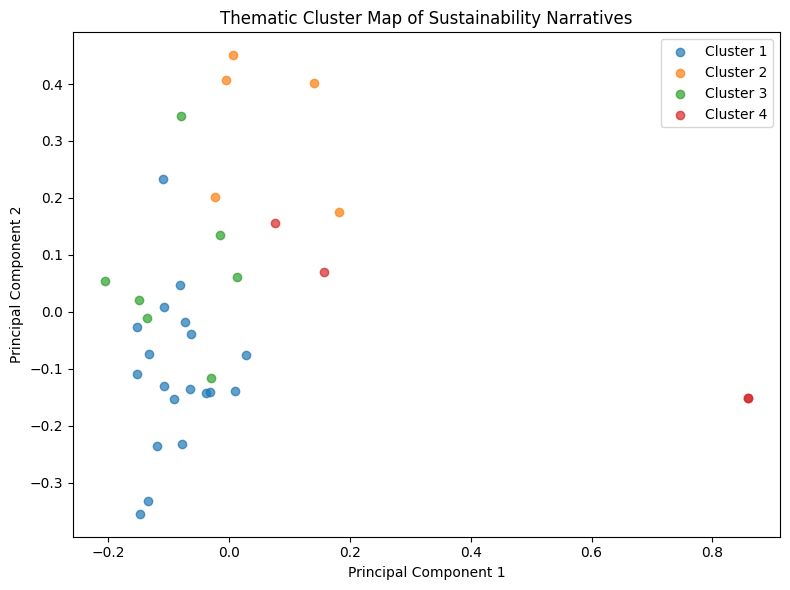

In [377]:
# =========================
# Figure 1: Thematic Cluster Map of Sustainability Narratives
# =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# -------------------------
# 1. LOAD DATA
# -------------------------
# transcripts.csv must contain at least one column: 'text'
# Each row = one episode or narrative segment

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/transcripts.csv")

texts = df["text"].dropna().tolist()

# -------------------------
# 2. TF–IDF VECTORIZATION
# -------------------------
vectorizer = TfidfVectorizer(
    stop_words="english",
    max_df=0.85,
    min_df=3,
    ngram_range=(1, 2)
)

X_tfidf = vectorizer.fit_transform(texts)

# -------------------------
# 3. UNSUPERVISED CLUSTERING
# -------------------------
# Number of clusters can be adjusted (typically 4–6 for interpretability)

n_clusters = 4

kmeans = KMeans(
    n_clusters=n_clusters,
    random_state=42,
    n_init=10
)

cluster_labels = kmeans.fit_predict(X_tfidf)

# -------------------------
# 4. DIMENSIONALITY REDUCTION (FOR VISUALIZATION)
# -------------------------
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

# -------------------------
# 5. PLOT CLUSTER MAP
# -------------------------
plt.figure(figsize=(8, 6))

for cluster_id in range(n_clusters):
    idx = cluster_labels == cluster_id
    plt.scatter(
        X_pca[idx, 0],
        X_pca[idx, 1],
        label=f"Cluster {cluster_id + 1}",
        alpha=0.7
    )

plt.title("Thematic Cluster Map of Sustainability Narratives")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.tight_layout()

# -------------------------
# 6. SAVE FIGURE
# -------------------------
plt.savefig("Figure_1_Thematic_Cluster_Map.png", dpi=300)
plt.show()

In [4]:
import docx
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
def read_docx(path):
    doc = docx.Document(path)
    return "\n".join([p.text for p in doc.paragraphs])

raw_text = read_docx("/content/drive/MyDrive/Colab Notebooks/Chevaneese/allepisodes.docx")
import re

sentences = [
    s.strip()
    for s in re.split(r"[.!?]\s+", raw_text)
    if len(s.strip()) > 40   # حذف جمله‌های خیلی کوتاه
]

df = pd.DataFrame({"text": sentences})
df.head()
vectorizer = TfidfVectorizer(
    stop_words="english",
    max_df=0.85,
    min_df=5,
    ngram_range=(1, 2)
)

X = vectorizer.fit_transform(df["text"])
terms = np.array(vectorizer.get_feature_names_out())
kmeans = KMeans(
    n_clusters=4,
    random_state=42,
    n_init=10
)

df["cluster"] = kmeans.fit_predict(X)
TOP_N = 15

rows = []

for cluster_id in sorted(df["cluster"].unique()):

    # 🔴 تبدیل به numpy array
    idx = (df["cluster"] == cluster_id).values

    # میانگین TF–IDF ترم‌ها در این کلاستر
    mean_tfidf = X[idx].mean(axis=0)
    mean_tfidf = np.asarray(mean_tfidf).ravel()

    top_idx = mean_tfidf.argsort()[::-1][:TOP_N]

    for rank, i in enumerate(top_idx, start=1):
        rows.append({
            "cluster": int(cluster_id),
            "rank": rank,
            "term": terms[i],
            "mean_tfidf": float(mean_tfidf[i])
        })

top_terms_df = pd.DataFrame(rows)
top_terms_df
top_terms_df.to_csv("top_terms_per_cluster.csv", index=False)
import os


OUTPUT_PATH = "/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs"


os.makedirs(OUTPUT_PATH, exist_ok=True)


output_file = os.path.join(OUTPUT_PATH, "top_terms_per_cluster.csv")
top_terms_df.to_csv(output_file, index=False)

output_file

'/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/top_terms_per_cluster.csv'

In [6]:
import os
import re
import numpy as np
import pandas as pd

import docx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
DOC_PATH = "/content/drive/MyDrive/Colab Notebooks/Chevaneese/allepisodes.docx"
OUTPUT_PATH = "/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs"

os.makedirs(OUTPUT_PATH, exist_ok=True)
def read_docx(path):
    doc = docx.Document(path)
    return "\n".join(p.text for p in doc.paragraphs)

raw_text = read_docx(DOC_PATH)
sentences = [
    s.strip()
    for s in re.split(r"[.!?]\s+", raw_text)
    if len(s.strip()) > 40   # remove very short / non-informative text
]

df = pd.DataFrame({"text": sentences})
df.shape
vectorizer = TfidfVectorizer(
    stop_words="english",
    max_df=0.85,
    min_df=5,
    ngram_range=(1, 2)
)

X = vectorizer.fit_transform(df["text"])
terms = np.array(vectorizer.get_feature_names_out())
kmeans = KMeans(
    n_clusters=4,
    random_state=42,
    n_init=10
)

df["cluster"] = kmeans.fit_predict(X)
df.to_csv(
    os.path.join(OUTPUT_PATH, "clustered_narratives.csv"),
    index=False
)
TOP_N = 15
rows = []

for cluster_id in sorted(df["cluster"].unique()):

    idx = (df["cluster"] == cluster_id).values

    mean_tfidf = X[idx].mean(axis=0)
    mean_tfidf = np.asarray(mean_tfidf).ravel()

    top_idx = mean_tfidf.argsort()[::-1][:TOP_N]

    for rank, i in enumerate(top_idx, start=1):
        rows.append({
            "cluster": int(cluster_id),
            "rank": rank,
            "term": terms[i],
            "mean_tfidf": float(mean_tfidf[i])
        })

top_terms_df = pd.DataFrame(rows)
top_terms_df

,cluster,rank,term,mean_tfidf
0,0,1,think,0.019036
1,0,2,going,0.016896
2,0,3,people,0.016693
3,0,4,really,0.013911
4,0,5,want,0.013652
5,0,6,just,0.013512
6,0,7,lot,0.012721
7,0,8,right,0.012226
8,0,9,business,0.012101
9,0,10,need,0.012017


In [6]:
import pandas as pd
import numpy as np

PATH = "/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/top_terms_per_cluster.csv"
df_terms = pd.read_csv(PATH)

df_terms.head()

,cluster,rank,term,mean_tfidf
0,0,1,like,0.023104
1,0,2,think,0.018510
2,0,3,people,0.017051
3,0,4,just,0.014194
4,0,5,really,0.014067


In [7]:
# =========================
# Post-clustering lexical refinement
# (Remove spoken stopwords + extract Top-N terms)
# =========================

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# --------------------------------------------------
# 1. REQUIREMENTS CHECK
# --------------------------------------------------
assert "text" in df.columns, "df must contain a 'text' column"
assert "cluster" in df.columns, "df must contain a 'cluster' column"

# --------------------------------------------------
# 2. DEFINE SPOKEN / DISCOURSE STOPWORDS (FIXED)
# --------------------------------------------------
EXTRA_STOPWORDS = {
    "like", "just", "really", "think", "people", "kind", "sort",
    "yeah", "okay", "right", "actually", "basically", "lot","don", "doing",
    "thing", "things", "going", "want", "know", "mean", "podcast",
    "say", "said", "make", "making", "way", "ways", "stuff",
    "thank", "university", "got", "come", "welcome", "ve",
    "innovation", "field", "fuel",
    "speaker", "episode", "dave",
    "canada", "university canada", "university canada west",
    "good", "great", "big", "little", "very", "maybe"
}

# --------------------------------------------------
# 3. BUILD TF–IDF (FOR INTERPRETATION ONLY)
# --------------------------------------------------
vectorizer = TfidfVectorizer(
    stop_words="english",
    max_df=0.75,
    min_df=5,
    ngram_range=(1, 2)
)

X = vectorizer.fit_transform(df["text"])
terms = np.array(vectorizer.get_feature_names_out())

# --------------------------------------------------
# 4. REMOVE SPOKEN STOPWORDS FROM VOCABULARY
# --------------------------------------------------
valid_mask = [
    all(token not in EXTRA_STOPWORDS for token in term.split())
    for term in terms
]

terms_clean = terms[valid_mask]
X_clean = X[:, valid_mask]

print(f"Original vocabulary size: {len(terms)}")
print(f"Cleaned vocabulary size:  {len(terms_clean)}")

# --------------------------------------------------
# 5. EXTRACT TOP-N TERMS PER CLUSTER (CLEANED)
# --------------------------------------------------
TOP_N = 15
rows = []

for cluster_id in sorted(df["cluster"].unique()):

    idx = (df["cluster"] == cluster_id).values

    mean_tfidf = X_clean[idx].mean(axis=0)
    mean_tfidf = np.asarray(mean_tfidf).ravel()

    top_idx = mean_tfidf.argsort()[::-1][:TOP_N]

    for rank, i in enumerate(top_idx, start=1):
        rows.append({
            "cluster": int(cluster_id),
            "rank": rank,
            "term": terms_clean[i],
            "mean_tfidf": float(mean_tfidf[i])
        })

top_terms_refined_df = pd.DataFrame(rows)

# --------------------------------------------------
# 6. SAVE OUTPUT
# --------------------------------------------------
OUTPUT_PATH = "/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs"

top_terms_refined_df.to_csv(
    f"{OUTPUT_PATH}/top_terms_per_cluster_refined.csv",
    index=False
)

top_terms_refined_df

Original vocabulary size: 2948
Cleaned vocabulary size:  2443


,cluster,rank,term,mean_tfidf
0,0,1,business,0.012101
1,0,2,need,0.012017
2,0,3,different,0.011015
3,0,4,time,0.009697
4,0,5,work,0.009661
5,0,6,technology,0.008390
6,0,7,company,0.008094
7,0,8,ai,0.007892
8,0,9,students,0.007708
9,0,10,world,0.007066


In [8]:
def read_docx(path):
    doc = docx.Document(path)
    return "\n".join(p.text for p in doc.paragraphs)

raw_text = read_docx(
    "/content/drive/MyDrive/Colab Notebooks/Chevaneese/allepisodes.docx"
)

sentences = [
    s.strip()
    for s in re.split(r"[.!?]\s+", raw_text)
    if len(s.strip()) > 40
]
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
topic_model = BERTopic(
    embedding_model=embedding_model,
    language="english",
    calculate_probabilities=False,
    verbose=True
)

topics, probs = topic_model.fit_transform(sentences)
topic_info = topic_model.get_topic_info()
topic_info
TOP_N = 15
rows = []

for topic_id in topic_info["Topic"]:
    if topic_id == -1:
        continue  # outliers separately

    terms = topic_model.get_topic(topic_id)[:TOP_N]

    for rank, (term, weight) in enumerate(terms, start=1):
        rows.append({
            "topic": topic_id,
            "rank": rank,
            "term": term,
            "weight": weight
        })

topic_terms_df = pd.DataFrame(rows)
topic_terms_df
OUTPUT_PATH = "/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs"

topic_terms_df.to_csv(
    f"{OUTPUT_PATH}/bertopic_top_terms.csv",
    index=False
)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2026-01-15 23:13:46,702 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/252 [00:00<?, ?it/s]

2026-01-15 23:16:05,352 - BERTopic - Embedding - Completed ✓
2026-01-15 23:16:05,353 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2026-01-15 23:16:48,540 - BERTopic - Dimensionality - Completed ✓
2026-01-15 23:16:48,542 - BERTopic - Cluster - Start clustering the reduced embeddings
2026-01-15 23:16:48,983 - BERTopic - Cluster - Completed ✓
2026-01-15 23:16:48,991 - BERTopic - Representation - Fine-tuning topics using representation models.
2026-01-15 23:16:49,237 - BERTopic - Representation - Completed ✓


In [12]:
df_topics = pd.DataFrame({
    "text": sentences,
    "topic": topics
})

df_topics.head()
topic_terms = topic_model.get_topic_info()
topic_terms
topic_model.get_topic(0)


[('speaker', np.float64(0.04369266669653067)),
 ('yeah', np.float64(0.013682251631930884)),
 ('you', np.float64(0.008689182963395638)),
 ('question', np.float64(0.008284362283136172)),
 ('your', np.float64(0.008053865389913737)),
 ('it', np.float64(0.007462380100044854)),
 ('so', np.float64(0.0072508070631504724)),
 ('this', np.float64(0.00722967641665959)),
 ('well', np.float64(0.007211473958758536)),
 ('think', np.float64(0.007071099576661159))]

In [16]:
def representative_sentences(topic_id, n=5):
    return (
        df_topics[df_topics["topic"] == topic_id]["text"]
        .head(n)
        .tolist()
    )

representative_sentences(0)

['But before we get there, Hamid, tell us a little bit more about what led you down the path of becoming an entrepreneur',
 'Well, the typical entrepreneurial story, we want to get out there, we want to operate outside the box, and we want to try something',
 'Can you give us any final thoughts that you have or any comments or any advice that you can pass on to our entrepreneurs out there or future entrepreneurs',
 'Number one is our perception about the things happens here because I can tell you that I am an immigrant entrepreneur which makes it a kind of unique condition',
 'Programs which provide entrepreneurs these kinds of understanding are very valuable']

In [13]:
import pandas as pd

df_means = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/top_terms_per_cluster_refined.csv"
)

df_means.head(20)
top5 = (
    df_means
    .sort_values(["cluster", "rank"])
    .groupby("cluster")
    .head(5)
)

top5

,cluster,rank,term,mean_tfidf
0,0,1,business,0.012101
1,0,2,need,0.012017
2,0,3,different,0.011015
3,0,4,time,0.009697
4,0,5,work,0.009661
15,1,1,bit,0.037849
16,1,2,tell,0.013417
17,1,3,question,0.013067
18,1,4,business,0.013066
19,1,5,ai,0.011353


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1. LOAD SENTENCE-LEVEL DATA
# --------------------------------------------------
# This must be your sentence-level output from Section 3.4
# Example: df_sentences.csv produced after narrative logic classification

df = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/coded_sentences_CODEBOOK_v2_1.csv"
)

# 🔴 CHANGE THIS LINE ONLY if your column name is different
logic_col = "narrative_logic"

# --------------------------------------------------
# 2. AGGREGATE: RELATIVE PREVALENCE
# --------------------------------------------------
logic_counts = (
    df[logic_col]
    .value_counts(normalize=True)
    .sort_values(ascending=False)
    * 100
)

# --------------------------------------------------
# 3. PLOT: BAR CHART
# --------------------------------------------------
plt.figure(figsize=(8, 5))
logic_counts.plot(kind="bar")

plt.ylabel("Percentage of Narrative Units (%)")
plt.xlabel("Narrative Logic")
plt.title("Relative Prevalence of Narrative Logics in Sustainability Discourse")

plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

KeyError: 'narrative_logic'

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1. LOAD YOUR ACTUAL SENTENCE-LEVEL FILE
# --------------------------------------------------
df = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/coded_sentences_CODEBOOK_v2_1.csv"
)

# sanity check
print(df.columns)

Index(['episode_id', 'sentence', 'code', 'confidence', 'dimension', 'SDG'], dtype='object')


dimension
Entrepreneurship       1645
Constraint             1462
TBL                    1007
Sustainability_Mode     369
Name: count, dtype: int64


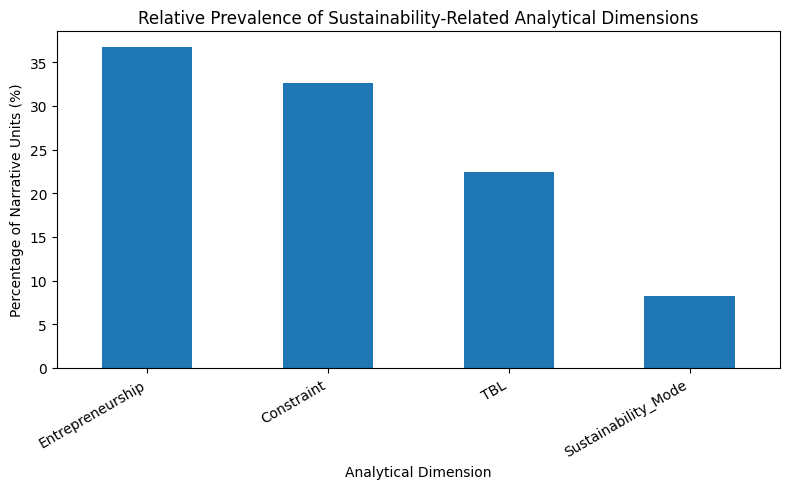

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1. LOAD REAL DATA
# --------------------------------------------------
df = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/coded_sentences_CODEBOOK_v2_1.csv"
)

# sanity check
print(df["dimension"].value_counts())
dimension_counts = (
    df["dimension"]
    .value_counts(normalize=True)
    * 100
)
plt.figure(figsize=(8, 5))
dimension_counts.plot(kind="bar")

plt.ylabel("Percentage of Narrative Units (%)")
plt.xlabel("Analytical Dimension")
plt.title("Relative Prevalence of Sustainability-Related Analytical Dimensions")

plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


In [17]:
import pandas as pd

# --------------------------------------------------
# 1. LOAD YOUR ACTUAL SENTENCE-LEVEL DATA
# --------------------------------------------------
df = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/coded_sentences_CODEBOOK_v2_1.csv"
)

# --------------------------------------------------
# 2. FILTER: COST & FEASIBILITY CONSTRAINTS
# --------------------------------------------------
# We rely ONLY on the existing 'dimension' column
# Adjust the condition below ONLY if your dimension labels differ

cost_feasibility_df = df[
    df["dimension"].str.contains("constraint", case=False, na=False)
]

# --------------------------------------------------
# 3. FILTER: SENTENCES WITH SDG TAGS
# --------------------------------------------------
cost_feasibility_df = cost_feasibility_df[
    cost_feasibility_df["SDG"].notna()
]

# --------------------------------------------------
# 4. AGGREGATE: SENTENCE COUNT BY SDG
# --------------------------------------------------
table_5 = (
    cost_feasibility_df
    .groupby("SDG")
    .size()
    .reset_index(name="Sentence Count")
    .sort_values("Sentence Count", ascending=False)
)

table_5

,SDG,Sentence Count
15,"SDG7,SDG9",224
0,SDG11,186
2,SDG12,175
16,"SDG7,SDG9,SDG12,SDG13,SDG17",133
11,"SDG4,SDG9,SDG17",127
5,SDG17,110
4,SDG15,55
1,"SDG11,SDG16",49
14,"SDG7,SDG13",48
10,"SDG4,SDG9",44


In [18]:
table_5.to_csv(
    "/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/Table_5_Cost_Feasibility_by_SDG.csv",
    index=False
)

In [19]:
import pandas as pd

# --------------------------------------------------
# 1. LOAD SENTENCE-LEVEL DATA
# --------------------------------------------------
df = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/coded_sentences_CODEBOOK_v2_1.csv"
)

# --------------------------------------------------
# 2. FILTER: COMMUNICATION / LEGITIMACY LOGIC
# --------------------------------------------------
# We use the EXISTING codebook signals
# Adjust keywords ONLY if your actual code names differ

comm_legit_df = df[
    df["code"].str.contains(
        "LEGIT|COMM|BRAND|STAKEHOLDER|TRUST|GOV",
        case=False,
        na=False
    )
]

# --------------------------------------------------
# 3. FILTER: SENTENCES WITH SDG TAGS
# --------------------------------------------------
comm_legit_df = comm_legit_df[
    comm_legit_df["SDG"].notna()
]

# --------------------------------------------------
# 4. AGGREGATE: SENTENCE COUNT BY SDG
# --------------------------------------------------
table_6 = (
    comm_legit_df
    .groupby("SDG")
    .size()
    .reset_index(name="Sentence Count")
    .sort_values("Sentence Count", ascending=False)
)

table_6

,SDG,Sentence Count
15,"SDG7,SDG9",148
2,SDG12,135
0,SDG11,69
17,"SDG7,SDG9,SDG13",58
5,SDG17,52
16,"SDG7,SDG9,SDG12,SDG13,SDG17",52
14,"SDG7,SDG13",47
11,"SDG4,SDG9,SDG17",32
12,"SDG6,SDG7,SDG13",28
3,"SDG12,SDG13",24


In [20]:
table_6.to_csv(
    "/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/Table_6_Communication_Legitimacy_by_SDG.csv",
    index=False
)

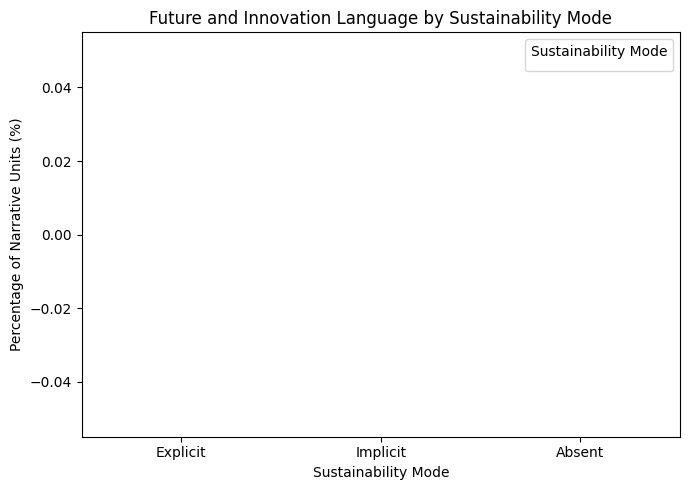

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1. LOAD YOUR ACTUAL SENTENCE-LEVEL DATA
# --------------------------------------------------
df = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/coded_sentences_CODEBOOK_v2_1.csv"
)

# --------------------------------------------------
# 2. FILTER: FUTURE / INNOVATION LANGUAGE
# --------------------------------------------------
# Adjust keywords ONLY if your codebook uses slightly different labels
future_innov_df = df[
    df["code"].str.contains(
        "INNOV|FUTURE|TECH|GROWTH|SCAL|TRANSFORM|DIGITAL",
        case=False,
        na=False
    )
]

# --------------------------------------------------
# 3. DERIVE SUSTAINABILITY MODE FROM EXISTING CODES
# --------------------------------------------------
def classify_sustainability_mode(code):
    code = str(code).upper()
    if "EXPLICIT" in code:
        return "Explicit"
    elif "IMPLICIT" in code:
        return "Implicit"
    else:
        return "Absent"

future_innov_df["sustainability_mode"] = (
    future_innov_df["code"].apply(classify_sustainability_mode)
)

# --------------------------------------------------
# 4. AGGREGATE COUNTS
# --------------------------------------------------
mode_counts = (
    future_innov_df
    .groupby("sustainability_mode")
    .size()
    .reindex(["Explicit", "Implicit", "Absent"], fill_value=0)
)

# Convert to percentages
mode_percent = (mode_counts / mode_counts.sum()) * 100

# --------------------------------------------------
# 5. PLOT: STACKED BAR (FIGURE 3)
# --------------------------------------------------
plt.figure(figsize=(7, 5))

mode_percent.plot(
    kind="bar",
    stacked=True,
    color=["#2E7D32", "#F9A825", "#C62828"]
)

plt.ylabel("Percentage of Narrative Units (%)")
plt.xlabel("Sustainability Mode")
plt.title("Future and Innovation Language by Sustainability Mode")

plt.xticks(rotation=0)
plt.legend(title="Sustainability Mode", loc="upper right")
plt.tight_layout()
plt.show()

Future/Innovation rows: 0
sustainability_mode
Explicit    0
Implicit    0
Absent      0
Name: count, dtype: int64


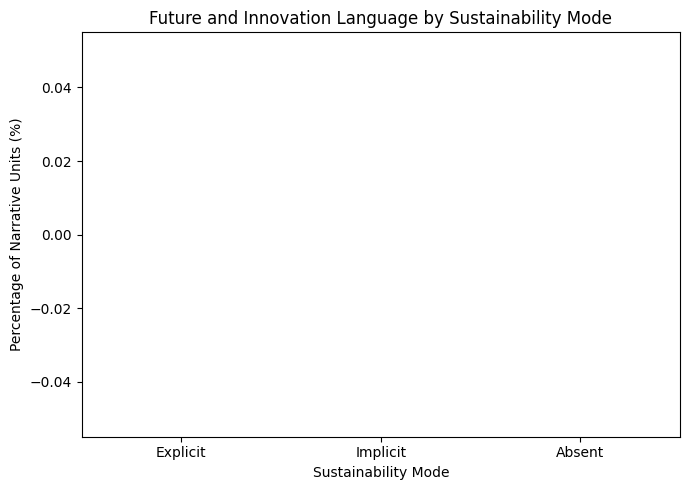

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1. LOAD DATA
# --------------------------------------------------
df = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/coded_sentences_CODEBOOK_v2_1.csv"
)

# --------------------------------------------------
# 2. FILTER: FUTURE / INNOVATION VIA 'dimension'
# --------------------------------------------------
future_innov_df = df[
    df["dimension"].str.contains(
        "INNOV|FUTURE|TECH|GROWTH|STRATEG",
        case=False,
        na=False
    )
]

print("Future/Innovation rows:", len(future_innov_df))

# --------------------------------------------------
# 3. DERIVE SUSTAINABILITY MODE FROM 'code'
# --------------------------------------------------
def sustainability_mode(code):
    code = str(code).upper()
    if "EXPLICIT" in code:
        return "Explicit"
    elif "IMPLICIT" in code:
        return "Implicit"
    else:
        return "Absent"

future_innov_df["sustainability_mode"] = (
    future_innov_df["code"].apply(sustainability_mode)
)

# --------------------------------------------------
# 4. AGGREGATE
# --------------------------------------------------
mode_counts = (
    future_innov_df["sustainability_mode"]
    .value_counts()
    .reindex(["Explicit", "Implicit", "Absent"], fill_value=0)
)

mode_percent = (mode_counts / mode_counts.sum()) * 100

print(mode_counts)

# --------------------------------------------------
# 5. PLOT (FIGURE 3)
# --------------------------------------------------
plt.figure(figsize=(7, 5))

mode_percent.plot(
    kind="bar",
    color=["#2E7D32", "#F9A825", "#C62828"]
)

plt.ylabel("Percentage of Narrative Units (%)")
plt.xlabel("Sustainability Mode")
plt.title("Future and Innovation Language by Sustainability Mode")

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd

df = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/coded_sentences_CODEBOOK_v2_1.csv"
)

print("Unique dimension values:")
print(df["dimension"].value_counts())

Unique dimension values:
dimension
Entrepreneurship       1645
Constraint             1462
TBL                    1007
Sustainability_Mode     369
Name: count, dtype: int64


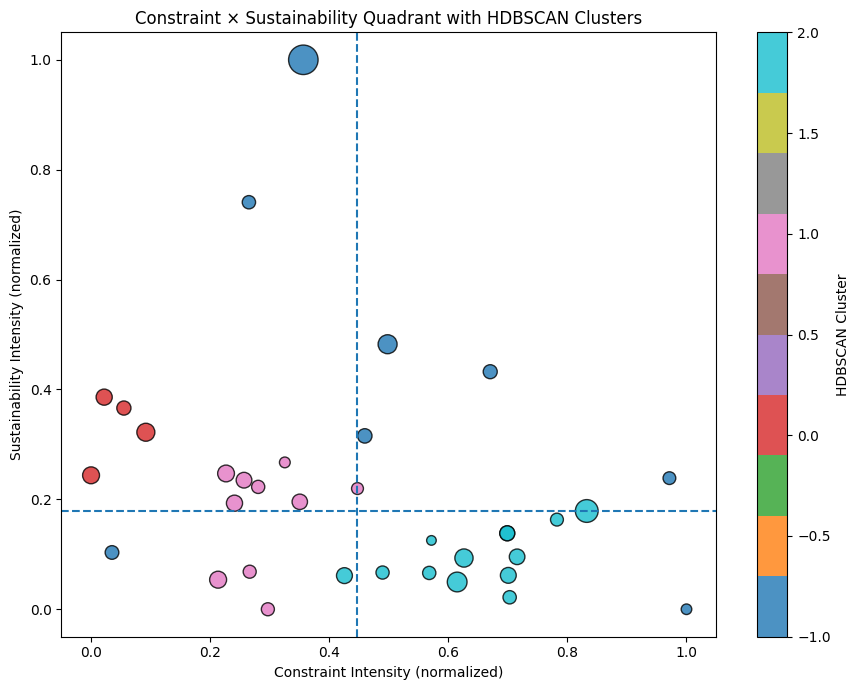

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hdbscan
from sklearn.preprocessing import MinMaxScaler

# --------------------------------------------------
# 1. LOAD SENTENCE-LEVEL DATA
# --------------------------------------------------
df = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/Chevaneese/outputs/coded_sentences_CODEBOOK_v2_1.csv"
)

# --------------------------------------------------
# 2. DERIVE CONSTRAINT FLAG
# --------------------------------------------------
df["is_constraint"] = df["dimension"].str.contains(
    "Constraint", case=False, na=False
)

# --------------------------------------------------
# 3. DERIVE SUSTAINABILITY MODE SCORE
# Explicit = 2, Implicit = 1, Absent = 0
# --------------------------------------------------
def sustainability_score(code):
    code = str(code).upper()
    if "EXPLICIT" in code:
        return 2
    elif "IMPLICIT" in code:
        return 1
    else:
        return 0

df["sust_score"] = df["code"].apply(sustainability_score)

# --------------------------------------------------
# 4. AGGREGATE TO EPISODE LEVEL
# --------------------------------------------------
episode_df = (
    df.groupby("episode_id")
      .agg(
          constraint_intensity=("is_constraint", "mean"),
          sustainability_intensity=("sust_score", "mean"),
          total_sentences=("sentence", "count")
      )
      .reset_index()
)

# --------------------------------------------------
# 5. NORMALIZE AXES
# --------------------------------------------------
scaler = MinMaxScaler()
episode_df[["constraint_norm", "sustainability_norm"]] = scaler.fit_transform(
    episode_df[["constraint_intensity", "sustainability_intensity"]]
)

# --------------------------------------------------
# 6. HDBSCAN CLUSTERING (EPISODE LEVEL)
# --------------------------------------------------
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=4,
    min_samples=2,
    metric="euclidean"
)

episode_df["cluster"] = clusterer.fit_predict(
    episode_df[["constraint_norm", "sustainability_norm"]]
)

# --------------------------------------------------
# 7. PLOT QUADRANT WITH CLUSTERS
# --------------------------------------------------
plt.figure(figsize=(9, 7))

scatter = plt.scatter(
    episode_df["constraint_norm"],
    episode_df["sustainability_norm"],
    c=episode_df["cluster"],
    s=episode_df["total_sentences"],
    cmap="tab10",
    alpha=0.8,
    edgecolor="k"
)

# Median lines
plt.axvline(episode_df["constraint_norm"].median(), linestyle="--")
plt.axhline(episode_df["sustainability_norm"].median(), linestyle="--")

plt.xlabel("Constraint Intensity (normalized)")
plt.ylabel("Sustainability Intensity (normalized)")
plt.title("Constraint × Sustainability Quadrant with HDBSCAN Clusters")

plt.colorbar(scatter, label="HDBSCAN Cluster")
plt.tight_layout()
plt.show()